# Sommaire :

**Partie 1 : Importation et desciption du jeu de données**

 - <a href="#C1">Importation et desciption des données</a>
     - <a href="#C11">1.1 - Fichier EdStatsCountry.csv</a>
     - <a href="#C12">1.2 - Fichier EdStatsSeries.csv</a>
     - <a href="#C13">1.3 - Fichier EdStatsData.csv</a>     
     - <a href="#C14">1.4 - Fichier EdStatsCountry-Series.csv</a>  
     - <a href="#C15">1.5 - Fichier EdStatsFootNote.csv</a>  
 
**Partie 2 : Nettoyez un jeu de données**

 - <a href="#C2">Nettoyez votre jeu de données</a>
     - <a href="#C21">2.1 - Fichier EdStatsCountry.csv</a>
        - <a href="#C211">2.1.1 - Valeur manquante</a>
        - <a href="#C212">2.1.2 - Doublon</a>
        - <a href="#C213">2.1.3 - Détection d'outliers</a>
     - <a href="#C22">2.2 - Fichier EdStatsSeries.csv</a>
        - <a href="#C221">2.2.1 - Valeur manquante</a>
        - <a href="#C222">2.3.2 - Doublon</a>
        - <a href="#C223">2.3.3 - Détection d'outliers</a>           
     - <a href="#C23">2.3 - Fichier EdStatsData.csv</a>  
        - <a href="#C231">2.3.1 - Valeur manquante</a>
        - <a href="#C232">2.3.2 - Doublon</a>
        - <a href="#C233">2.3.3 - Détection d'outliers</a>     
     - <a href="#C24">2.4 - Fichier EdStatsCountry-Series.csv</a>  
        - <a href="#C241">2.4.1 - Valeur manquante</a>
        - <a href="#C242">2.4.2 - Doublon</a>
        - <a href="#C243">2.4.3 - Détection d'outliers</a>     
     - <a href="#C25">2.5 - Fichier EdStatsFootNote.csv</a>  
        - <a href="#C251">2.5.1 - Valeur manquante</a>
        - <a href="#C252">2.5.2 - Doublon</a>
        - <a href="#C253">2.5.3 - Détection d'outliers</a>     
 
**Partie 3 : Représentez vos variables**
        
   - <a href="#C31">3.1 - Recherche informations pertinentes</a>     
      - <a href="#C311">3.1.1 - Données manquantes</a>      
   - <a href="#C32">3.2 - Exploration des données</a>   
      - <a href="#C321">3.2.1 - Nombres d'indicateurs disponibles</a> 
   - <a href="#C33">3.3 - Choix des Colonnes</a> 
   - <a href="#C34">3.4 - Indicateurs</a>  
   
      - <a href="#C341">3.4.1 - Indicateurs à conserver</a> 
      - <a href="#C342">3.4.2 - Indicateurs retenus</a> 


In [ ]:
# installation des packages 
!pip install pandas == 
finir la liste ....


In [359]:
# Chargement des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

Nous pouvons à présent charger le jeu de données, dans un dataframe que nous nommerons ici `Country` provanant du fichier EdStatsCountry.csv. Nous affichons ensuite les 5 premières lignes.

In [362]:
## FONCTION Qui compte les valuers nulles 
def AffNull (inf_df):
    a = inf_df.T['null'].sum()
    b = inf_df.T['count'].sum()
    print("Nombre valeurs 'null' : {:.0f}".format(a))
    print("Nombre valeurs non 'null' : {:.0f}".format(b))
    print("Nombre total cases : {:.0f}".format(a+b))
    print("% total valeurs 'null' : {:.1f}%".format(a*100/(a+b)))
    
## FONCTION SORTANT UN DATAFRAME D'INFOS (complémentaire du describe)
def infoDF (df):
    nb_li = df.index.size
    nb_col = df.columns.size
    tot = nb_li*nb_col    
    infos = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
    return infos  
## FONCTION D'affichage d'un graphique 
def GraphA(plot_type, my_plot, my_x, my_y, my_x_t, xlab, ylab, my_tit, num_col):
    if plot_type == "plot" :
        my_plot.plot(my_x, my_y, '-o', color = colors[num_col])
    elif plot_type == "bar" :
        my_plot.bar(my_x, my_y, color = colors[num_col])
    else :
        print("erreur type de graphe")
    my_plot.set_xlabel(xlab, fontsize = 14)
    my_plot.set_ylabel(ylab, fontsize = 14)
    plt.xticks(my_x_t, my_x_t, rotation=85 , fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylim(round(min(my_y)*0.9), round(max(my_y)*1.1)) 
    my_plot.set_title(my_tit, fontsize = 18, fontweight = 'bold')
    plt.grid(color='grey', linestyle='dotted')
    

# <a name="C11">1.1 - EdStatsCountry.csv</a>

In [480]:
Country = pd.read_csv('EdStatsCountry.csv')
Country.head(10)

Country Code            Short Name            Table Name  \
0          ABW                 Aruba                 Aruba   
1          AFG           Afghanistan           Afghanistan   
2          AGO                Angola                Angola   
3          ALB               Albania               Albania   
4          AND               Andorra               Andorra   
5          ARB            Arab World            Arab World   
6          ARE  United Arab Emirates  United Arab Emirates   
7          ARG             Argentina             Argentina   
8          ARM               Armenia               Armenia   
9          ASM        American Samoa        American Samoa   

                      Long Name 2-alpha code   Currency Unit  \
0                         Aruba           AW   Aruban florin   
1  Islamic State of Afghanistan           AF  Afghan afghani   
2   People's Republic of Angola           AO  Angolan kwanza   
3           Republic of Albania           AL    Albanian lek   
4       Principality of Andorra           AD            Euro   
5                    Arab World           1A             NaN   
6          United Arab Emirates           AE   U.A.E. dirham   
7            Argentine Republic           AR  Argentine peso   
8           Republic of Armenia           AM   Armenian dram   
9                American Samoa           AS     U.S. dollar   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   
5  Arab World aggregate. Arab World is composed o...   
6  April 2013 database update: Based on data from...   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                       Region          Income Group WB-2 code  ...  \
0   Latin America & Caribbean  High income: nonOECD        AW  ...   
1                  South Asia            Low income        AF  ...   
2          Sub-Saharan Africa   Upper middle income        AO  ...   
3       Europe & Central Asia   Upper middle income        AL  ...   
4       Europe & Central Asia  High income: nonOECD        AD  ...   
5                         NaN                   NaN        1A  ...   
6  Middle East & North Africa  High income: nonOECD        AE  ...   
7   Latin America & Caribbean   Upper middle income        AR  ...   
8       Europe & Central Asia   Lower middle income        AM  ...   
9         East Asia & Pacific   Upper middle income        AS  ...   

              IMF data dissemination standard  \
0                                         NaN   
1    General Data Dissemination System (GDDS)   
2    General Data Dissemination System (GDDS)   
3    General Data Dissemination System (GDDS)   
4                                         NaN   
5                                         NaN   
6    General Data Dissemination System (GDDS)   
7  Special Data Dissemination Standard (SDDS)   
8  Special Data Dissemination Standard (SDDS)   
9                                         NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   
5                                                NaN   
6                                               2010   
7                                               2010   
8                                               2011   
9                                               2010   

                             Latest household survey  \
0            

In [364]:
Country.shape

(241, 32)

Comme vous pouvez le voir via la commande ci dessus, nous avons 241 transactions, renseignées sur 32 variables différentes. Nous avons notamment : 
- Country Code : code du pays
- Short Name : libellé court du pays
- Table Name :Nom du pays
- Long Name : libellé long du pays
- Income Group : Groupe de revenu

<font color='darkred'>**</font>

In [365]:
areas = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World',
        ]

In [343]:
#country.groupby['Region','Short Name'].unique()
#country.groupby('Region')[['Short Name']].unique().tolist()

In [366]:
Country[~Country['Short Name'].isin(areas)]['Short Name'].unique().shape

(219,)

In [367]:
list_countries = Country[~Country['Short Name'].isin(areas)]['Short Name'].unique().tolist()
print(list_countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greec

Une fois que l'on modifie la liste avec les indicateurs par zones, on obtient 219 pays. On voit que certains pays sont en fait des subdivisions d'autres pays. Comme par exemple : St Martin, Isle of Man, Polynésie Française, etc.

In [368]:
Country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde ainsi qu'un classement par région de chaque pays. D'autres informations concernent aussi des groupes de pays par région ou niveau de revenu


Nombre de pays par région:

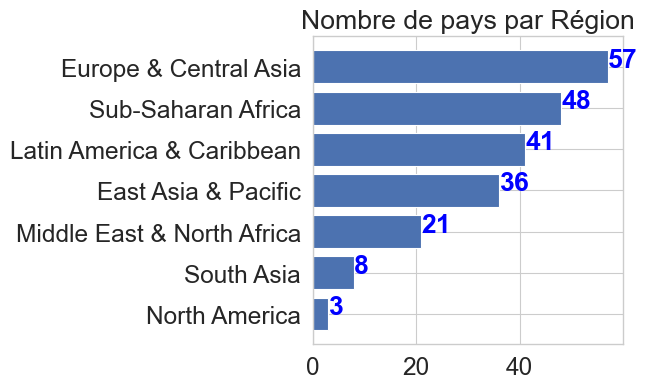

In [370]:
import matplotlib.pyplot as plt

data_p = Country.groupby('Region')[['Short Name']].count().reset_index()
data_p = data_p.sort_values(by='Short Name')

plt.figure(figsize=(4,4))
plt.barh(y=data_p['Region'], width=data_p['Short Name'])

for i, v in enumerate(data_p['Short Name']):
    plt.text(v, i, str(v), color='blue', fontweight='bold')

plt.title('Nombre de pays par Région')
plt.show()

# <a name="C12">1.2 - EdStatsSeries.csv</a>

In [481]:
Series = pd.read_csv('EdStatsSeries.csv')
Series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [372]:
Series.shape

(3665, 21)

Comme vous pouvez le voir via la commande ci dessus, nous avons 3665 transactions, renseignées sur 21 variables différentes. Nous avons notamment : 
- Series Code : code de la serie
- Topic : montant de l'opération
- Indicatior Name : 
- Definition : 

<font color='darkred'>*vous n'aurez probablement pas besoin de la dernière colonne Unnamed: 20*</font>

# <a name="C13">1.3 - EdStatsData.csv</a>

In [482]:
data_origine = pd.read_csv("EdStatsData.csv")
data_origine.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [375]:
data_origine.shape

(886930, 70)

On vérifie qu'on a le même nombre d'indicateurs dans les 2 datasets

In [376]:
Series['Series Code'].nunique() == data_origine['Indicator Code'].nunique()

True

Comme vous pouvez le voir via la commande ci dessus, nous avons 886930 transactions, renseignées sur 70 variables différentes. Nous avons notamment : 
- Country Name : Nom du pays
- Country Code : Code du pays

<font color='darkred'>*vous n'aurez probablement pas besoin de la dernière colonne Unnamed: 69* et de toutes ses variables</font>

Combien y-a-t-il d'indicateurs par pays?

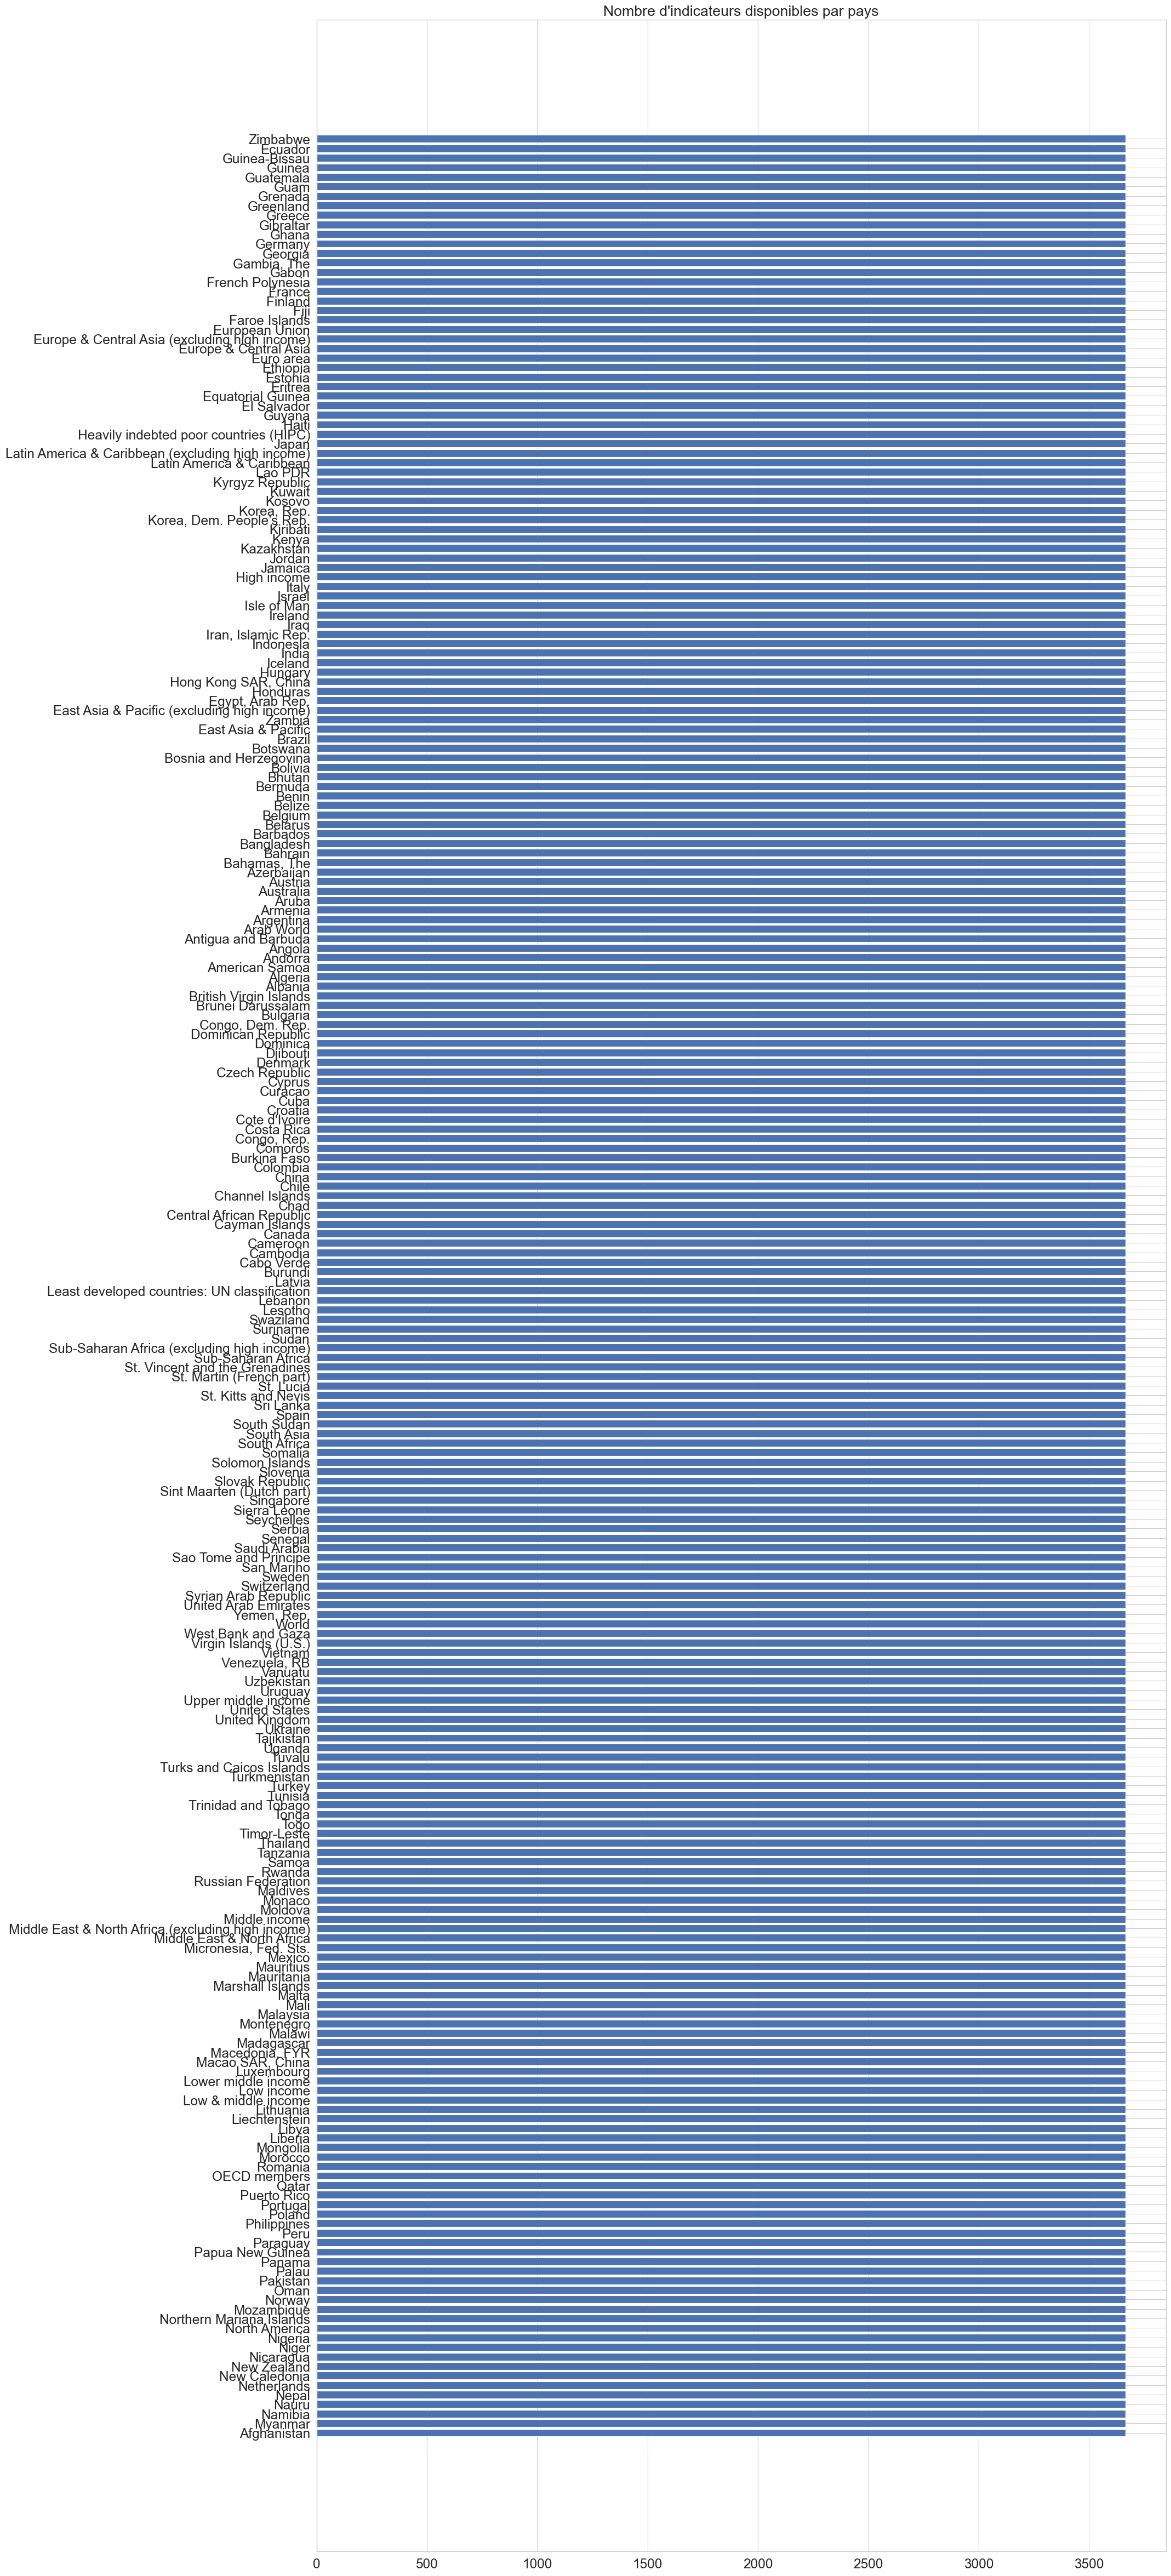

In [377]:
plt.figure(figsize=(20,60))
plt.barh(y = data_origine.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Country Name'], 
         width =  data_origine.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'])
plt.title('Nombre d\'indicateurs disponibles par pays')
plt.show()

In [378]:
print(data_origine.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'].min())
print( data_origine.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'].max())

3665
3665


beaucoup d'indicateurs (3665 uniques) => voir comment les exploiter

Quels sont les mots qui reviennent le plus souvent dans les noms des indicateurs?

In [379]:
import collections
liste_mots_indicateurs = [i.split(' ', 1)[0] for i in data_origine['Indicator Name'].tolist()]
mots_indicateurs_populaires = collections.Counter(liste_mots_indicateurs).most_common(30)

In [380]:
mots_indicateurs_populaires
mots_indicateurs_populaires.reverse()

In [381]:
df_mots_indicateurs_populaires = pd.DataFrame(mots_indicateurs_populaires, columns = ['Mot', 'Nombre d\'occurences']).sort_values(by='Nombre d\'occurences', ascending=False)

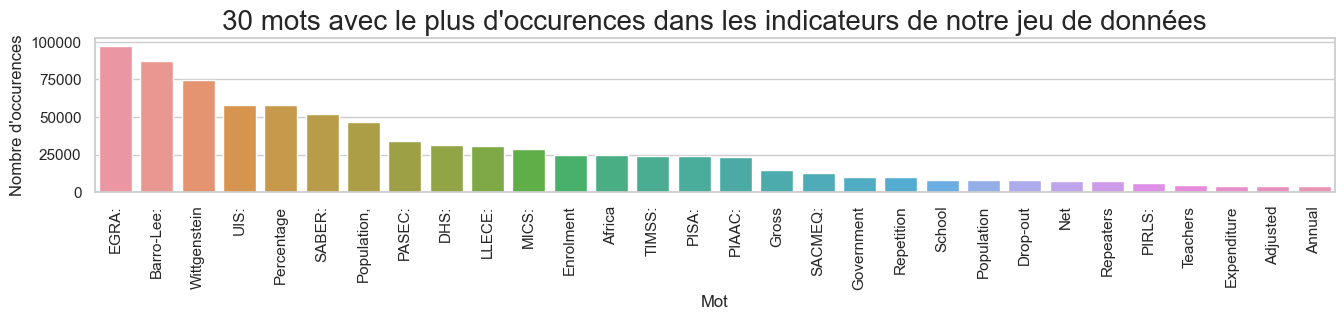

In [382]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 2))
sns.barplot(x = 'Mot', y='Nombre d\'occurences', data = df_mots_indicateurs_populaires)
plt.title('30 mots avec le plus d\'occurences dans les indicateurs de notre jeu de données', size=20)
# Rotation des noms 
plt.xticks(rotation=90)
#sns.barplot(x=[elem1 for elem1, elem2 in mots_indicateurs_populaires], y=[elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
plt.show()

# <a name="C14">1.4 - EdStatsCountry-Series.csv</a>

In [280]:
Countryseries = pd.read_csv("EdStatsCountry-Series.csv")
Countryseries.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [281]:
Countryseries.shape

(613, 4)

Comme vous pouvez le voir via la commande ci dessus, nous avons 613 transactions, renseignées sur 4 variables différentes. Nous avons notamment : 
- CountryCode : Code du pays
- SeriesCode : code de la serie
- Description : Description des sources du pays

<font color='darkred'>*vous n'aurez probablement pas besoin de la dernière colonne Unnamed: 3* et de toutes ses variables</font>

In [282]:
Countryseries['CountryCode'].nunique()

211

On ne retrouve pas le même nombre de pays dans countryseries que dans country. Quels sont les pays qui diffèrent?

# <a name="C15">1.5 - EdStatsFootNote.csv</a>

In [283]:
Footnote = pd.read_csv("EdStatsFootNote.csv")
Footnote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [284]:
Footnote.shape

(643638, 5)

In [81]:
Footnote['CountryCode'].nunique()

239

In [285]:
#On supprime les caracteres dans la colonne Year
Footnote['Year'] = Footnote['Year'].apply(lambda x : x[2:])
Footnote.head()

CountryCode      SeriesCode  Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  2006  Country estimation.         NaN

Comme vous pouvez le voir via la commande ci dessus, nous avons 643638 transactions, renseignées sur 5 variables différentes. Nous avons notamment : 
- CountryCode : Code du pays
- SeriesCode : code de la serie
- Year : année 
- Description : Description des sources du pays

<font color='darkred'>*vous n'aurez probablement pas besoin de la dernière colonne Unnamed: 4* et de toutes ses variables</font>

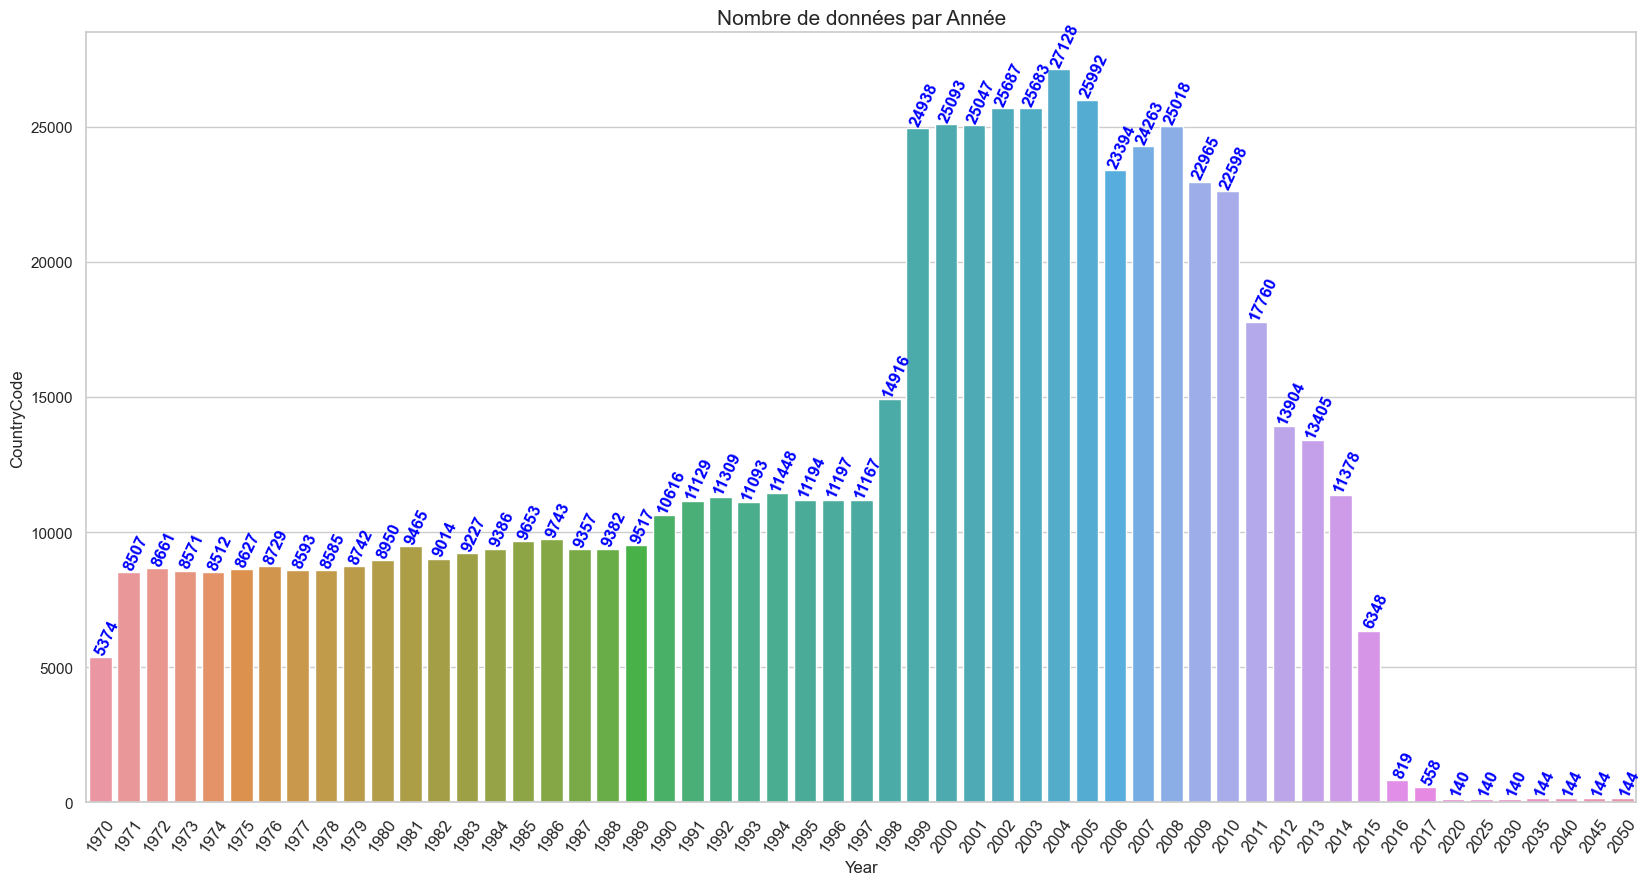

In [286]:
data_a = Footnote.groupby('Year').count().reset_index()

plt.figure(figsize=(20, 10))
plt.title('Nombre de données par Année', size=15)

plot = sns.barplot(y='CountryCode', x='Year', data=data_a)

plot.set_xticklabels(labels=data_a['Year'], rotation=55, size=12)

for i, v in enumerate(data_a['CountryCode']):
    plt.text(i + 0.25, v, str(v), color='blue', fontweight='bold', ha='center', va='bottom', rotation=65)

plt.show()


# <a name="C2">2 - Nettoyez votre jeu de données</a>

Il est à présent temps de vérifier le jeu de données.


In [287]:
# on crée d'autres dataframes à modifier (deep copies)
data_c = data_origine.copy()
country_c = Country.copy()
series_c = Series.copy()
country_series_c = Countryseries.copy()
footnote_c = Footnote.copy()

## <a name="C21">2.1 - EdStatsCountry.csv</a>

### <a name="C211">   2.2.1 - Valeur manquante</a>


On va ensuite vérifier si notre jeu de données contient des valeurs manquantes :

In [288]:
country_c.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [289]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = country_c.isnull().sum()
nb_na[nb_na>0]

2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                                       96
Balance of Payments Manual in use                     60
External debt Reporting status                       117
System of trade                                       41
Government Accounting concept  

On observe que notre jeu de données contient beaucoup de valeurs manquantes. 

Par manque d'informations, on devrait supprimer ici la colonne "Unnamed: 31".

In [290]:
# Remove column name 'Unnamed: 31'
country_c = country_c.drop(['Unnamed: 31'], axis=1)

In [225]:
inf_country = infoDF(country_c).append(country_c.describe(include='all'))
AffNull(inf_country)
inf_country

Nombre valeurs 'null' : 2113
Nombre valeurs non 'null' : 5358
Nombre total cases : 7471
% total valeurs 'null' : 28.3%


C:\Users\Zbook\AppData\Local\Temp\ipykernel_18356\618210995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
C:\Users\Zbook\AppData\Local\Temp\ipykernel_18356\2092297218.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inf_country = infoDF(country_c).append(country_c.describe(include='all'))


Country Code Short Name Table Name Long Name 2-alpha code  \
Type         object     object     object    object       object   
null              0          0          0         0            3   
count           241        241        241       241          238   
unique          241        241        241       241          238   
top             ABW      Aruba      Aruba     Aruba           AW   
freq              1          1          1         1            1   
mean            NaN        NaN        NaN       NaN          NaN   
std             NaN        NaN        NaN       NaN          NaN   
min             NaN        NaN        NaN       NaN          NaN   
25%             NaN        NaN        NaN       NaN          NaN   
50%             NaN        NaN        NaN       NaN          NaN   
75%             NaN        NaN        NaN       NaN          NaN   
max             NaN        NaN        NaN       NaN          NaN   

       Currency Unit                                      Special Notes  \
Type          object                                             object   
null              26                                                 96   
count            215                                                145   
unique           152                                                131   
top             Euro  April 2012 database update: Based on official ...   
freq              23                                                  6   
mean             NaN                                                NaN   
std              NaN                                                NaN   
min              NaN                                                NaN   
25%              NaN                                                NaN   
50%              NaN                                                NaN   
75%              NaN                                                NaN   
max              NaN                                                NaN   

                       Region         Income Group WB-2 code  ...  \
Type                   object               object    object  ...   
null                       27                   27         1  ...   
count                     214                  214       240  ...   
unique                      7                    5       240  ...   
top     Europe & Central Asia  Upper middle income        AW  ...   
freq                       57                   55         1  ...   
mean                      NaN                  NaN       NaN  ...   
std                       NaN                  NaN       NaN  ...   
min                       NaN                  NaN       NaN  ...   
25%                       NaN                  NaN       NaN  ...   
50%                       NaN                  NaN       NaN  ...   
75%                       NaN                  NaN       NaN  ...   
max                       NaN                  NaN       NaN  ...   

          Government Accounting concept  \
Type                             object   
null                                 80   
count                               161   
unique                                2   
top     Consolidated central government   
freq                                 95   
mean                                NaN   
std                                 NaN   
min                                 NaN   
25%                                 NaN   
50%                                 NaN   
75%                                 NaN   
max                                 NaN   

                 IMF data dissemination standard Latest population census  \
Type                                      object                   object   
null                                          60                       28   
count                                        181                      213   
unique                                         2                       27   
top     General Data Dissemination System (GDDS)

### <a name="C212">   2.1.2 - Doublons</a>

In [291]:
#data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]
country_c.duplicated().sum()

0

In [14]:
#On a ici une opération qui est complètement en double. Il suffit donc de supprimer l'une des deux via le drop_duplicate
#data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)

### <a name="C213">   2.1.3 - Détection d'outliers</a>

Un describe peut potentiellement nous aider dans un premier temps :

In [292]:
country_c.describe()

National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000             2009.000000   
75%                          2005.00000             2010.000000   
max                          2012.00000             2010.000000   

       Latest trade data  
count         185.000000  
mean         2010.994595  
std             2.569675  
min          1995.000000  
25%          2011.000000  
50%          2012.000000  
75%          2012.000000  
max          2012.000000

Une bonne première approche en attendant d'avoir des outils plus adéquats, est de regarder le maximum et le minimum. Cela donne généralement un premier apperçu de ce qui pourrait clocher à ce niveau. 

In [109]:
#i = data.loc[data['montant']==-15000,:].index[0] # récupération de l'index de la transaction à -15000
#data.iloc[i-1:i+2,:] # on regarde la transaction précédente et la suivante

In [17]:
#data.loc[data['montant']==-15000, 'montant'] = -14.39

## <a name="C22">   2.2 - EdStatsSeries.csv</a>

### <a name="C221">   2.2.1 - Valeur manquante</a>

In [293]:
series_c.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [294]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = series_c.isnull().sum()
nb_na[nb_na>0]

Short definition                       1509
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [295]:
inf_series = infoDF(series_c).append(series_c.describe(include='all'))
AffNull(inf_series)
inf_series

Nombre valeurs 'null' : 55203
Nombre valeurs non 'null' : 21762
Nombre total cases : 76965
% total valeurs 'null' : 71.7%


C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\618210995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2908426691.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inf_series = infoDF(series_c).append(series_c.describe(include='all'))


Series Code              Topic  \
Type                 object             object   
null                      0                  0   
count                  3665               3665   
unique                 3665                 37   
top     BAR.NOED.1519.FE.ZS  Learning Outcomes   
freq                      1               1046   
mean                    NaN                NaN   
std                     NaN                NaN   
min                     NaN                NaN   
25%                     NaN                NaN   
50%                     NaN                NaN   
75%                     NaN                NaN   
max                     NaN                NaN   

                                           Indicator Name  \
Type                                               object   
null                                                    0   
count                                                3665   
unique                                               3665   
top     Barro-Lee: Percentage of female population age...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                         Short definition  \
Type                                               object   
null                                                 1509   
count                                                2156   
unique                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                          Long definition Unit of measure  \
Type                                               object         float64   
null                                                    0            3665   
count                                                3665             0.0   
unique                                               2060             NaN   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...             NaN   
freq                                                  215             NaN   
mean                                                  NaN             NaN   
std                                                   NaN             NaN   
min                                                   NaN             NaN   
25%                                                   NaN             NaN   
50%                                                   NaN             NaN   
75%                                                   NaN             NaN   
max                                                   NaN             NaN   

       Periodicity                 Base Period Other notes Aggregation method  \
Type        object                      object      object             object   
null          3566                        3351        3113               3618   
count           99                         314         552                 47   
unique           1                           4          14                  3   
top         Annual  Projections (2010 to 2100)        EGRA   Weighted average   
freq            99                      

### <a name="C222">   2.2.2 - Doublons</a>

In [296]:
series_c.duplicated().sum()

0

### <a name="C223">   2.2.3 - Détection d'outliers</a>

Un describe peut potentiellement nous aider dans un premier temps :

In [297]:
series_c.describe()
#series_c.head()

Unit of measure  Notes from original source  Other web links  \
count              0.0                         0.0              0.0   
mean               NaN                         NaN              NaN   
std                NaN                         NaN              NaN   
min                NaN                         NaN              NaN   
25%                NaN                         NaN              NaN   
50%                NaN                         NaN              NaN   
75%                NaN                         NaN              NaN   
max                NaN                         NaN              NaN   

       Related indicators  License Type  Unnamed: 20  
count                 0.0           0.0          0.0  
mean                  NaN           NaN          NaN  
std                   NaN           NaN          NaN  
min                   NaN           NaN          NaN  
25%                   NaN           NaN          NaN  
50%                   NaN           NaN          NaN  
75%                   NaN           NaN          NaN  
max                   NaN           NaN          NaN

## <a name="C23">   2.3 - EdStatsData.csv</a>

### <a name="C231">   2.3.1 - Valeur manquante</a>

In [298]:
data_c.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [299]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = data_c.isnull().sum()
nb_na[nb_na>0]

1970           814642
1971           851393
1972           851311
1973           851385
1974           851200
                ...  
2085           835494
2090           835494
2095           835494
2100           835494
Unnamed: 69    886930
Length: 66, dtype: int64

In [300]:
# Remove column name 'Unnamed: 69'
data_c = data_c.drop(['Unnamed: 69'], axis=1)

In [301]:
inf_data = infoDF(data_c).append(data_c.describe(include='all'))
AffNull(inf_data)
inf_data

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\618210995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))


Nombre valeurs 'null' : 52568249
Nombre valeurs non 'null' : 8629921
Nombre total cases : 61198170
% total valeurs 'null' : 85.9%


C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2156083780.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inf_data = infoDF(data_c).append(data_c.describe(include='all'))


Country Name Country Code  \
Type         object       object   
null              0            0   
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                           Indicator Name Indicator Code  \
Type                                               object         object   
null                                                    0              0   
count                                              886930         886930   
unique                                               3665           3665   
top     Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   
freq                                                  242            242   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                         1970                   1971                   1972  \
Type                  float64                float64                float64   
null                   814642                 851393                 851311   
count                 72288.0                35537.0                35619.0   
unique                    NaN                    NaN                    NaN   
top                       NaN                    NaN                    NaN   
freq                      NaN                    NaN                    NaN   
mean        1974772449.585505       4253638470.18787       4592364905.25697   
std       121168685352.022415     180481446225.21524    191408271479.830597   
min                 -1.435564              -1.594625              -3.056522   
25%                      0.89                8.85321                9.24092   
50%                  6.317724              63.162399              66.551392   
75%                   62.5125                56552.0                58636.5   
max     19039286948196.101562  19864566419298.101562  21009161433401.398438   

                         1973                   1974                   1975  \
Type                  float64                float64                float64   
null                   851385                 851200                 799624   
count                 35545.0                35730.0                87306.0   
unique                    NaN                    NaN                    NaN   
top                       NaN                    NaN                    NaN   
freq                      NaN                    NaN                    NaN   
mean        5105005610.888861      5401492903.409988      2314287511.569427   
std       205917043980.677643    211214985371.102539    137505922744.808807   
min                 -4.032582              -4.213563              -3.658569   
25%                    9.5952               9.861595                    1.4   
50%                 69.695953              70.877602                9.67742   
75%                   62029.0               63836.75              78.541628   
max     22383671023495.398438  22829911729819.101562  23006343161670.398438   

        ...          2055          2060         2065          2070  \
Type    ...       float64       float64      float64       float64   
null    ...        835494        835494       835494        835494   
count   ...  

### <a name="C232">   2.3.2 - Doublons</a>

In [302]:
data_c.duplicated().sum()

0

### <a name="C233">   2.3.3 - Détection d'outliers</a>

Un describe peut potentiellement nous aider dans un premier temps :

In [303]:
data_c.describe()

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2055          2060          2065          2070  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.145788e+02  7.224868e+02  7.271290e+02  7.283779e+02   
std    ...  2.136851e+04  2.215845e+04  2.287990e+04  2.352338e+04   
min    ... -1.830000e+00 -1.630000e+00 -1.440000e+00 -1.260000e+00   
25%    ...  3.000000e-02  3.000000e-02  3.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.500000e+00  7.505000e+00  7.500000e+00  7.300000e+00   
max    ...  2.813670e+06  2.951569e+06  3.070879e+06  3.169711e+06   

               2075          2080          2085          2090          2095  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.266484e+02  7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02   
std    2.408149e+04  2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04   
min   -1.090000e+00 -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01   
25%    2.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    7.100000e+00  6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00   
max    3.246239e+06  3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06   

               2100  
count  5.143600e+04  
mean   6.940296e+02  
std    2.574189e+04  
min   -4.500000e-01  
25%    1.000000e-02  
50%    2.200000e-01  
75%    4.032500e+00  
max    3.330484e+06  

[8 rows x 65 columns]

## <a name="C24">   2.4 -  EdStatsCountry-Series.csv</a>

### <a name="C241">   2.4.1 - Valeur manquante</a>

In [304]:
country_series_c.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [305]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = country_series_c.isnull().sum()
nb_na[nb_na>0]

Unnamed: 3    613
dtype: int64

In [309]:
# Remove column name 'Unnamed: 3'
country_series_c = country_series_c.drop(['Unnamed: 3'], axis=1)

In [310]:
inf_cnt_ser = infoDF(country_series_c).append(country_series_c.describe(include='all'))
AffNull(inf_cnt_ser)
inf_cnt_ser

Nombre valeurs 'null' : 0
Nombre valeurs non 'null' : 1839
Nombre total cases : 1839
% total valeurs 'null' : 0.0%


C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\618210995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\4059186499.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inf_cnt_ser = infoDF(country_series_c).append(country_series_c.describe(include='all'))


CountryCode   SeriesCode  \
Type        object       object   
null             0            0   
count          613          613   
unique         211           21   
top            MDA  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
Type                                               object  
null                                                    0  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154

### <a name="C242">   2.4.2 - Doublons</a>

In [307]:
country_series_c.duplicated().sum()

0

### <a name="C243">   2.4.3 - Détection d'outliers</a>

In [308]:
country_series_c.describe()

Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

## <a name="C25">   2.5 - EdStatsFootNote.csv</a>

### <a name="C251">   2.5.1 - Valeur manquante</a>

In [311]:
# Remove column name 'Unnamed: 4'
footnote_c = footnote_c.drop(['Unnamed: 4'], axis=1)

In [312]:
inf_footnote = infoDF(footnote_c).append(footnote_c.describe(include='all'))
AffNull(inf_footnote)
inf_footnote

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\618210995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))


Nombre valeurs 'null' : 0
Nombre valeurs non 'null' : 2574552
Nombre total cases : 2574552
% total valeurs 'null' : 0.0%


C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2803588573.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inf_footnote = infoDF(footnote_c).append(footnote_c.describe(include='all'))


CountryCode   SeriesCode    Year   DESCRIPTION
Type        object       object  object        object
null             0            0       0             0
count       643638       643638  643638        643638
unique         239         1558      55          9102
top            LIC  SH.DYN.MORT    2004  Country Data
freq          7320         9226   27128        191188

In [314]:
import inspect
def retrieve_name(var):
    '''afficher le nom d\'une variable '''
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]
list_dataset = [Country, Countryseries, data_origine, Footnote, Series]
for dataset in list_dataset:
    print('Le dataframe {} possède {} lignes et {} colonnes.'.format(retrieve_name(dataset)[0], dataset.shape[0], dataset.shape[1]))

Le dataframe Country possède 241 lignes et 32 colonnes.
Le dataframe Countryseries possède 613 lignes et 4 colonnes.
Le dataframe data_origine possède 886930 lignes et 70 colonnes.
Le dataframe Footnote possède 643638 lignes et 5 colonnes.
Le dataframe Series possède 3665 lignes et 21 colonnes.


**Bilan sur le contenu de chaque fichier:**
* Country : EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde
    certaines valeurs manquent pour de nombreux pays, parfois la majorité des pays. Aucun doublon.
    La table "Country" est composée de 32 colonnes et 241 lignes correspondant aux pays sur lesquels portent les données. (Il manque un pays). Chaque colonne donne des renseignements sur les pays.
    
    
* Country Series : EdStatsCountry-Series.csv contient la source des données des informations contenues dans EdStatsCountry.csv. Les valeurs manquantes correspondent à la colonne "Unnamed: 3" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon.
    La table "Country-series" comporte 4 colonnes et 613 lignes 
    

* Data :  EdStatsData.csv donne l'évolution de plusieurs indicateurs pour tous les pays du monde et macro régions du monde: 
    Beaucoup de valeurs manquantes, dans le même ordre de grandeur pour toutes les années, il y a potentiellement certains indicateurs pour lesquels des données manquent. on remarque qu'il y a exactement le même nombre de valeurs manquantes pour les années >= 2020. Aucun doublon.
    
    
    La table "Data" est composée de 70 colonnes et 886930 lignes qui correspondent à toutes les combinaisons des entrées uniques des colonnes    "Country Code" et "Indicator Code" (respectivement 242 et 3665 entrées uniques). On trouve dans chaque ligne correspondant à un couple Indicateur/Pays la valeur d'un indicateur pour un pays. Les colonnes détaillent les valeurs pour chaque année de 1970 à 2017 (48 colonnes), puis des projections de ces valeurs tous les 5 ans des années 2020 à 2100 (17 colonnes).
    

* Footnote :  footnote donne des informations sur année d'origine des données et description des données
    les valeurs manquantes correspondent à la colonne "Unnamed:4" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon
    La table "FootNote" comporte 5 colonnes et 643638 lignes.
    
    
* Series :  Series donne des données descriptives sur les indicateurs socio économiques disponibles dans data. Aucun doublon
    La table "Series" est composée de 21 colonnes et 3665 lignes correspondant chacune à un indicateur statistique.
    

# <a name="C31"> 3.1 - Recherche informations pertinentes</a>


## <a name="C31"> 3.1.1 - Données manquantes</a>
#### Comptage des données manquantes par table

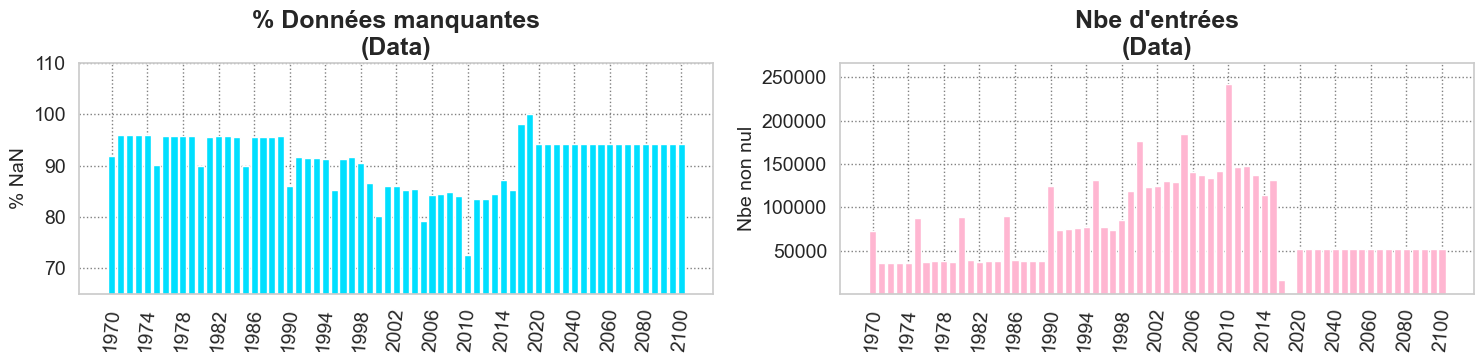

In [323]:

fig = plt.figure(figsize = (18,3))

#colors = ["#bd5db0","#70a845","#727bcc","#b49242","#cc566c","#4aad92","#ca6037"]
colors = ["#00DFFF","#FFB6D1","#727bcc","#b49242","#cc566c","#4aad92","#00000"]

li_annees = inf_data.columns[4:]
#print(li_annees)
x=li_annees
xlab=[my_str[:11]+"..." if len(my_str)>11 else my_str for my_str in x]
y1=inf_data[li_annees].loc["null"]*100/data_c.shape[0] # % de valeurs nulles
y2=inf_data[li_annees].loc["count"] # nombre de valeurs

plot1 = plt.subplot(1,2,1)
GraphA("bar", plot1, xlab, y1, xlab[::4], "", "% NaN",  "% Données manquantes\n(Data)", 0)

plot2 = plt.subplot(1,2,2)
GraphA("bar", plot2, xlab, y2, xlab[::4], "", "Nbe non nul",  "Nbe d'entrées\n(Data)", 1)

plt.show()

In [324]:
# nbe de remplissage minimum/maximum et année correspondante
sel_data = inf_data.loc["count"][4:]
val_min = sel_data.min()
val_max = sel_data.max()

print("- Année nbe entrées min, nbe entrées min : \n{}, \n{:.0f}, soit {:.3f}%"\
      .format(sel_data.index[sel_data==val_min], \
              val_min, val_min*100/(data_c.shape[0])))

print("- année nbe entrées max, nbe entrées max : \n{}, \n{:.0f}, soit {:.3f}%"\
     .format(sel_data.index[sel_data==val_max], \
             val_max, val_max*100/(data_c.shape[0])))

- Année nbe entrées min, nbe entrées min : 
Index(['2017'], dtype='object'), 
143, soit 0.016%
- année nbe entrées max, nbe entrées max : 
Index(['2010'], dtype='object'), 
242442, soit 27.335%


- La table "Data" comporte environ 86 % de données non renseignées.
- L'association Indicateur/Pays a 60% de valeur non renseignée.
- L'année la mieux renseignée est l'année 2010 (27% des couples Indicateur/Pays, soit plus de 242 000 valeurs), et les moins renseignées sont les années 2016 et 2017 (respectivement 1,8% et 0,016% des couples, soit 16460 et 143 valeurs)

In [322]:
fig = plt.figure(figsize = (18,3))

x=inf_country.columns
xlab=[my_str[:11]+"..." if len(my_str)>11 else my_str for my_str in x]
y1=inf_country.loc["null"]*100/country_c.shape[0]  # % de valeurs nulles
y2=inf_country.loc["count"] # nombre de valeurs

plot1 = plt.subplot(1,2,1)
GraphA("bar", plot1, xlab, y1, xlab, "", "% NaN",  "% Données manquantes\n(Country)", 0)

plot2 = plt.subplot(1,2,2)
GraphA("bar", plot2, xlab, y2, xlab, "", "Nbe non nul",  "Nbe d'entrées\n(Country)", 1)

plt.show()

NameError: name 'inf_country' is not defined

<Figure size 1800x300 with 0 Axes>

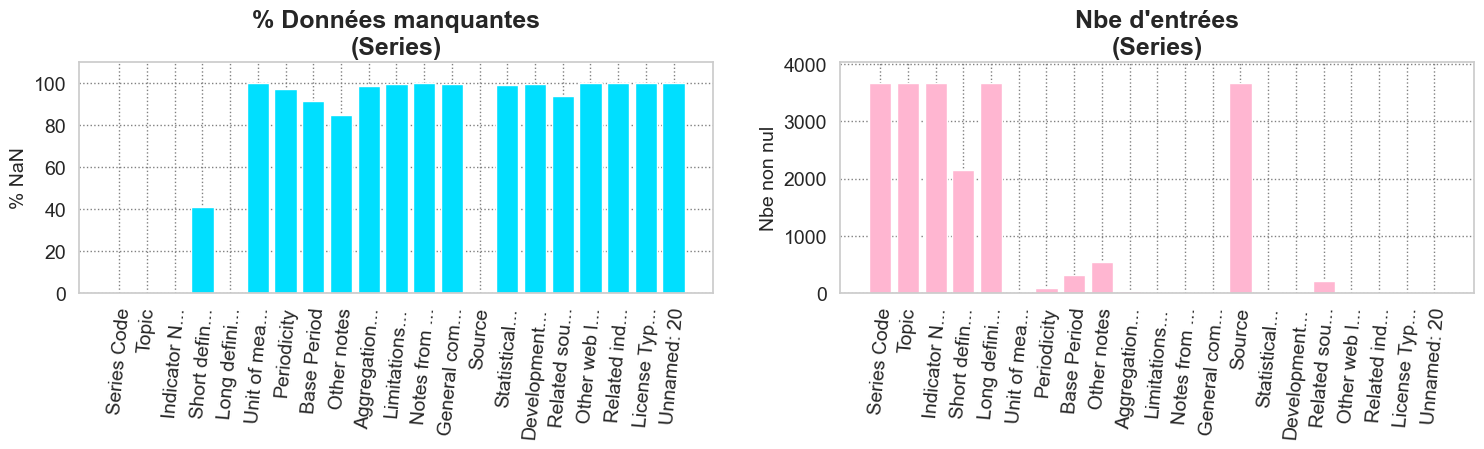

In [325]:
fig = plt.figure(figsize = (18,3))

x=inf_series.columns
xlab=[my_str[:11]+"..." if len(my_str)>11 else my_str for my_str in x]
y1=inf_series.loc["null"]*100/series_c.shape[0]  # % de valeurs nulles
y2=inf_series.loc["count"] # nombre de valeurs

plot1 = plt.subplot(1,2,1)
GraphA("bar", plot1, xlab, y1, xlab, "", "% NaN",  "% Données manquantes\n(Series)", 0)

plot2 = plt.subplot(1,2,2)
GraphA("bar", plot2, xlab, y2, xlab, "", "Nbe non nul",  "Nbe d'entrées\n(Series)", 1)

plt.show()

In [318]:
print("la table 'CountrySeries' contient {} entrées nulles".format(inf_cnt_ser.loc["null"].sum()))
print("la table 'FootNote' contient {} entrées nulles".format(inf_footnote.loc["null"].sum()))

la table 'CountrySeries' contient 0 entrées nulles
la table 'FootNote' contient 0 entrées nulles


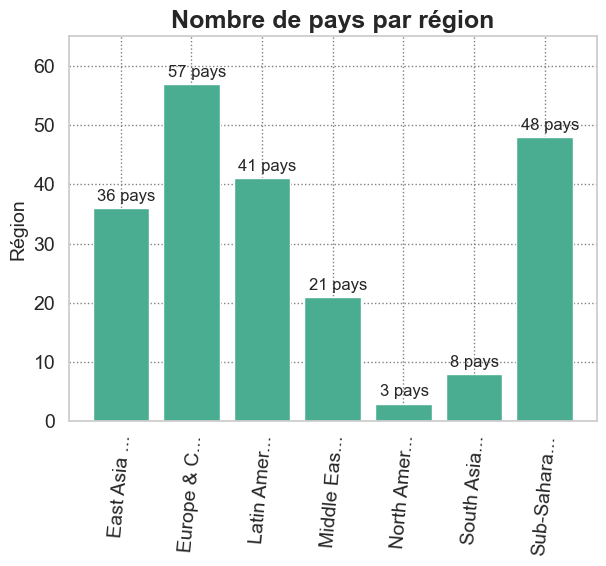

In [326]:
########## A ARRANGER  ##############""
# code de pays et région associée

fig = plt.figure(figsize = (15,5))
country_c.head()
df2 = country_c[['Country Code', 'Region']].groupby('Region').count()
li_region = list(df2.index)
x = li_region
xlab = [my_str[:10]+"..." if len(my_str)>8 else my_str for my_str in x]
y1 = df2.values.reshape(len(df2.values),)
#y2 = 

# Nombre de pays par région
plot1 = plt.subplot(1,2,1)
GraphA("bar", plot1, xlab, y1, xlab, "", "Région",  "Nombre de pays par région", 5)
labels = [ '{:.0f} pays'.format(y1[i]) for i in range(len(y1))] 
for label,xlab, y1 in zip(labels, xlab, y1):
    plt.annotate(label, xy=(xlab, y1), xytext=(-17, 3),
        textcoords='offset points', ha='left', va='bottom' )
plt.ylim(0,65)

plt.show()

## <a name="C32"> 3.2 - Exploration des données</a>

Les indicateurs qui nous intéressent sont ceux des dernières années.
On cherche à savoir :
- combien d'indicateurs environ sont disponibles dans les dernières années
- quels sont les pays qui ont le plus d'indicateurs disponibles dans les dernières années
- quels sont les indicateurs le plus souvent disponible 

### <a name="C321">   3.2.1 - Nombres d'indicateurs disponibles</a>

Pour avoir une idée de la proportion des indicateurs renseignés, on trace la carte de densité du nombre d'indicateur par pays et nombre de pays : 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


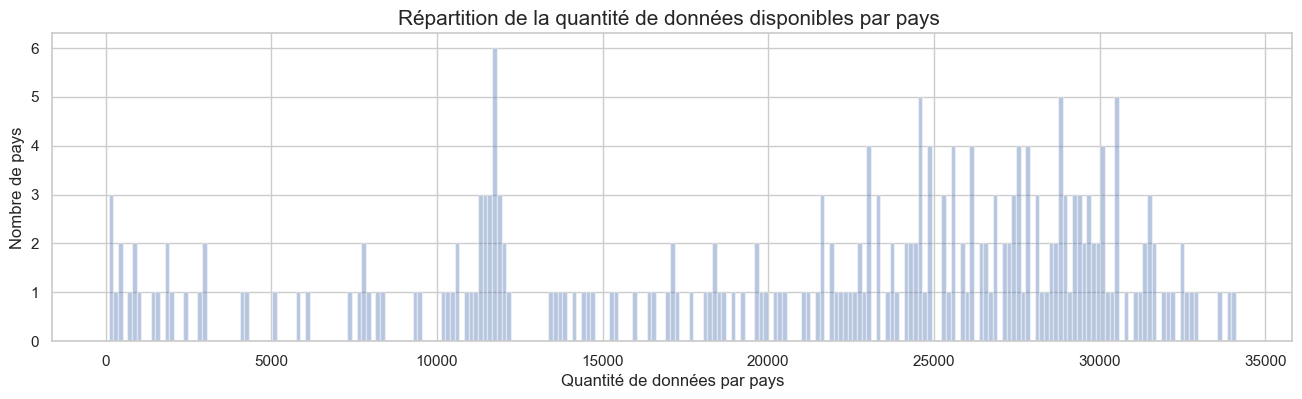

In [327]:
sns.set(style="whitegrid")
data_c.head()
plt.figure(figsize=(16, 4))
plt.title('Nombre de données significatives par décennie', size=15)

# créer une liste de décennies
décennies = [str(i) for i in range(1970, 2017,1)]
décennies = décennies + [str(i) for i in range(2020, 2100,5)]
#print(décennies)
# initialiser une liste vide pour stocker les résultats
décennie_counts = []

# itérer sur les décennies et compter le nombre de valeurs manquantes pour chaque décennie
for décennie in décennies:
    décennie_data = data_c.loc[:, décennie]
    décennie_count = décennie_data.isna().sum()
    décennie_counts.append(décennie_count)

# convertir la liste de comptages de décennies en un tableau NumPy
décennie_counts = np.array(décennie_counts)

# tracer le graphique à barres
#plot = sns.barplot(y=data_c.shape[0] - décennie_counts, x=décennies)

#plot = sns.barplot(y = data_c.shape[0] - décennie_counts, x= décennie_counts, data = data_c.shape[0] - décennie_counts)
#plot.set_xticklabels(labels = décennies, rotation=55, size=12)
#plot = sns.barplot(y=data_c.shape[0] - décennie_counts, x=décennies)
#plot.set_xticklabels(décennies, rotation=45)

plt.xlabel('Quantité de données par pays', size=12)
plt.ylabel('Nombre de pays', size=12)
plt.title('Répartition de la quantité de données disponibles par pays ', size=15)
plot = sns.distplot(data_c.groupby('Country Name')[décennies].count().sum(axis=1).sort_values().values, bins = 241, norm_hist = False, hist_kws=dict(cumulative=False),
             kde = False)
plt.show()


Les pays pour lesquels on a moins d'informations sont:
* Les "petits" pays (faible superficie / faible population
* Les nouveaux pays (kosovo)
* Les régions et groupes de pays (east asia & pacific, upper middle income, etc.

Pour avoir une idée de la proportion des indicateurs renseignés, on trace la carte de densité du nombre d'indicateur par pays et par année :

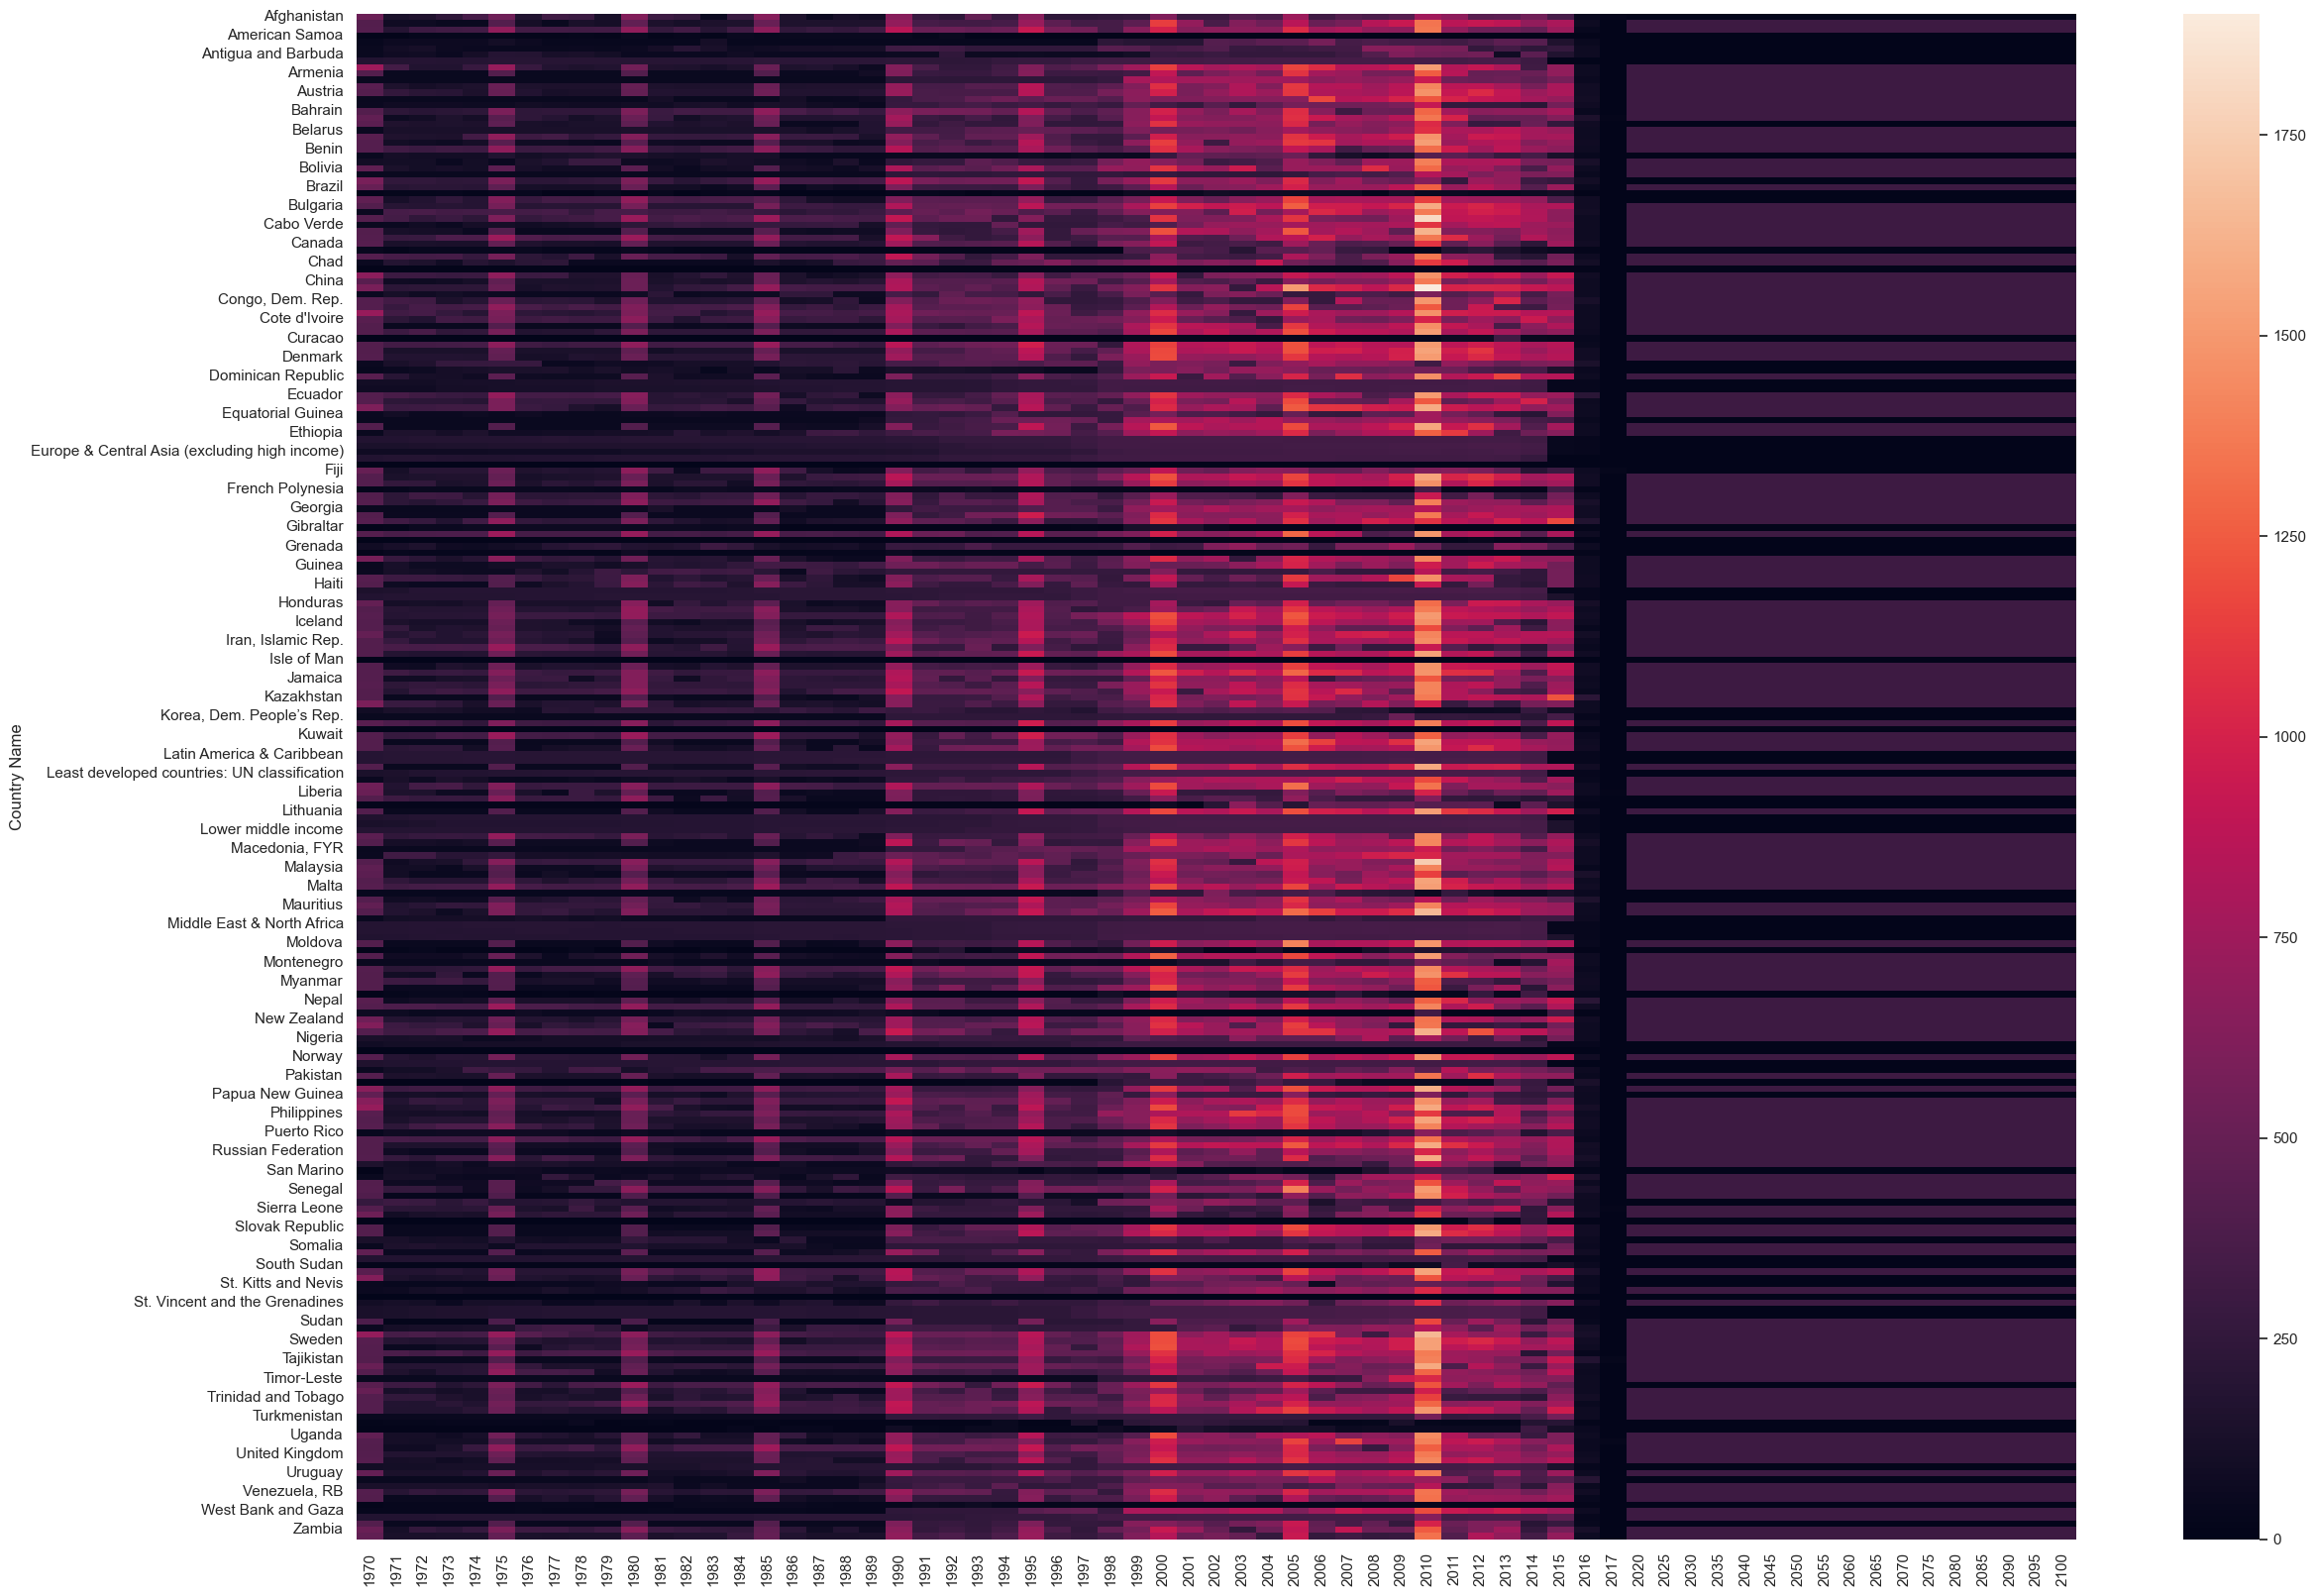

In [269]:
### Heatmap du nombre d'indicateurs non nuls (pays/années)
#data_c.head()
#print(li_annees)
### Heatmap du nombre d'indicateurs non nuls (pays/années)

nb_ind_cnt = data_c.groupby(['Country Name']).count()[li_annees]

# Tableau des nombres d'indicateurs dispo pour chaque pays et chaque année 
fig = plt.figure(figsize = (28,20))
heat_map = sns.heatmap(nb_ind_cnt)

* Certains pays ont peu d'indicateurs, quelles que soient les années considérées (lignes sombres).
* Certaines années sont mieux renseignées (années multiples de 5)
* On distingue plusieurs plages de temps,
    - [1970,1989] : peu renseigné
    - [1990,1999] : assez bien renseigné
    - [2000,2015] : bien renseigné
    - [2016,2019] : quasiment pas renseigné

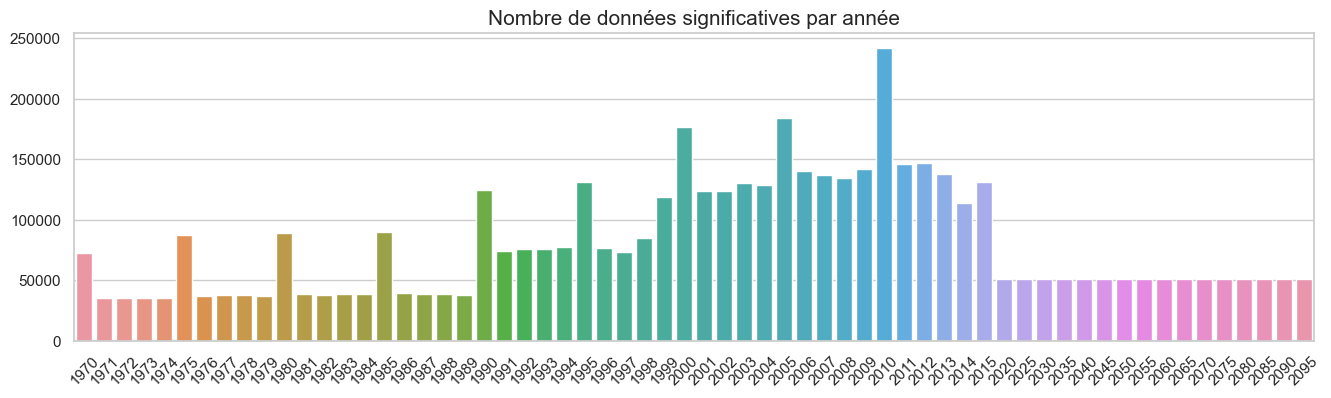

In [88]:
sns.set(style="whitegrid")
data_c.head()
plt.figure(figsize=(16, 4))
plt.title('Nombre de données significatives par année', size=15)

# créer une liste de décennies
décennies = [str(i) for i in range(1970, 2016,1)]
décennies = décennies + [str(i) for i in range(2020, 2100,5)]

# initialiser une liste vide pour stocker les résultats
décennie_counts = []

# itérer sur les décennies et compter le nombre de valeurs manquantes pour chaque décennie
for décennie in décennies:
    décennie_data = data_origine.loc[:, décennie]
    décennie_count = décennie_data.isna().sum()
    décennie_counts.append(décennie_count)

# convertir la liste de comptages de décennies en un tableau NumPy
décennie_counts = np.array(décennie_counts)

# tracer le graphique à barres
#plot = sns.barplot(y=data_c.shape[0] - décennie_counts, x=décennies)

#plot = sns.barplot(y = data_c.shape[0] - décennie_counts, x= décennie_counts, data = data_c.shape[0] - décennie_counts)
#plot.set_xticklabels(labels = décennies, rotation=55, size=12)
plot = sns.barplot(y=data_c.shape[0] - décennie_counts, x=décennies)
plot.set_xticklabels(décennies, rotation=45)

plt.show()


La période de 1990 à 2015 est celle où on a le plus de données significatives (ou le moins de NaN). Ce résultat s'explique peut etre puisque c'est la décennie de la montée en puissance de la donnée.
On va se baser sur cette période pour la suite de nos analyses

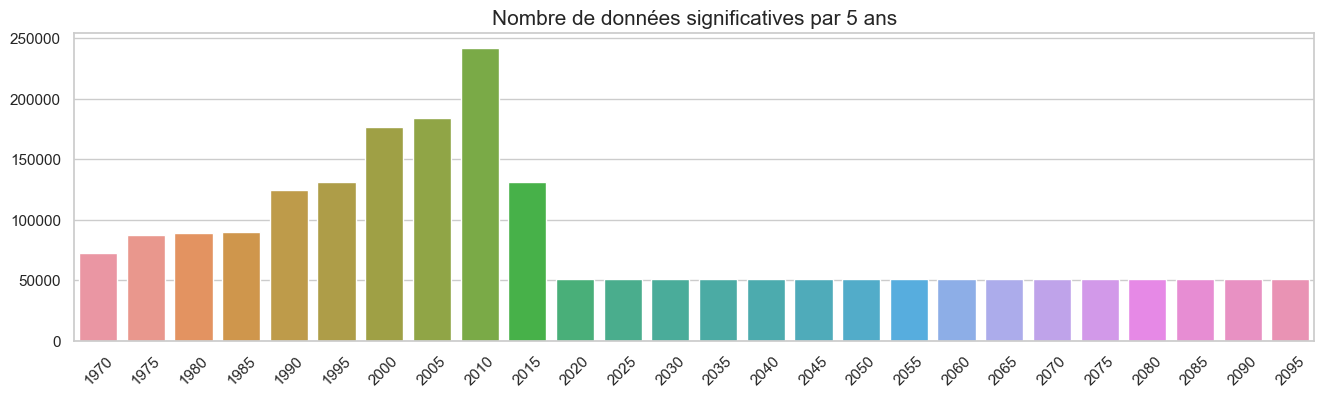

In [92]:
sns.set(style="whitegrid")
data_c.head()
plt.figure(figsize=(16, 4))
plt.title('Nombre de données significatives par 5 ans', size=15)

# créer une liste de décennies
#décennies = [str(i) for i in range(1970, 1971,1)]
décennies =  [str(i) for i in range(1970, 2015,5)]
#décennies = [str(i) for i in range(1970, 1971,1)]
décennies = décennies + [str(i) for i in range(2015, 2100,5)]

# initialiser une liste vide pour stocker les résultats
décennie_counts = []

# itérer sur les décennies et compter le nombre de valeurs manquantes pour chaque décennie
for décennie in décennies:
    décennie_data = data_c.loc[:, décennie]
    décennie_count = décennie_data.isna().sum()
    décennie_counts.append(décennie_count)

# convertir la liste de comptages de décennies en un tableau NumPy
décennie_counts = np.array(décennie_counts)

# tracer le graphique à barres
#plot = sns.barplot(y=data_c.shape[0] - décennie_counts, x=décennies)

#plot = sns.barplot(y = data_c.shape[0] - décennie_counts, x= décennie_counts, data = data_c.shape[0] - décennie_counts)
#plot.set_xticklabels(labels = décennies, rotation=55, size=12)
plot = sns.barplot(y=data_c.shape[0] - décennie_counts, x=décennies)
plot.set_xticklabels(décennies, rotation=45)

plt.show()

On va faire un groupe d'années pour réduire le nombre de NaN dans data.

On va procéder à une première analyse en utilisant les colonnes suivantes: 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1990a2015', 'Region'

In [93]:
#data['1990s'] = data[[str(year) for year in range(1990,2000,1)]].mean(1)
#data['2000s'] = data[[str(year) for year in range(2000,2010,1)]].mean(1)
data_periode = data_origine.copy()
data_periode = data_periode.merge(right = country_c[['Country Code', 'Region']], 
                  on='Country Code', how='left')
data_periode['1990a2015'] = data_c[[str(year) for year in [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
data_periode.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], axis=1, inplace=True)
# Remove column name 'Unnamed: 69'
data_periode = data_periode.drop(['Unnamed: 69'], axis=1)
#print(data_c)


In [94]:
data_periode.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code Region  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2    NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F    NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI    NaN   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M    NaN   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR    NaN   

   1990a2015  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4  78.872465

On va procéder à une première analyse en utilisant les colonnes suivantes: 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1990a2015', 'Region'

In [95]:
data_origine.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [96]:
data_periode.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Region', '1990a2015'],
      dtype='object')

On va procéder à une première analyse en utilisant les colonnes suivantes:
'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1990a2015', 'Region'

### <a name="C33">   3.3 - Choix des colonnes</a>

In [97]:
data_short = data_periode[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '1990a2015', 'Region']]

In [98]:
data_short.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

   1990a2015 Region  
0        NaN    NaN  
1        NaN    NaN  
2        NaN    NaN  
3        NaN    NaN  
4  78.872465    NaN

Quels sont les indicateurs avec le plus de données?

On sélectionne les indicateurs de la période spécifiée et affiche le nombre d'indicateurs par ordre décroissant.

In [99]:
data_short[['Indicator Name', '1990a2015']].groupby('Indicator Name').count().sort_values(by='1990a2015',ascending=False)

1990a2015
Indicator Name                                               
Population, total                                         240
Population growth (annual %)                              240
Enrolment in secondary general, both sexes (num...        235
Enrolment in secondary general, female (number)           235
Enrolment in primary education, both sexes (num...        234
...                                                       ...
EGRA: Oral Reading Fluency - Share of students ...          1
EGRA: Oral Reading Fluency - Share of students ...          1
EGRA: Oral Reading Fluency - Share of students ...          1
EGRA: Oral Reading Fluency - Share of students ...          1
EGRA: Reading Comprehension - Share of students...          1

[3665 rows x 1 columns]

Grace a cette liste nous voyons le nombre de données dans chaques indicateurs 

on poursuis par un histogramme représentant la répartition du nombre de données par indicateur pour la période 1990-2017. L'axe horizontal représente le nombre de données par indicateur et l'axe vertical représente la densité de probabilité estimée de cette distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

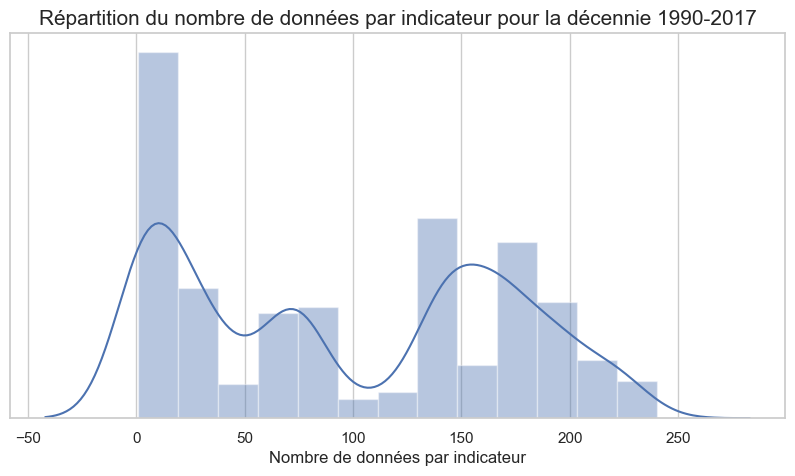

In [100]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la décennie 1990-2017', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
sns.distplot(data_short[['Indicator Name', '1990a2015']].groupby('Indicator Name').count().sort_values(by='1990a2015',ascending=False))
plt.plot()

On voit qu'on a 2 pics intéressants : 
* il y a beaucoup d'indicateurs avec très peu de données (<50)
* il y a beaucoup d'indicateurs avec plus de données (autour de 150)


On pourrait penser qu'on a 2 distributions qui se somment : une correspondant aux pays (moyenne du nombre de données par indicateur autour de 150) , l'autre aux groupes de pays (moyenne du nombre de données inférieure à 50).

Observons le nombre de NaN par indicateur

In [101]:
data_short['NaN'] = data_short[['Indicator Code', 'Country Name', '1990a2015']]['1990a2015'].isna().astype(int)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\614259999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_short['NaN'] = data_short[['Indicator Code', 'Country Name', '1990a2015']]['1990a2015'].isna().astype(int)


Nombre de NaN par indicateur et par groupe de pays

In [102]:
regions = country_c['Region'].unique().tolist()

In [103]:
groupes_pays = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'Euro area',
         'Europe & Central Asia',
         'Europe & Central Asia (excluding high income)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World']

In [104]:
data_heat_countries =  data_short[~data_short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')
data_heat_groupes = data_short[data_short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

#data_heat_groupes = data_short[data_short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

[]

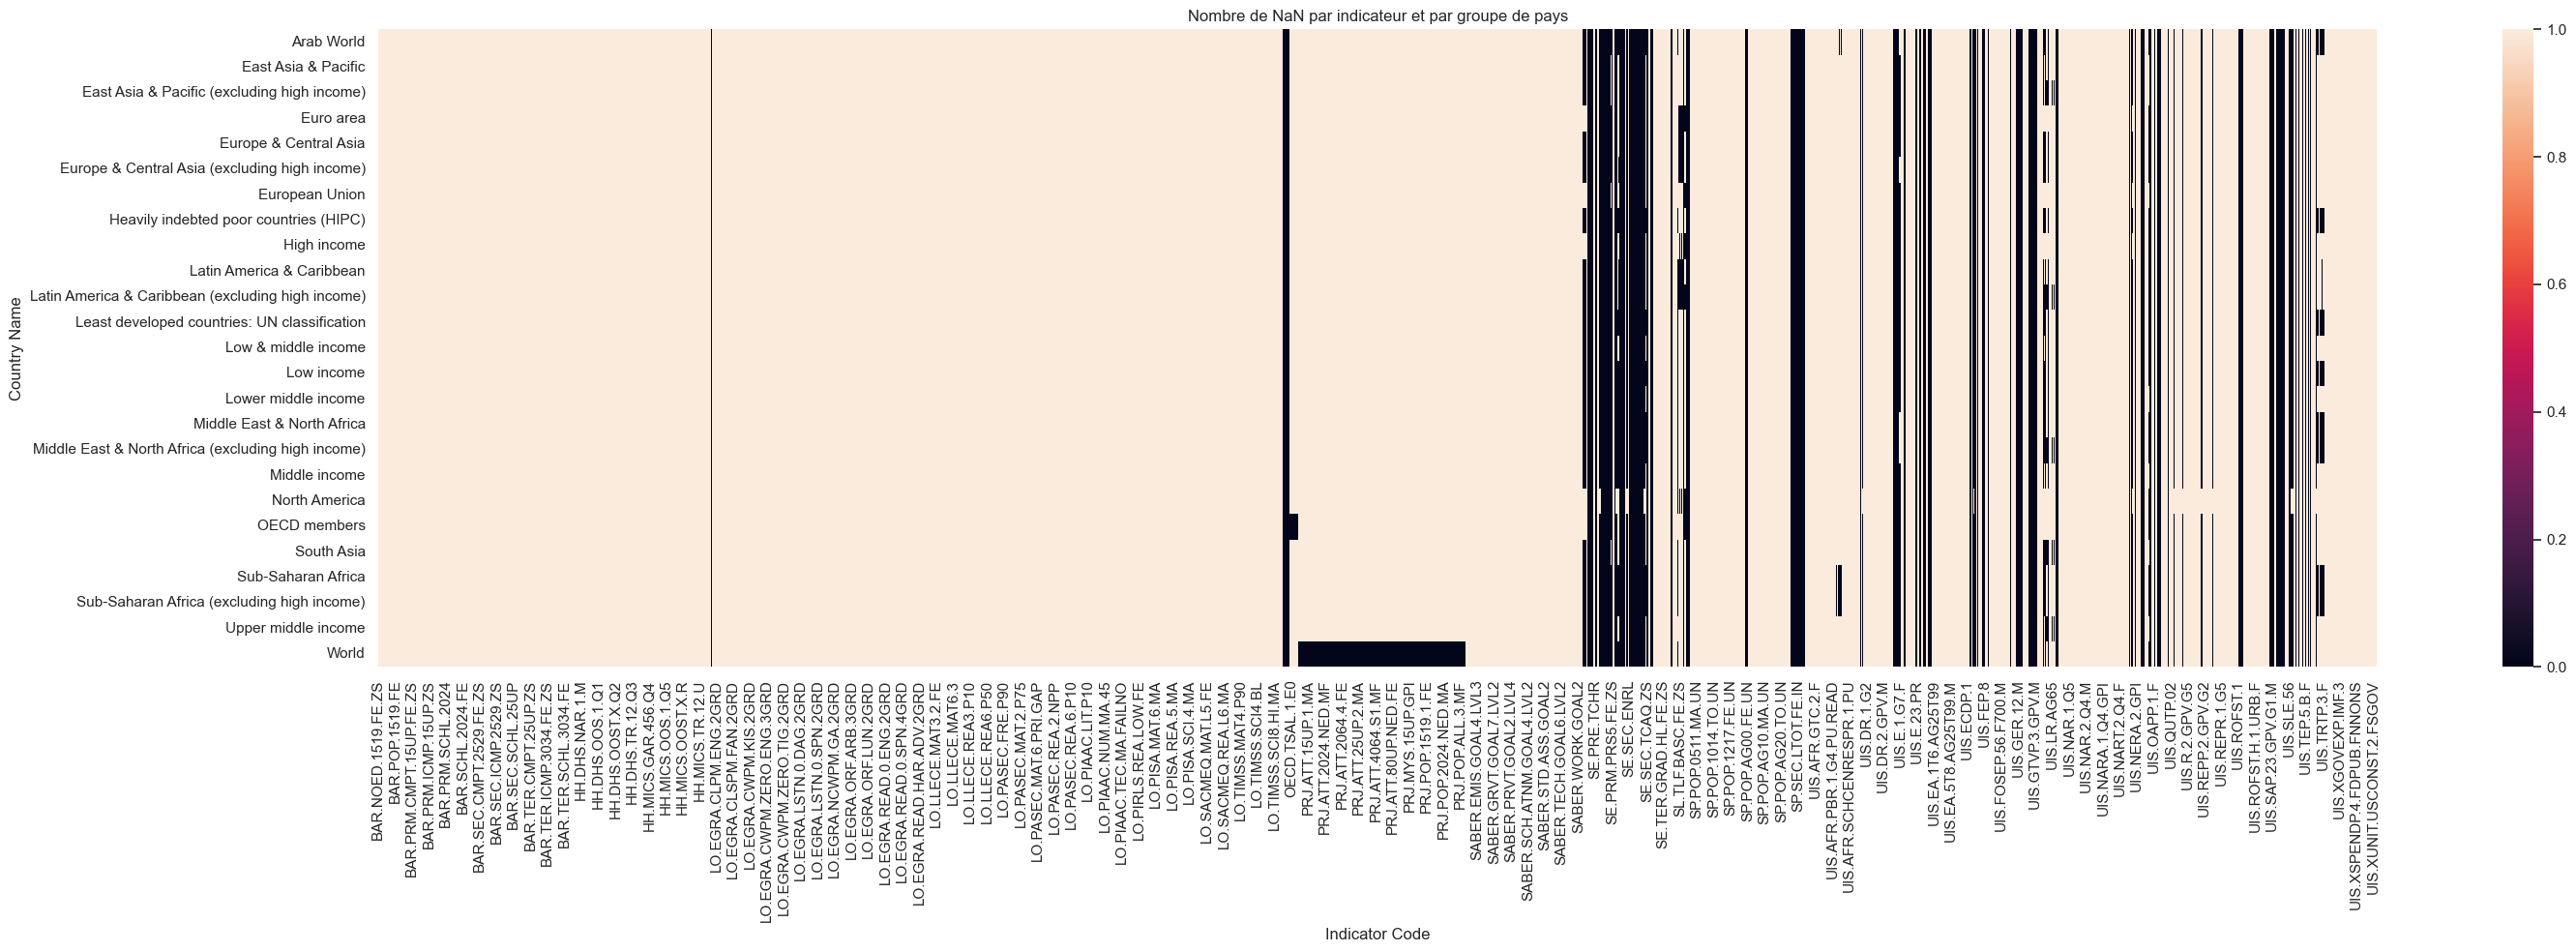

In [106]:
plt.figure(figsize=(30,10))
plt.title('Nombre de NaN par indicateur et par groupe de pays')
ax = sns.heatmap(data = data_heat_groupes)
plt.tight_layout()
plt.plot()

Il y a trop d'indicateurs pour qu'ils puissent tous être affichés mais : 
On voit que certaines catégories d'indicateurs ont tendance à avoir moins de NaN que d'autres. en particulier:
* ceux de préfixe HH
* ceux de préfixe LO
* ceux de préfixe SABER
* ceux de préfixe UIS.AFR
* ceux de préfixe UIS.NAR

A contrario, les indicateurs suivants semblent avoir beaucoup de NaN :
* ceux de préfixe BAR
* ceux de préfixe PRJ
* ceux de préfixe SE
* ceux de préfixe SP
* ceux de préfixe UIS sauf UIS.AFR et UIS.NAR

On peut supprimer de notre heatmap les indicateurs composés uniquement de NaN :

In [107]:
data_heat_groupes.drop(data_heat_groupes.loc[:, data_heat_groupes.sum()==0].columns.tolist(), axis=1, inplace=True)

On retrace la heatmap

[]

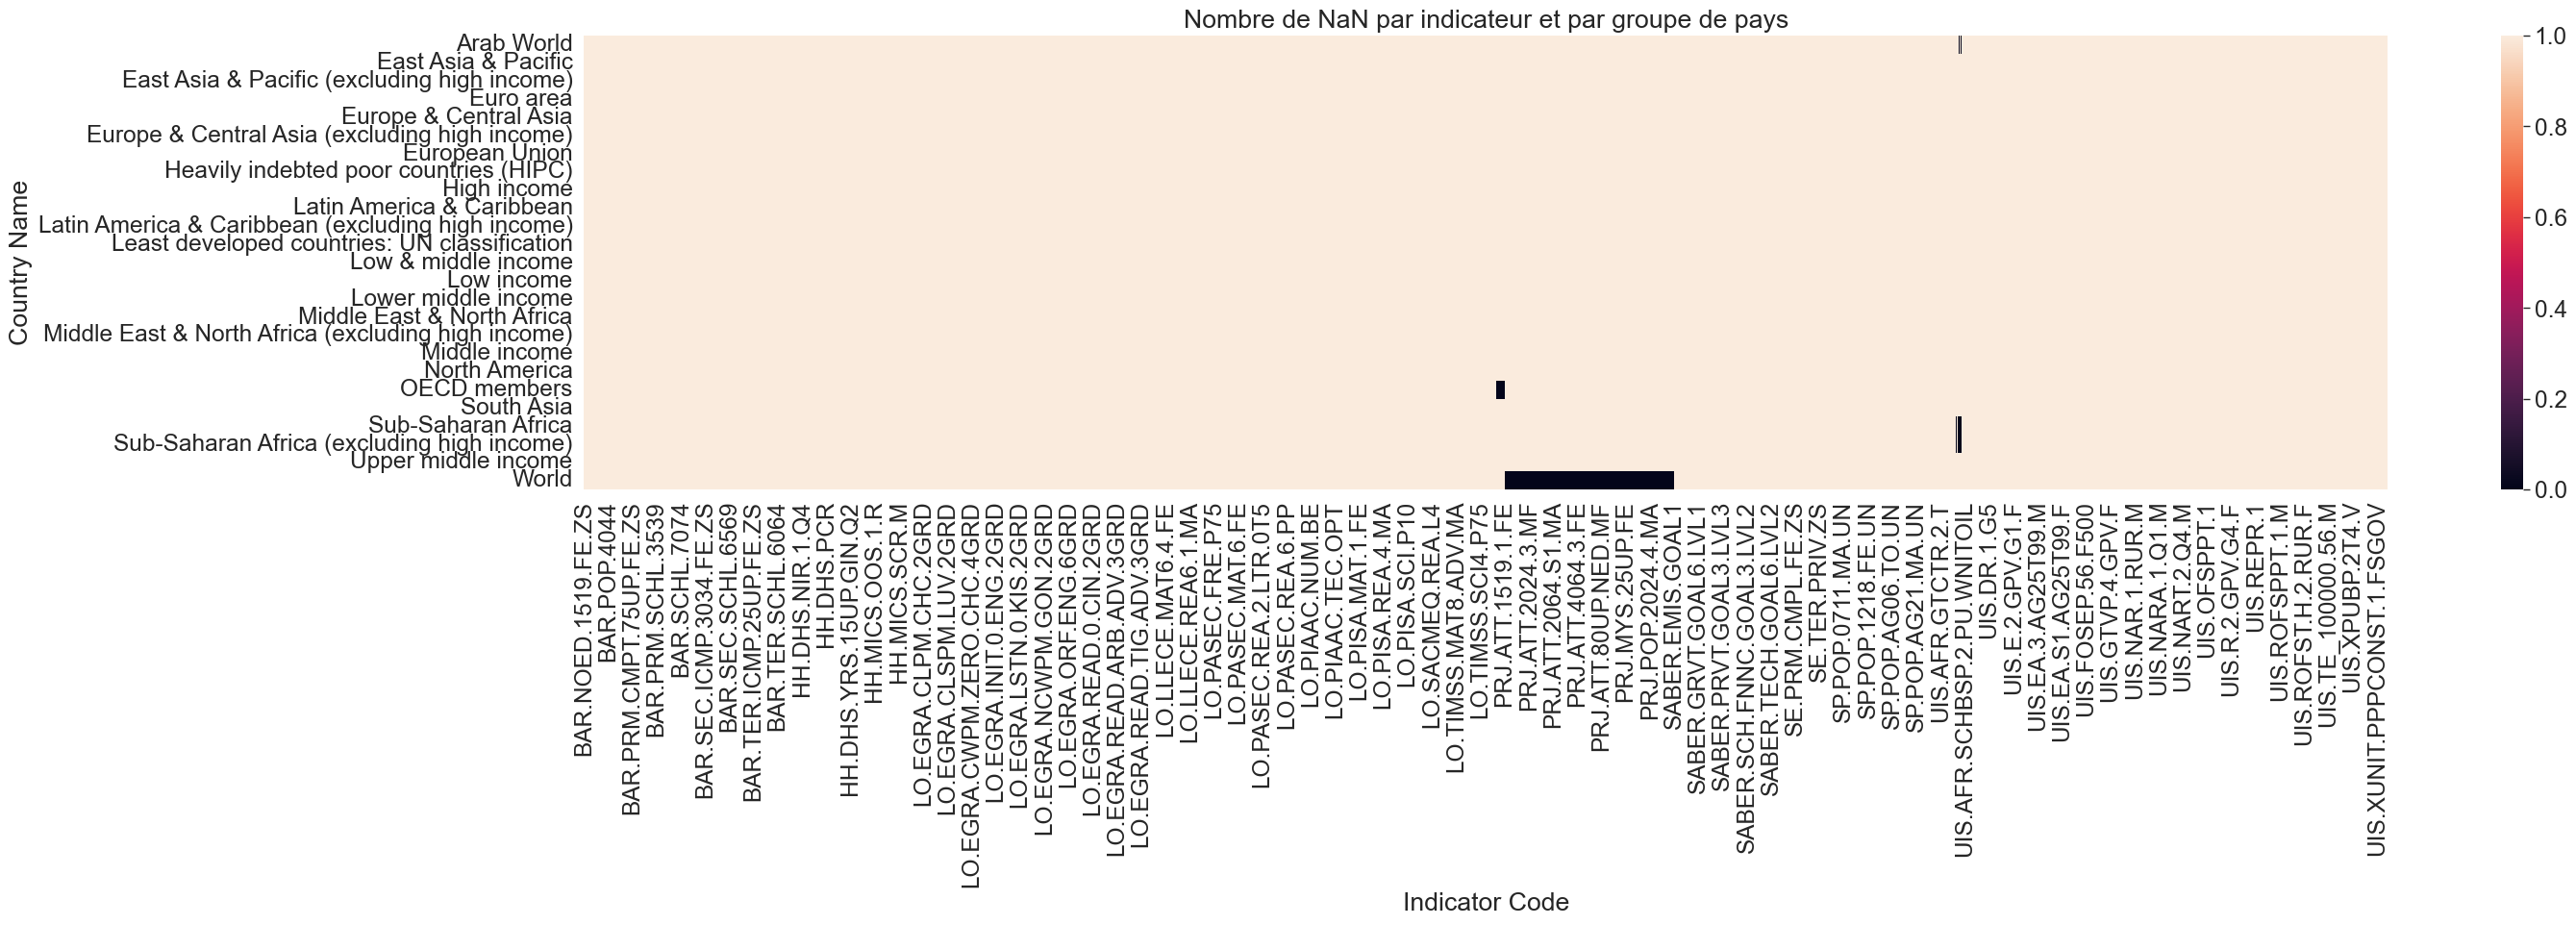

In [385]:
plt.figure(figsize=(30,10))
plt.title('Nombre de NaN par indicateur et par groupe de pays')
ax = sns.heatmap(data = data_heat_groupes)
plt.tight_layout()
plt.plot()

Ce résultat est intéressant, on voit que pour de nombreux indicateurs, il n'y a aucun NaN pour les groupes de pays! C'est le cas notamment de:
* ceux de préfixe BAR
* ceux de préfixe HH
* ceux de préfixe LO
* ceux de préfixe SP.POP
* ceux de préfixe PRU (hors zone World)

### <a name="C34">   3.4 - Indicateurs</a>

On va conserver les indicateurs qui ont plus de 80 % de données signifiantes pour les régions et pour les pays. En faisant le tri séparément

In [386]:
data_heat_groupes.drop(data_heat_groupes.loc[:, data_heat_groupes.sum()<= data_heat_groupes.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)

In [387]:
indicateur_groupes = data_heat_groupes.columns.tolist()

In [388]:
data_heat_countries.drop(data_heat_countries.loc[:, data_heat_countries.sum()<= data_heat_countries.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)

In [389]:
indicateur_countries = data_heat_groupes.columns.tolist()

On fait l'union des 2 groupes
### <a name="C341">   3.4.1 - Indicateurs à conserver</a>

In [390]:
indicateurs_a_conserver = list(dict.fromkeys(indicateur_groupes + indicateur_countries))

In [391]:
print('Nombre d\'indicateurs à conserver : ', len(indicateurs_a_conserver))
print('Proportion conservée vis à vis du dataset initial : ', round(len(indicateurs_a_conserver) / data_origine['Indicator Code'].nunique(),2) *100 ,'%')

Nombre d'indicateurs à conserver :  3276
Proportion conservée vis à vis du dataset initial :  89.0 %


On filtre maintenant data en ne conservant que les indicateurs ci-dessus

In [392]:
data_origine = data_origine[data_origine['Indicator Code'].isin(indicateurs_a_conserver)]
print(data_origine)

       Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
8        Arab World          ARB   
...             ...          ...   
886917     Zimbabwe          ZWE   
886918     Zimbabwe          ZWE   
886919     Zimbabwe          ZWE   
886920     Zimbabwe          ZWE   
886921     Zimbabwe          ZWE   

                                           Indicator Name    Indicator Code  \
0       Adjusted net enrolment rate, lower secondary, ...        UIS.NERA.2   
1       Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2.F   
2       Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.GPI   
3       Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2.M   
8       Adjusted net enrolment rate, upper secondary, ...        UIS.NERA.3   
...                                                   ...               ...   
886917  Wittge

In [393]:
data_origine['Indicator Name'].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 1 of primary education (number)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 2 of primary education (number)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 3 of primary education (number)',
 'Africa Dataset: Average number of pupil

Suite à la première analyse des données, on peut se focaliser sur la recherche des données par les indicateurs contenus dans "data_short"

In [394]:
data_short

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code      1990a2015              Region  NaN  
0                 UIS.NERA.2            NaN                 NaN    1  
1               UIS.NERA.2.F            NaN                 NaN    1  
2             UIS.NERA.2.GPI            NaN                 NaN    1  
3               UIS.NERA.2.M            NaN                 NaN    1  
4                SE.PRM.TENR      78.872465                 NaN    0  
...                      ...            ...                 ...  ...  
886925      UIS.LP.AG15T24.M  134981.000000  Sub-Saharan Africa    0  
886926     SE.ADT.1524.LT.ZS      92.256727  Sub-Saharan Africa    0  
886927  SE.ADT.1524.LT.FE.ZS      93.222116  Sub-Saharan Africa    0  
886928  SE.ADT.1524.LT.FM.ZS       1.023170  Sub-Saharan Africa    0  
886929  SE.ADT.1524.LT.MA.ZS      91.241020  Sub-Saharan Africa    0  

[886930 rows x 7 columns]

### <a name="C342">   3.4.2 - Indicateurs Retenus</a>

on veut identifier les pays avec un potentiel de lycéens et étudiants important. 

**liste des indicateurs :** http://datatopics.worldbank.org/education/indicators

**idées retenues :**
* des indicateurs pour quantifier l'utilisation d'internet dans les pays et zones
* des indicateurs pour quantifier le nombre d'étudiants et lycéens (quitte à faire des calculs à partir de ces indicateurs)
* des indicateurs pour quantifier les dépenses par étudiant pour voir dans quels pays les personnes seraient en capacité de payer pour des services supplémentaires


**indicateurs identifiés :**

**Ratios liés à l'éducation**
*  UIS.E.4                 Enrolment in post-secondary non-tertiary education, both sexes (number)
*  UIS.E.3                 Enrolment in upper secondary education, both sexes (number) 
*  SE.TER.ENRL             Enrolment in tertiary education, all programmes, both sexes (number)

**Dépenses liées à l'éducation**
*  UIS.X.USCONST.3.FSGOV
*  SE.XPD.TOTL.GD.ZS       la part du PIB que ce pays consacre aux dépenses d'éducation

**Données démographiques:**
*  SP.POP.TOTL             Population, total 
*  SP.POP.1524.TO.UN       Population, ages 15-24, total 

**Percée de l'utilisation d'internet et des ordinateurs:**
*  IT.NET.USER.P2          Internet users (per 100 people) 
*  IT.CMP.PCMP.P2          Personal computers (per 100 people) 

**PIB:**
*  NY.GDP.PCAP.CD          niveau de richesse d'un pays

Création d'une liste d'indicateur

In [395]:
indicateurs = ['UIS.E.4',
              'UIS.E.3',
              'SE.TER.ENRL',
              'UIS.X.USCONST.3.FSGOV',
              'SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
              'IT.NET.USER.P2',
              'IT.CMP.PCMP.P2',
              'NY.GDP.PCAP.CD',
              'SE.XPD.TOTL.GD.ZS']

In [396]:
data_short[data_short['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '1990a2015']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='1990a2015',ascending=False)

Indicator Name     Indicator Code  \
8                                  Population, total        SP.POP.TOTL   
3                       GDP per capita (current US$)     NY.GDP.PCAP.CD   
5                    Internet users (per 100 people)     IT.NET.USER.P2   
2  Enrolment in upper secondary education, both s...            UIS.E.3   
1  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
6                Personal computers (per 100 people)     IT.CMP.PCMP.P2   
4  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
7                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
0  Enrolment in post-secondary non-tertiary educa...            UIS.E.4   

   1990a2015  
8        240  
3        234  
5        233  
2        225  
1        224  
6        218  
4        192  
7        192  
0        171

#### Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

In [397]:
data_countries = data_short[data_short['Country Name'].isin(list_countries)][data_short['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)
print(data_countries)
data_areas     = data_short[data_short['Country Name'].isin(areas)][data_short['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)

       Country Name Country Code  \
92796   Afghanistan          AFG   
92829   Afghanistan          AFG   
92839   Afghanistan          AFG   
92870   Afghanistan          AFG   
92885   Afghanistan          AFG   
...             ...          ...   
884525     Zimbabwe          ZWE   
884640     Zimbabwe          ZWE   
885349     Zimbabwe          ZWE   
885747     Zimbabwe          ZWE   
885798     Zimbabwe          ZWE   

                                           Indicator Name     Indicator Code  \
92796   Enrolment in post-secondary non-tertiary educa...            UIS.E.4   
92829   Enrolment in tertiary education, all programme...        SE.TER.ENRL   
92839   Enrolment in upper secondary education, both s...            UIS.E.3   
92870                        GDP per capita (current US$)     NY.GDP.PCAP.CD   
92885   Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
...                                                   ...                ...   
884525 

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2969821148.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_countries = data_short[data_short['Country Name'].isin(list_countries)][data_short['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2969821148.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_areas     = data_short[data_short['Country Name'].isin(areas)][data_short['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)


In [398]:
import pandas as pd

def description_indicateurs(df, indicateurs, groupe):
    # Initialisation du DataFrame qui stockera les données pour chaque indicateur
    df_per_indicator = pd.DataFrame()
    
    # Boucle sur chaque indicateur
    for indicateur in indicateurs:
        # Extraction des données correspondantes à l'indicateur
        df_temp = df[df['Indicator Code'] == indicateur]
        
        # Ajout d'une colonne pour les données de la décennie 2010 et suppression des colonnes inutiles
        df_temp[indicateur] = df['1990a2015']
        df_temp.drop(['1990a2015', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
        
        # Fusion avec le DataFrame des indicateurs si ce dernier n'est pas vide
        if df_per_indicator.empty is False:
            df_per_indicator = df_per_indicator.merge(right=df_temp, how='outer', on=['Country Code', 'Country Name', 'Region']).sort_values(by='Country Name')
        else:
            # Sinon, initialisation du DataFrame des indicateurs avec les données du premier indicateur
            df_per_indicator = df_temp
            
    # Calcul des statistiques descriptives pour chaque indicateur et ajout d'une colonne pour la somme des valeurs
    description = df_per_indicator.groupby([groupe])[indicateurs].describe(percentiles=[0.5])
    for indicateur in indicateurs:
        description[(indicateur, 'sum')] = description[(indicateur, 'count')] * description[(indicateur, 'mean')]
    
    # Sélection des colonnes à utiliser pour la table des statistiques descriptives
    colonnes = []
    for indicateur in indicateurs:
        for stat in ['mean', 'std', '50%', 'sum'] :
            colonnes += [(indicateur, stat)]
    description = description[colonnes]
    
    # Réinitialisation de l'index du DataFrame
    description.reset_index(inplace=True)
    
    # Renvoi de la table des statistiques descriptives et du DataFrame des indicateurs
    return description, df_per_indicator


In [399]:
description_countries, df_countries = description_indicateurs(data_countries, indicateurs, 'Region')
print(df_countries)
description_zones, df_zones     = description_indicateurs(data_areas, indicateurs, 'Country Name')

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2251675882.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[indicateur] = df['1990a2015']
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2251675882.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(['1990a2015', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2251675882.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

        Country Name Country Code                      Region    UIS.E.4  \
0        Afghanistan          AFG                  South Asia  70135.125   
1            Albania          ALB       Europe & Central Asia   1889.000   
2            Algeria          DZA  Middle East & North Africa        NaN   
3     American Samoa          ASM         East Asia & Pacific        NaN   
4            Andorra          AND       Europe & Central Asia    516.000   
...              ...          ...                         ...        ...   
1965             NaN          NaN                         NaN        NaN   
1966             NaN          NaN                         NaN        NaN   
1967             NaN          NaN                         NaN        NaN   
1968             NaN          NaN                         NaN        NaN   
1969             NaN          NaN                         NaN        NaN   

           UIS.E.3    SE.TER.ENRL  UIS.X.USCONST.3.FSGOV   SP.POP.TOTL  \
0     4.71524

On obtient un tableau récap de tous les indicateurs par Régions et par zone géographique :

In [400]:
description_countries

Region        UIS.E.4                                \
                                        mean            std            50%   
0         East Asia & Pacific  120485.169229  197053.642291   16887.281250   
1       Europe & Central Asia   44263.198565   95418.228323   12747.218750   
2   Latin America & Caribbean   52068.739366  163397.520054    2269.500000   
3  Middle East & North Africa    9162.949550   12070.786615    4212.500000   
4               North America  550476.050781  316880.783416  550476.050781   
5                  South Asia  103034.533225  188064.748431   17683.333333   
6          Sub-Saharan Africa   22448.955360   48147.106806    4881.500000   

                      UIS.E.3                                            \
            sum          mean           std           50%           sum   
0  2.168733e+06  2.128869e+06  7.257473e+06  1.269951e+05  5.535059e+07   
1  1.859054e+06  6.020953e+05  8.703916e+05  2.578957e+05  3.010477e+07   
2  1.301718e+06  6.121984e+05  1.683378e+06  1.103763e+05  2.142695e+07   
3  1.191183e+05  3.556855e+05  4.029242e+05  1.709558e+05  6.402338e+06   
4  1.100952e+06  4.314392e+06  6.084902e+06  1.666225e+06  1.294318e+07   
5  7.212417e+05  6.387598e+06  1.382210e+07  1.063415e+06  5.110078e+07   
6  6.285708e+05  2.702390e+05  5.806284e+05  8.347912e+04  1.107980e+07   

    SE.TER.ENRL  ... IT.CMP.PCMP.P2             NY.GDP.PCAP.CD                \
           mean  ...            50%         sum           mean           std   
0  1.274022e+06  ...       3.751671  258.248108   10254.667812  12478.988889   
1  4.948622e+05  ...      11.525051  826.524938   23744.001689  25234.187816   
2  3.980488e+05  ...       4.502342  205.970057    7224.408544   8446.733460   
3  2.194696e+05  ...       4.028249  133.601142   12239.222611  12854.831313   
4  6.063545e+06  ...      40.868990  124.769822   44824.929041  14698.391965   
5  2.263505e+06  ...       0.686133   11.441849    1276.298390   1309.487102   
6  9.694612e+04  ...       0.422816   70.161547    1557.524677   2229.368493   

                              SE.XPD.TOTL.GD.ZS                           \
            50%           sum              mean            std       50%   
0   2673.133968  3.281494e+05      71751.695441  365838.094950  4.819754   
1  13962.972789  1.282176e+06          4.563232       1.411896  4.844100   
2   4830.637856  2.456299e+05          4.354403       1.629873  4.254992   
3   6517.117554  2.203060e+05          4.483629       2.028507  4.904836   
4  40181.212822  1.344748e+05          4.406608       1.780828  5.165421   
5    780.932603  1.021039e+04          3.469297       1.262096  3.424570   
6    611.781304  6.697356e+04          4.328562       2.541989  3.682175   

                 
            sum  
0  1.865544e+06  
1  2.144719e+02  
2  1.436953e+02  
3  7.622170e+01  
4  1.321983e+01  
5  2.775438e+01  
6  1.774710e+02  

[7 rows x 41 columns]

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


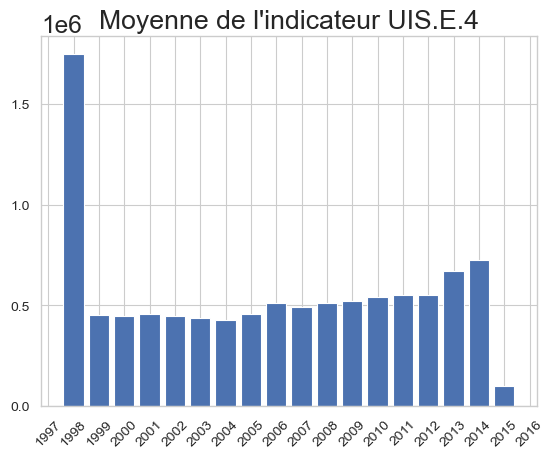

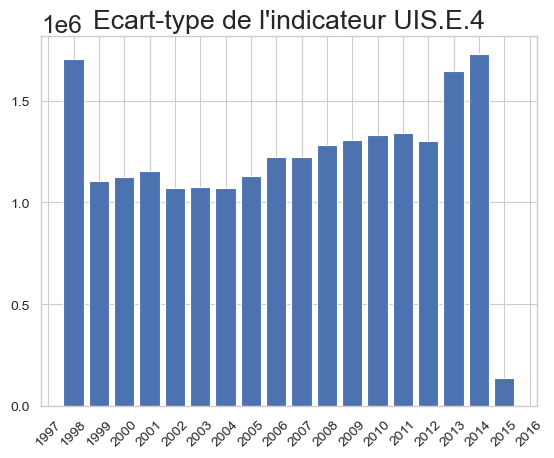

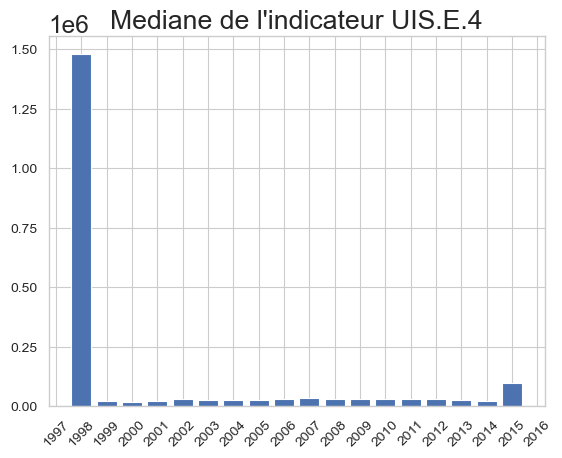

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


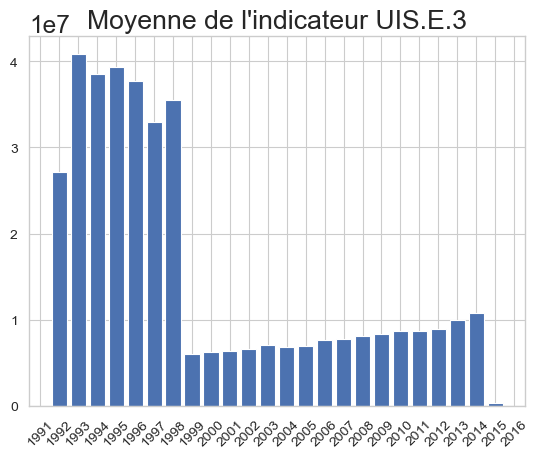

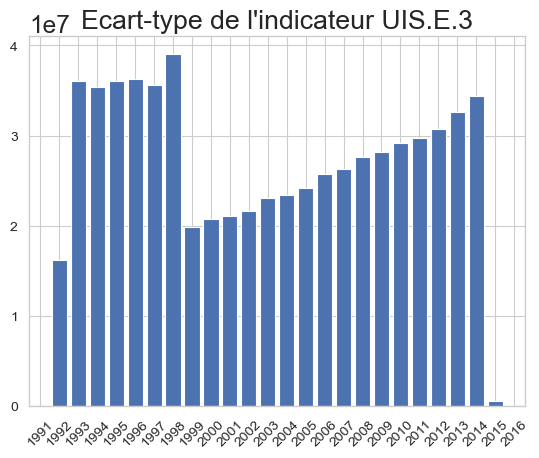

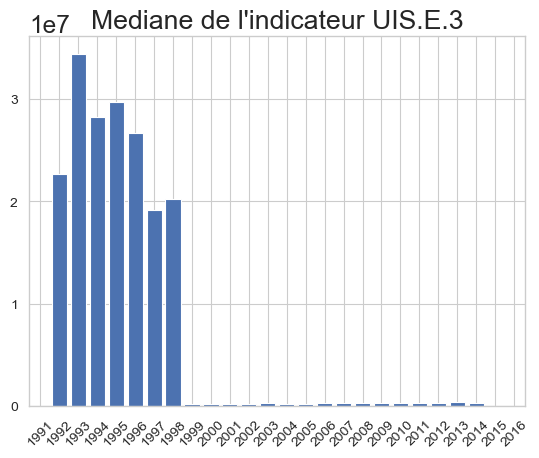

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


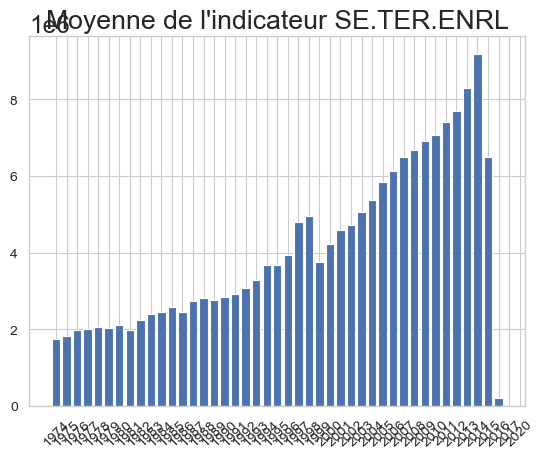

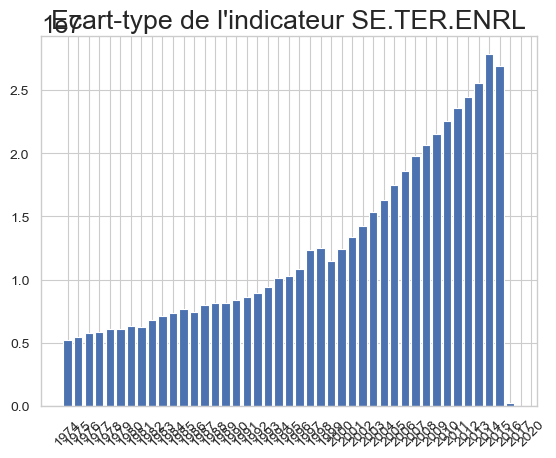

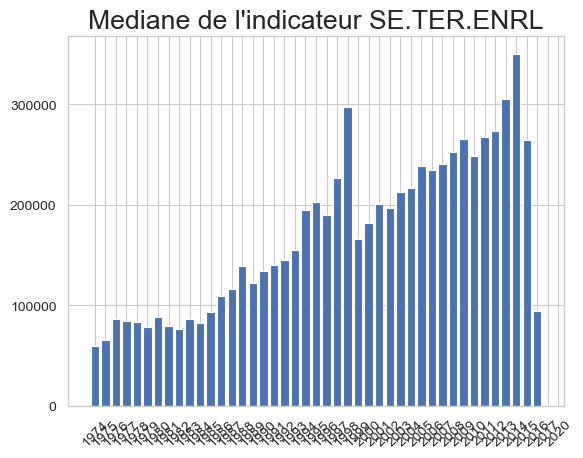

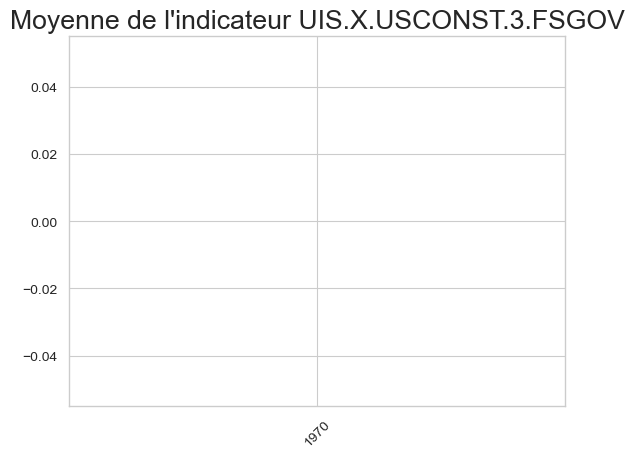

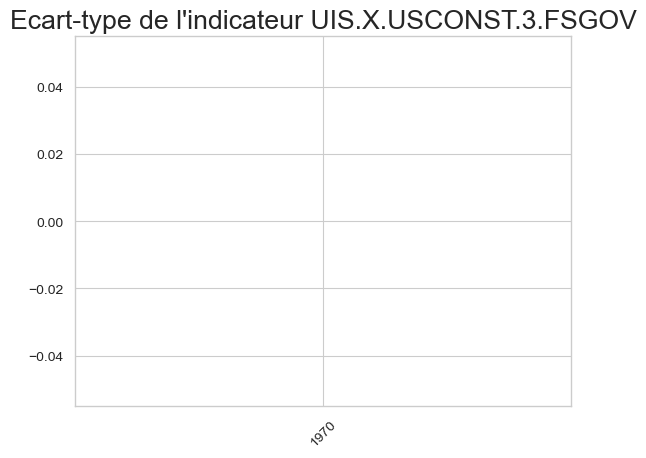

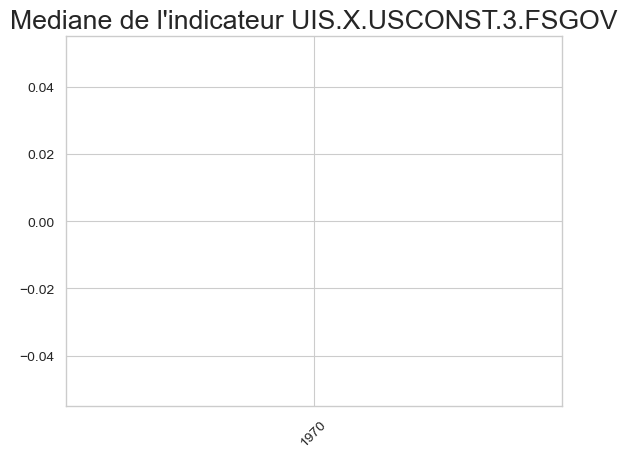

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


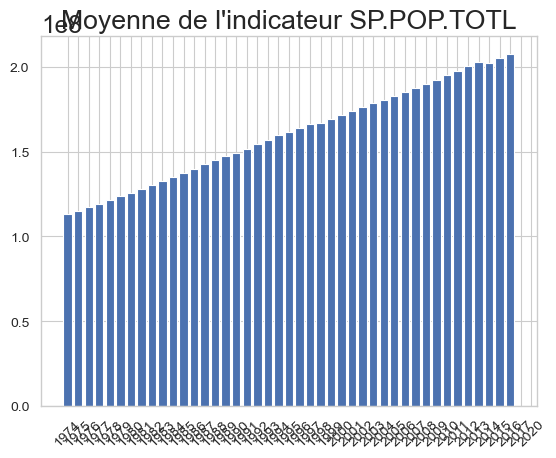

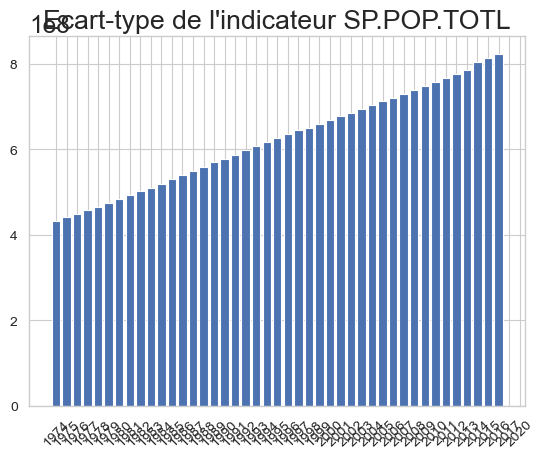

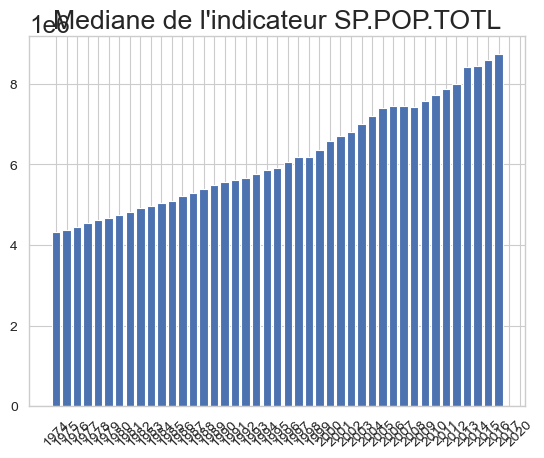

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


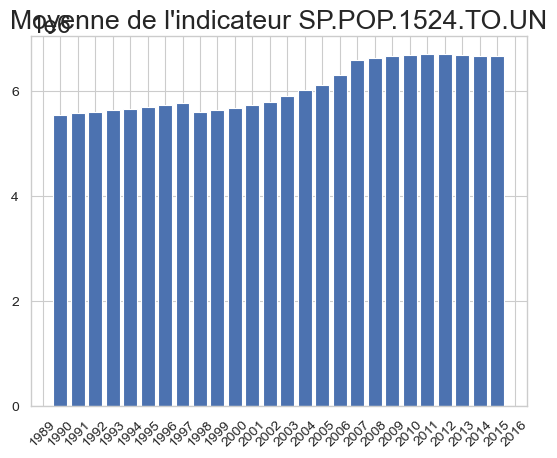

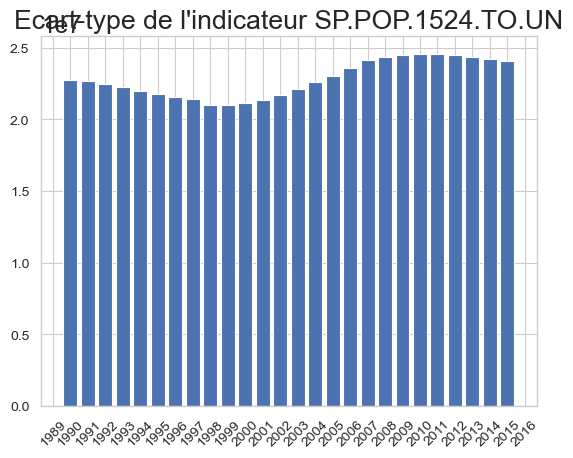

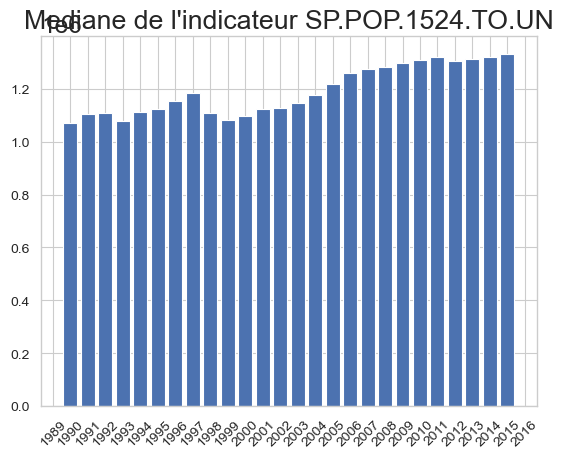

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


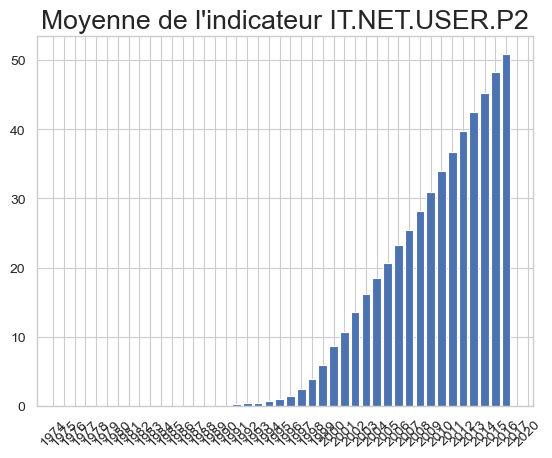

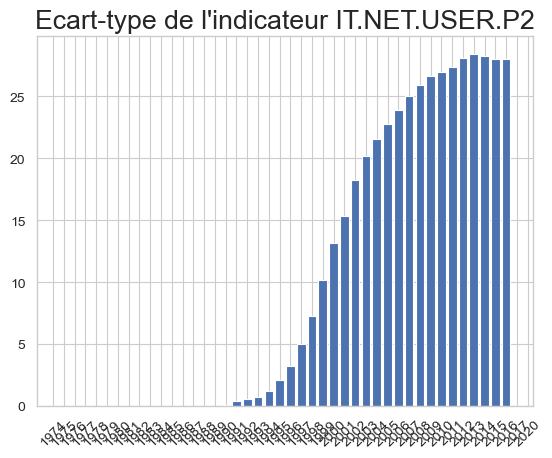

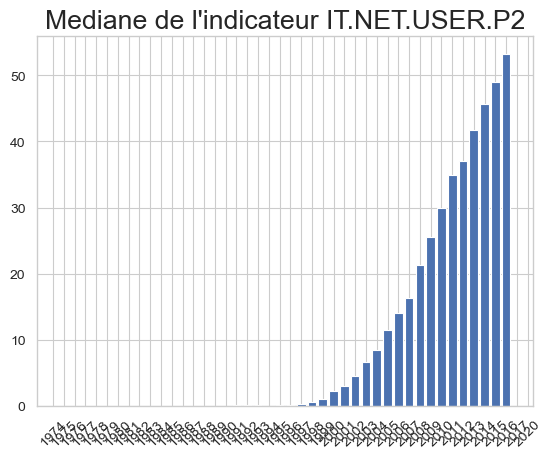

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


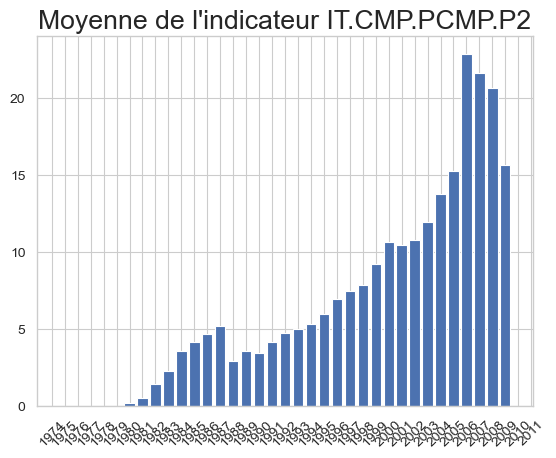

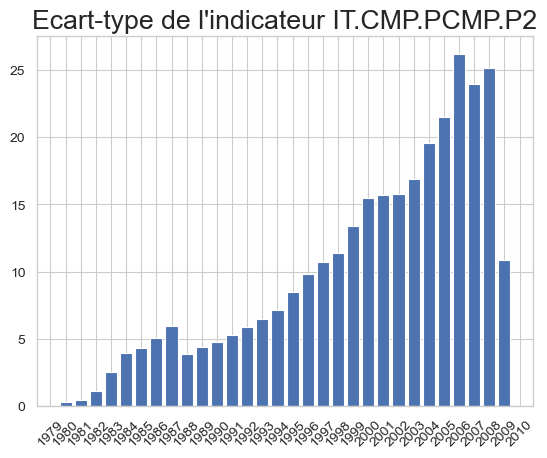

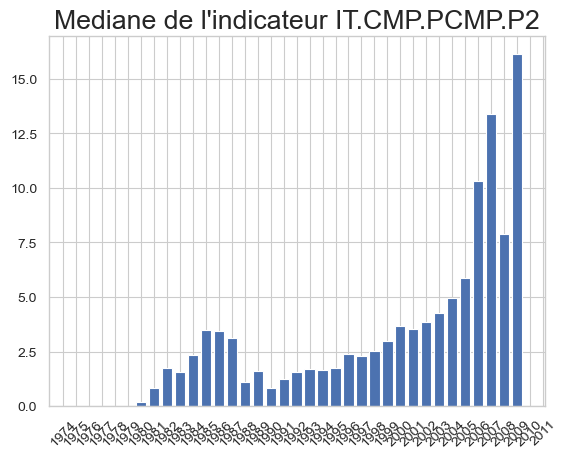

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


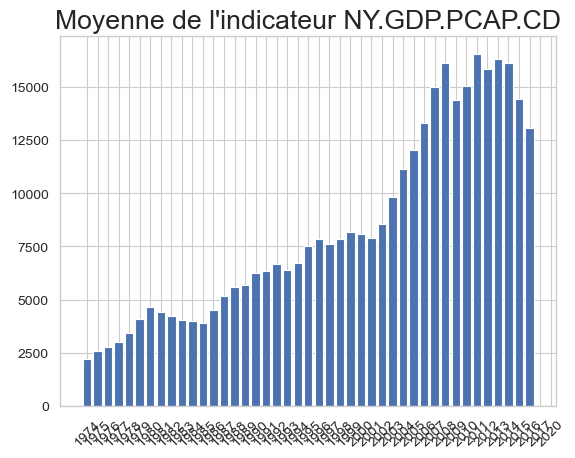

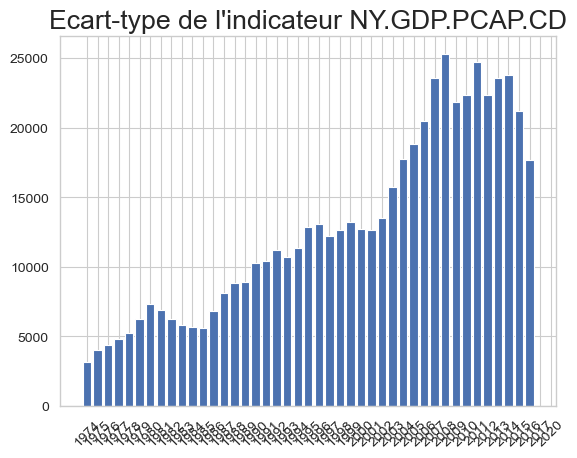

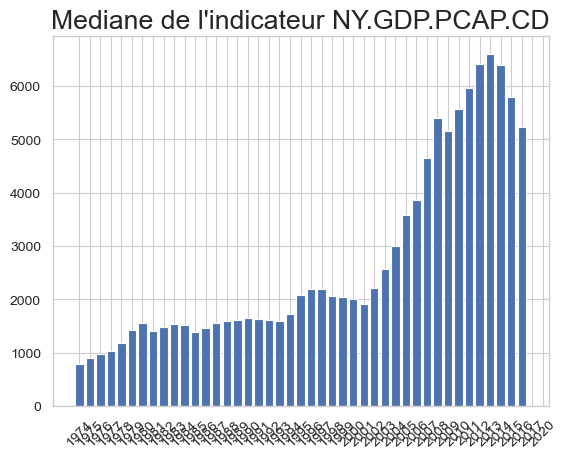

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1983693981.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)


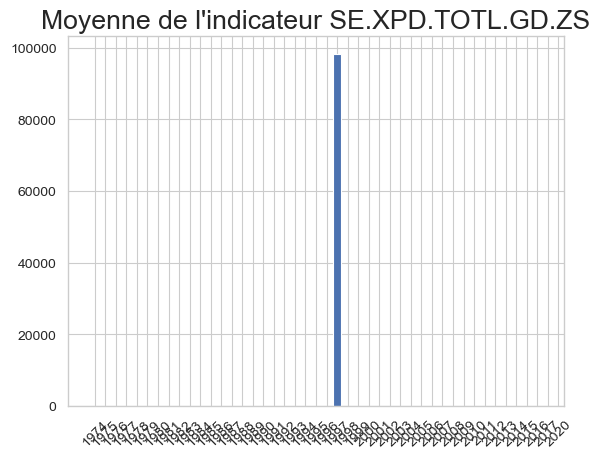

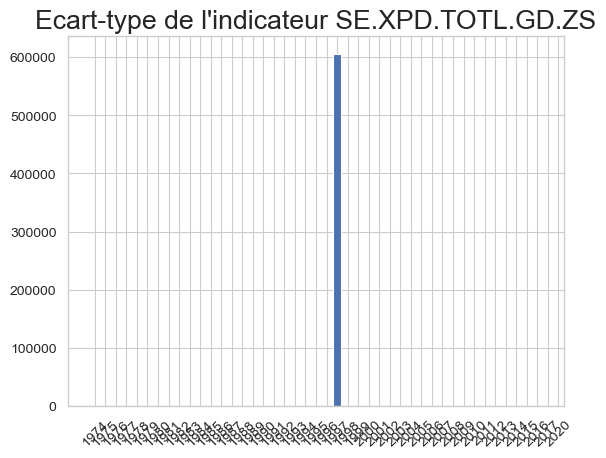

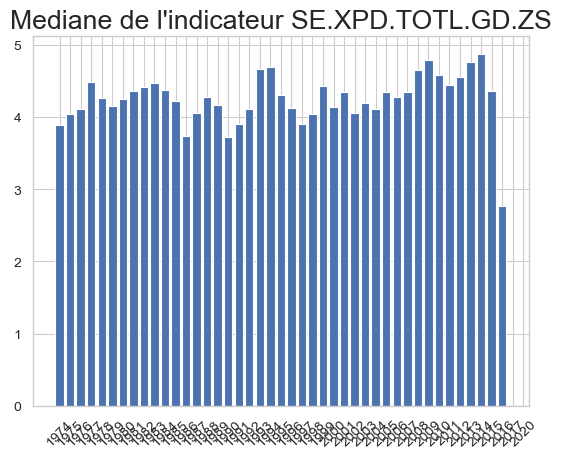

In [401]:
import pandas as pd

# Charger les données à partir du fichier CSV
data = pd.read_csv('EdStatsData.csv')
data.head()
# Sélectionner les colonnes correspondant aux indicateurs
indicators = ['UIS.E.4', 'UIS.E.3', 'SE.TER.ENRL', 'UIS.X.USCONST.3.FSGOV', 'SP.POP.TOTL', 'SP.POP.1524.TO.UN', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'NY.GDP.PCAP.CD', 'SE.XPD.TOTL.GD.ZS']
data = data.loc[data['Indicator Code'].isin(indicators)]
import matplotlib.pyplot as plt

def plot_indicator_stats(indicator):
    # Sélectionner les données pour l'indicateur donné
    indicator_data = data.loc[data['Indicator Code'] == indicator]
    
    # Calculer la moyenne, l'écart-type et la médiane
    mean = indicator_data.mean(axis=0)
    std = indicator_data.std(axis=0)
    median = indicator_data.median(axis=0)
    
    # Tracer le graphique de la moyenne
    plt.figure()
    plt.bar(mean.index[4:-1], mean[4:-1])
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Moyenne de l\'indicateur ' + indicator)
    plt.show()
    
    # Tracer le graphique de l'écart-type
    plt.figure()
    plt.bar(std.index[4:-1], std[4:-1])
    plt.xticks(rotation=45, fontsize=10) 
    plt.yticks(fontsize=10)
    plt.title('Ecart-type de l\'indicateur ' + indicator)
    plt.show()
    
    # Tracer le graphique de la médiane
    plt.figure()
    plt.bar(median.index[4:-1], median[4:-1])
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Mediane de l\'indicateur ' + indicator)
    plt.show()
for indicator in indicators:
    plot_indicator_stats(indicator)


C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1538509428.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1538509428.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1538509428.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = indicator_data.median(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1538509428.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(median.index[4:-1],rotation=45, fontsize=8)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1538509428.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = indicator_data.mean(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1538509428.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = indicator_data.std(axis=0)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1538509428.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=N

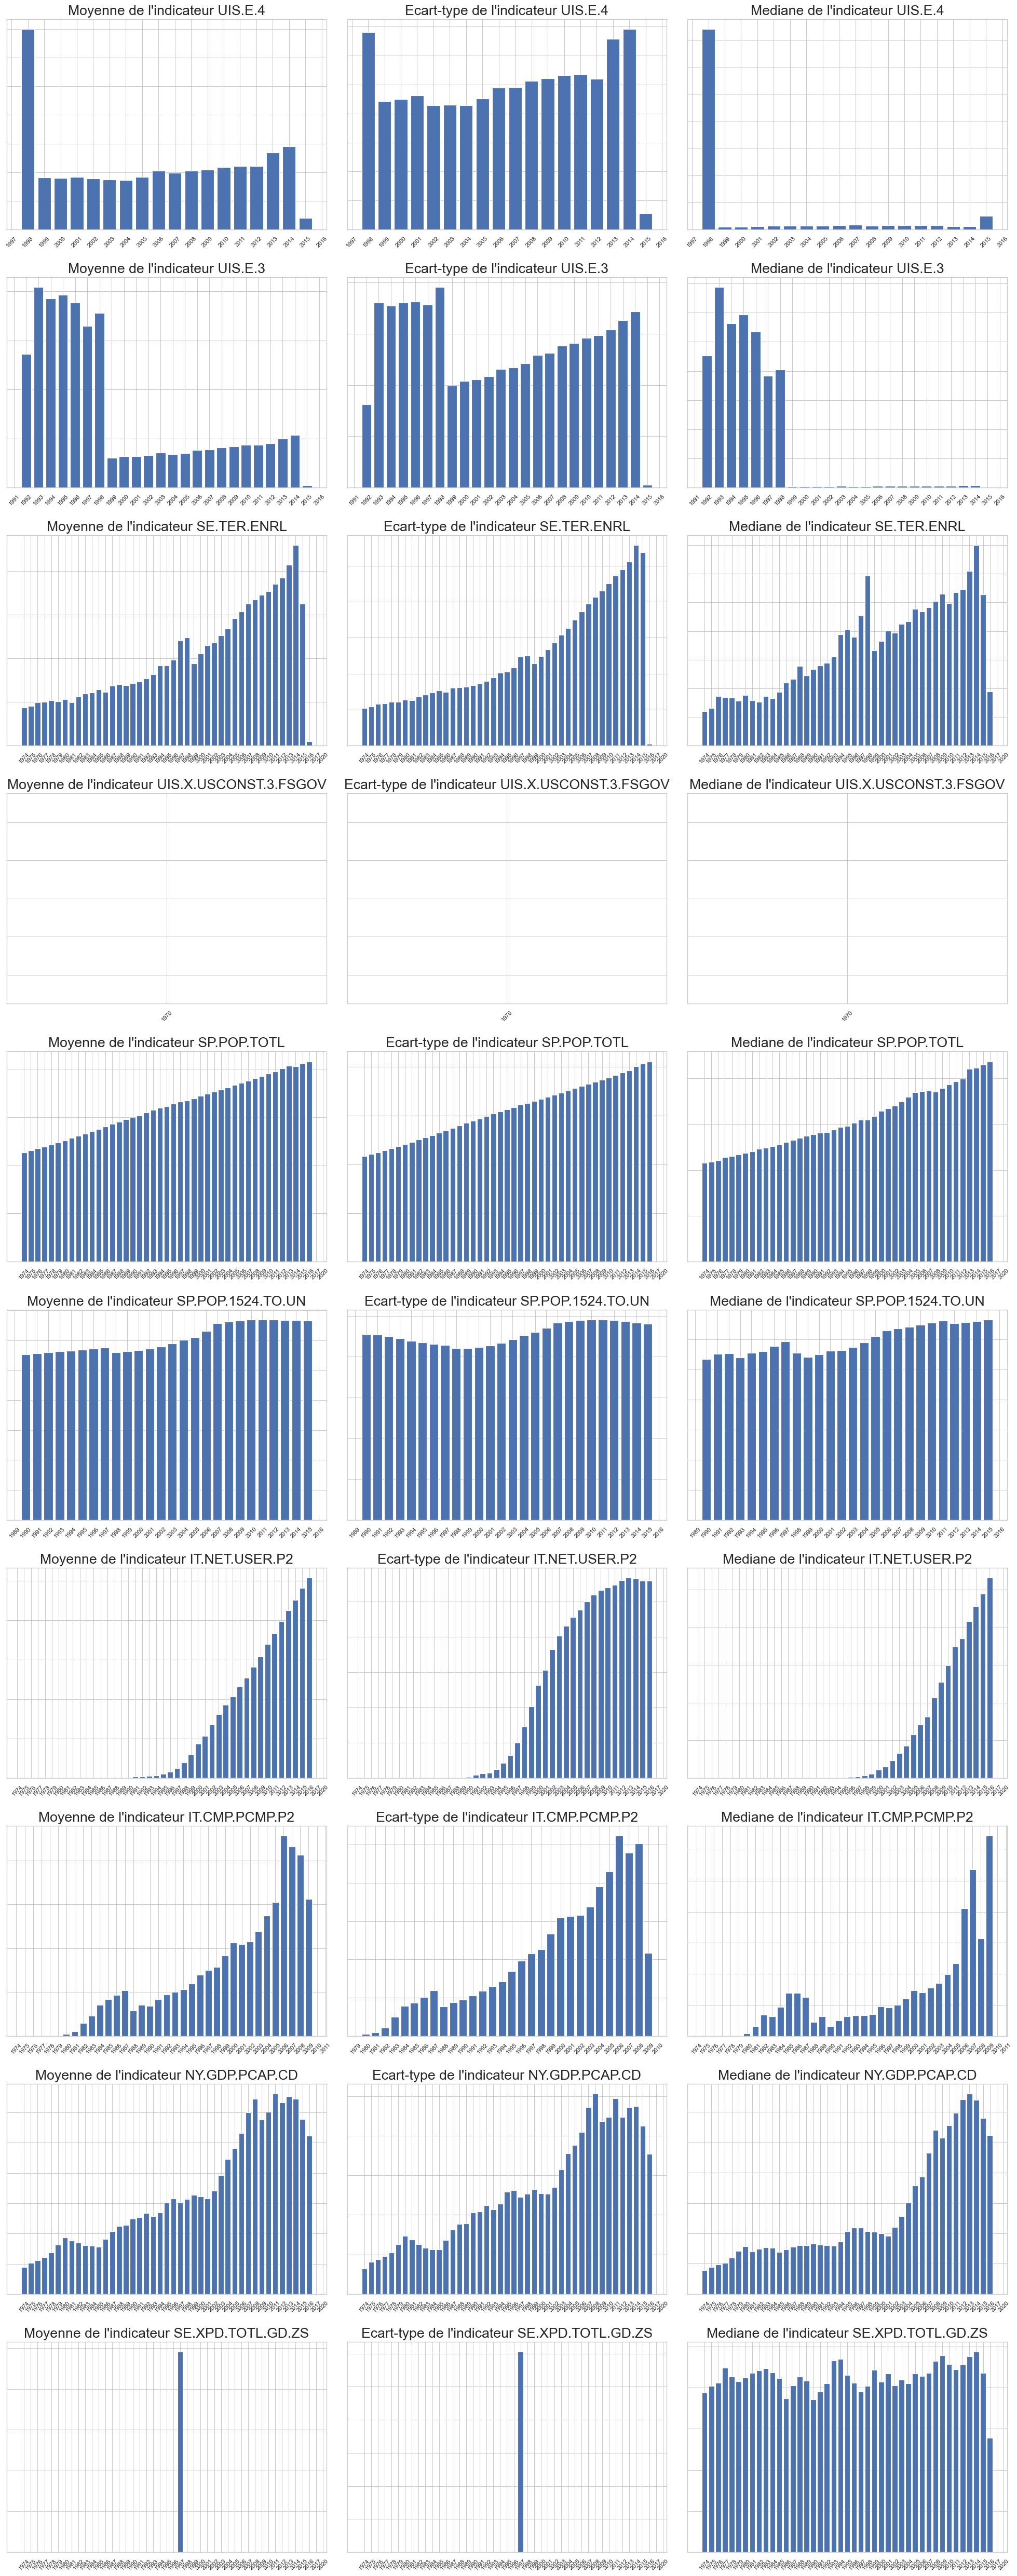

In [406]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données à partir du fichier CSV
data = pd.read_csv('EdStatsData.csv')
data.head()

# Sélectionner les colonnes correspondant aux indicateurs
indicators = ['UIS.E.4', 'UIS.E.3', 'SE.TER.ENRL', 'UIS.X.USCONST.3.FSGOV', 'SP.POP.TOTL', 'SP.POP.1524.TO.UN', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'NY.GDP.PCAP.CD', 'SE.XPD.TOTL.GD.ZS']
data = data.loc[data['Indicator Code'].isin(indicators)]

def plot_indicator_stats(indicator, ax):
    # Sélectionner les données pour l'indicateur donné
    indicator_data = data.loc[data['Indicator Code'] == indicator]
    
    # Calculer la moyenne, l'écart-type et la médiane
    mean = indicator_data.mean(axis=0)
    std = indicator_data.std(axis=0)
    median = indicator_data.median(axis=0)
    
    # Tracer le graphique de la moyenne
    ax[0].bar(mean.index[4:-1], mean[4:-1])
    ax[0].set_xticklabels(mean.index[4:-1],rotation=45, fontsize=8)
    #ax[0].set_yticklabels(fontsize=10)
    ax[0].set_yticklabels([], fontsize=8)
    ax[0].set_title('Moyenne de l\'indicateur ' + indicator)
    
    # Tracer le graphique de l'écart-type
    ax[1].bar(std.index[4:-1], std[4:-1])
    ax[1].set_xticklabels(std.index[4:-1],rotation=45, fontsize=8)
    #ax[1].set_yticklabels(fontsize=10)
    ax[1].set_yticklabels([], fontsize=8)
    ax[1].set_title('Ecart-type de l\'indicateur ' + indicator)
    
    # Tracer le graphique de la médiane
    ax[2].bar(median.index[4:-1], median[4:-1])
    ax[2].set_xticklabels(median.index[4:-1],rotation=45, fontsize=8)
    #ax[2].set_yticklabels(fontsize=10)
    ax[2].set_yticklabels([], fontsize=8)
    ax[2].set_title('Mediane de l\'indicateur ' + indicator)

fig, axes = plt.subplots(nrows=len(indicators), ncols=3, figsize=(20, 5*len(indicators)))
for i, indicator in enumerate(indicators):
    plot_indicator_stats(indicator, axes[i])

plt.tight_layout()
plt.show()


Ensuite nous allons créer un graphique, où x est une colonne du DataFrame qui contient des valeurs numériques représentant la moyenne de la population âgée de 15 à 24 ans (codée par l'indicateur SP.POP.1524.TO.UN) pour chaque zone géographique.

<AxesSubplot:xlabel="('SP.POP.1524.TO.UN', 'mean')", ylabel='Region'>

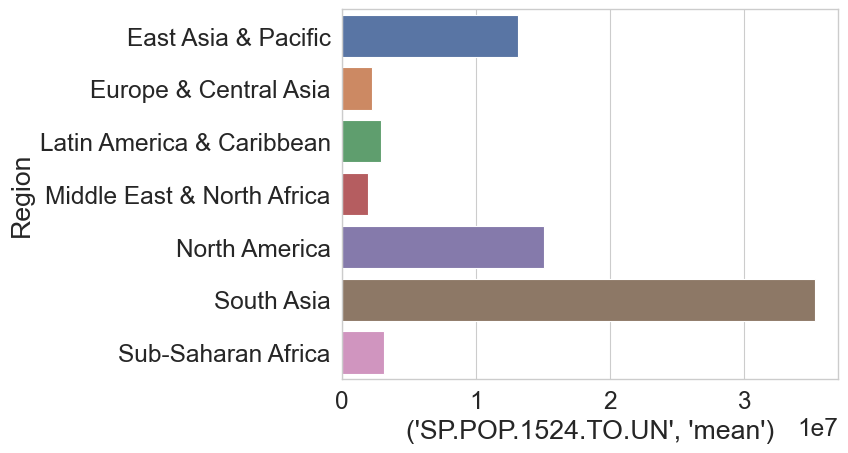

In [407]:
sns.barplot(x= description_countries[('SP.POP.1524.TO.UN','mean')], y=description_countries['Region'])

On peut tracer des tableaux récapitulatifs des indicateurs par zone géographique //le faire par pays 

In [336]:
data_indicateur = data_short.copy()
data_indicateur.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

   1990a2015 Region  NaN  
0        NaN    NaN    1  
1        NaN    NaN    1  
2        NaN    NaN    1  
3        NaN    NaN    1  
4  78.872465    NaN    0

In [337]:
data_indicateur[data_indicateur['Indicator Code'] == 'UIS.E.4']['Indicator Name'].unique()[0]

'Enrolment in post-secondary non-tertiary education, both sexes (number)'

'Enrolment in post-secondary non-tertiary education, both sexes (number)'
« Inscriptions dans l'enseignement post-secondaire non supérieur, les deux sexes (nombre) »

In [338]:
data_indicateur[data_indicateur['Indicator Code'].isin(['UIS.X.USCONST.3.FSGOV'])].count().sum()

0

#### graphique à barres avec les moyennes pour chaque région

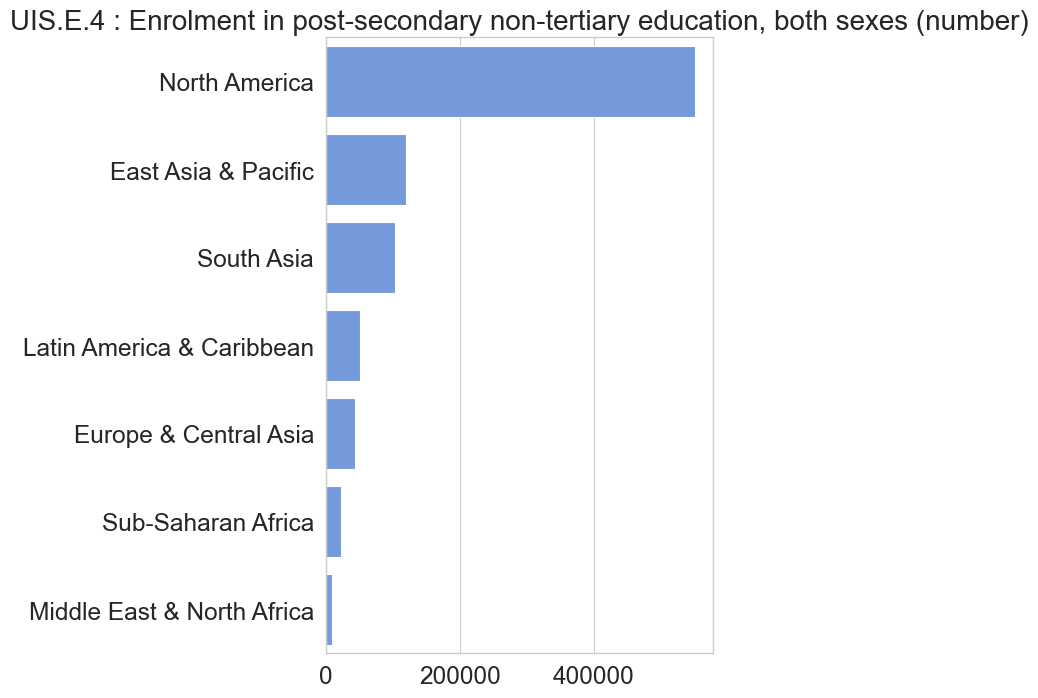

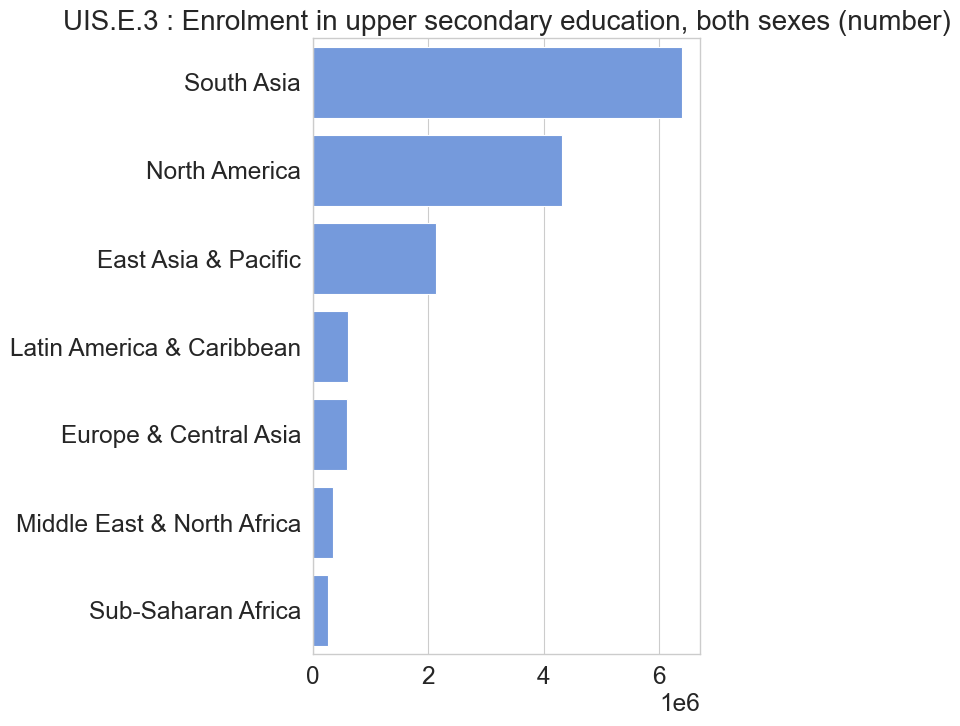

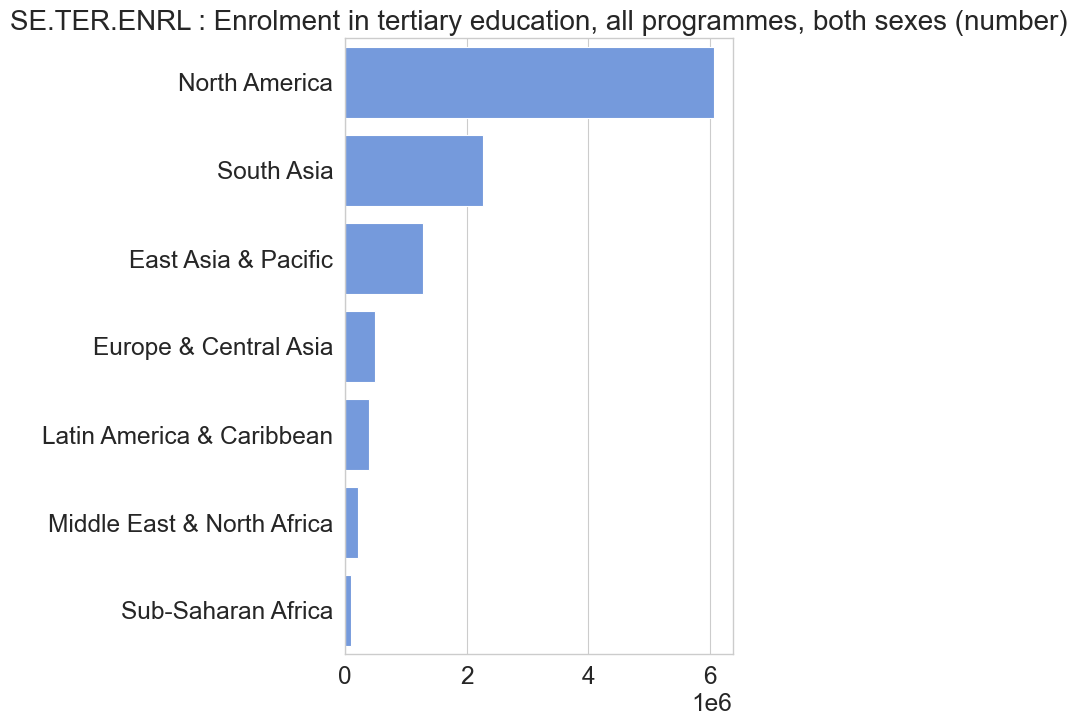



UIS.X.USCONST.3.FSGOV  : Aucune donnée à afficher.


<Figure size 500x800 with 0 Axes>

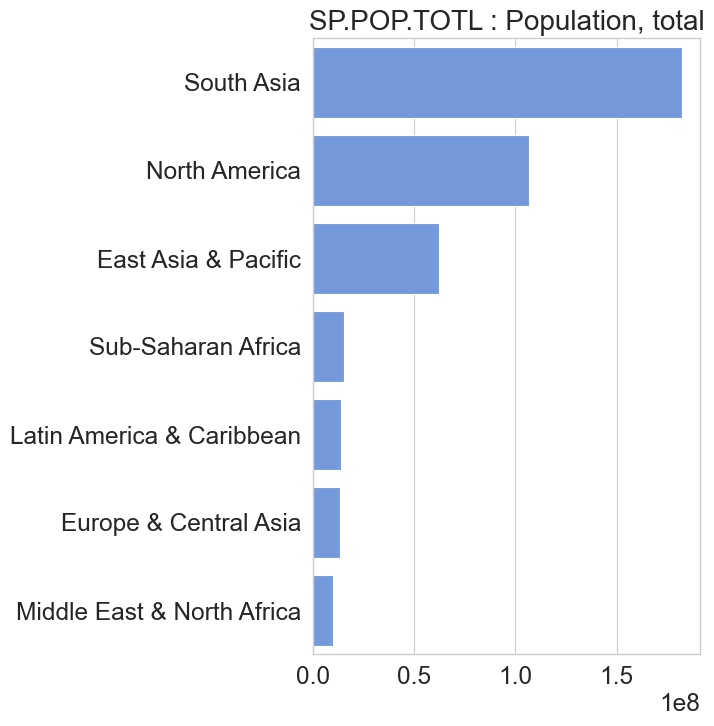

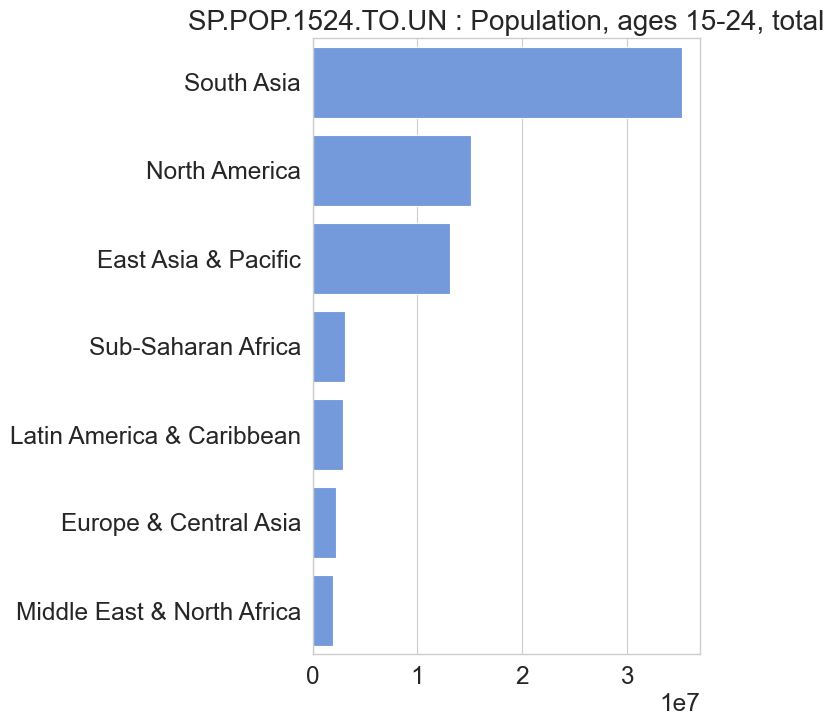

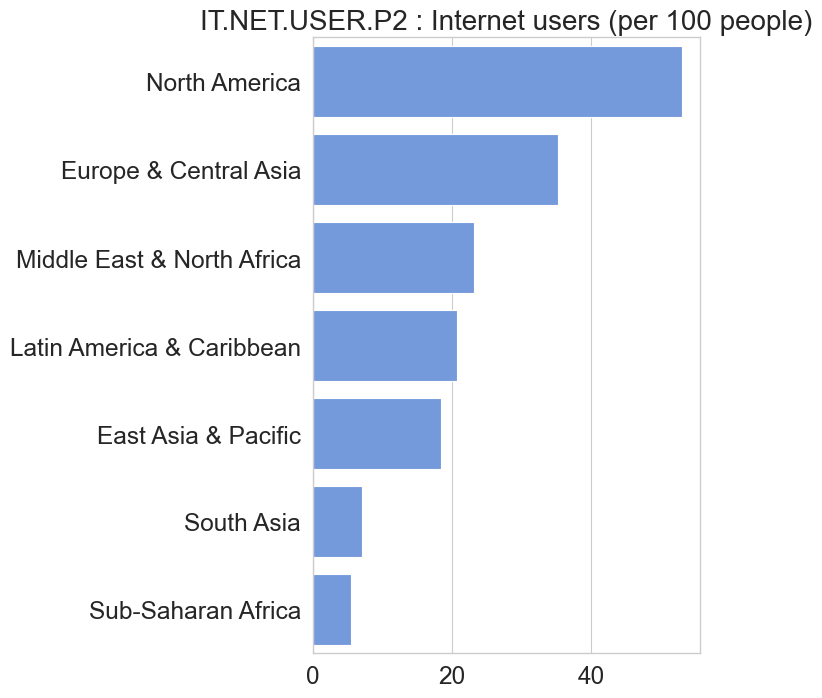

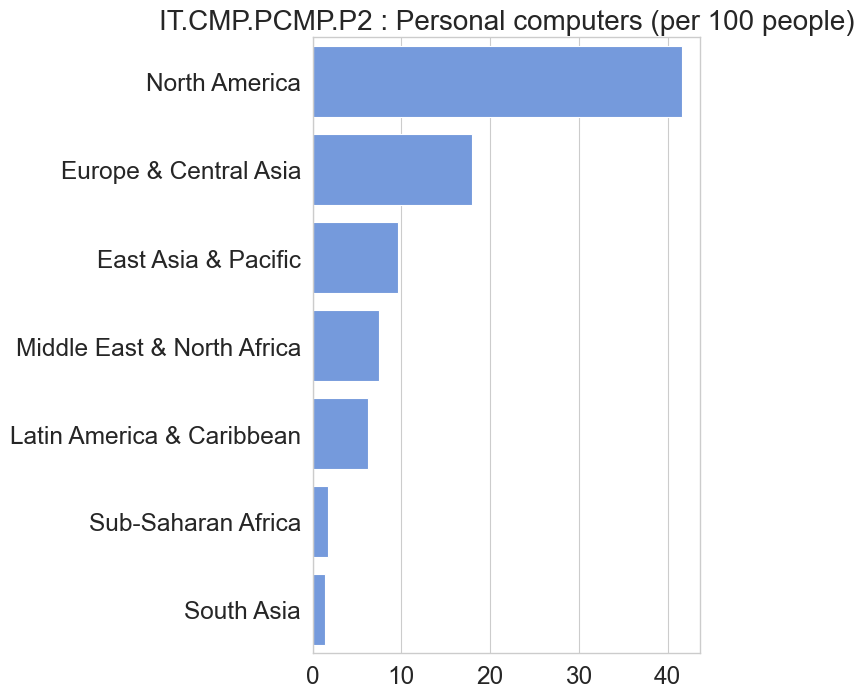

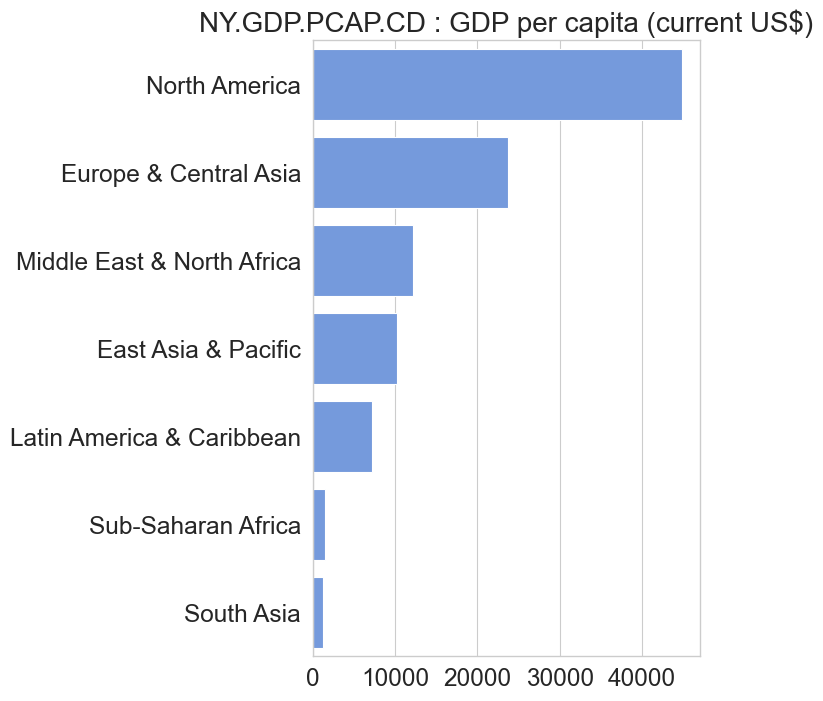

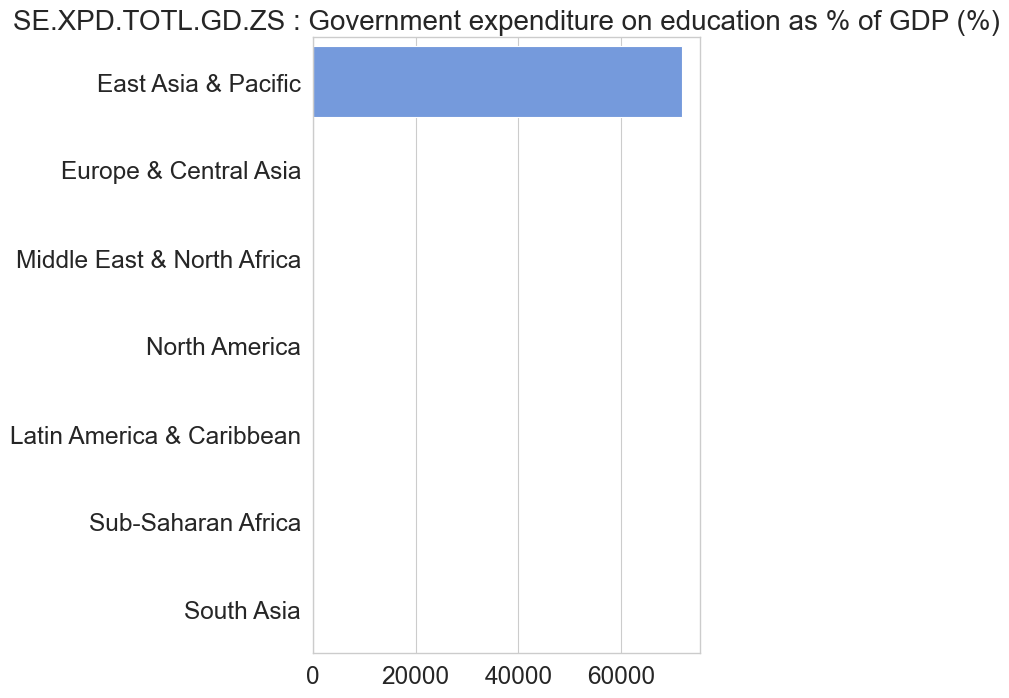

In [339]:
for indicateur in indicateurs:   # Boucle sur chaque indicateur dans la liste "indicateurs"
    plt.figure(figsize = (5,8))   # Crée une nouvelle figure pour le graphique avec une taille de (5,8)
    sns.set_context("paper", font_scale=2)   # Paramètre le contexte seaborn pour l'affichage du graphique
    if data_indicateur[data_indicateur['Indicator Code'].isin([indicateur])].count().sum() > 0 :  # Vérifie si des données existent pour l'indicateur courant
        chaine = indicateur + ' : ' + data_indicateur[data_indicateur['Indicator Code'] == indicateur]['Indicator Name'].unique()[0]  # Crée une chaîne de caractères pour le titre du graphique
        plt.title(chaine, size=20)   # Ajoute le titre au graphique avec une taille de police de 20
        description_countries.sort_values(by=(indicateur, 'mean'), ascending=False, inplace=True)  # Trie le dataframe "description_countries" en fonction de la moyenne de l'indicateur courant
        ax = plt.gca()   # Récupère l'axe du graphique courant
        sns.barplot(x = description_countries[(indicateur, 'mean')], y=description_countries['Region'], color='cornflowerblue')   # Crée le graphique à barres avec les moyennes pour chaque région
        ax.set_ylabel('')   # Supprime l'étiquette de l'axe des y
        ax.set_xlabel('')   # Supprime l'étiquette de l'axe des x
        plt.show()   # Affiche le graphique
        print('\n')   # Affiche une ligne vide après le graphique
    else:
        print(indicateur, ' : Aucune donnée à afficher.')   # Affiche un message indiquant qu'il n'y a pas de données pour l'indicateur courant. 


#### Analyse du PIB

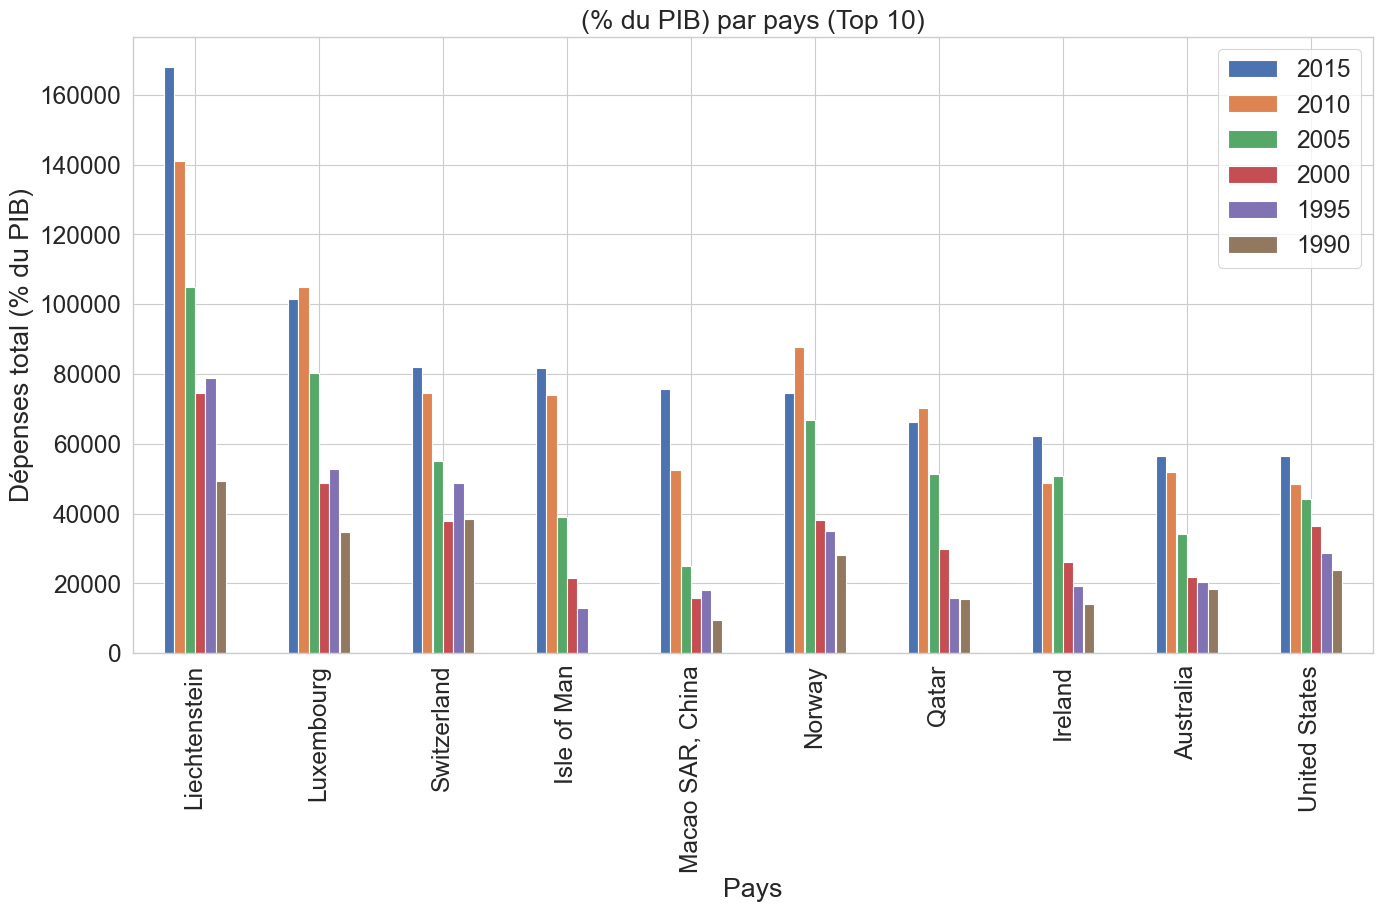

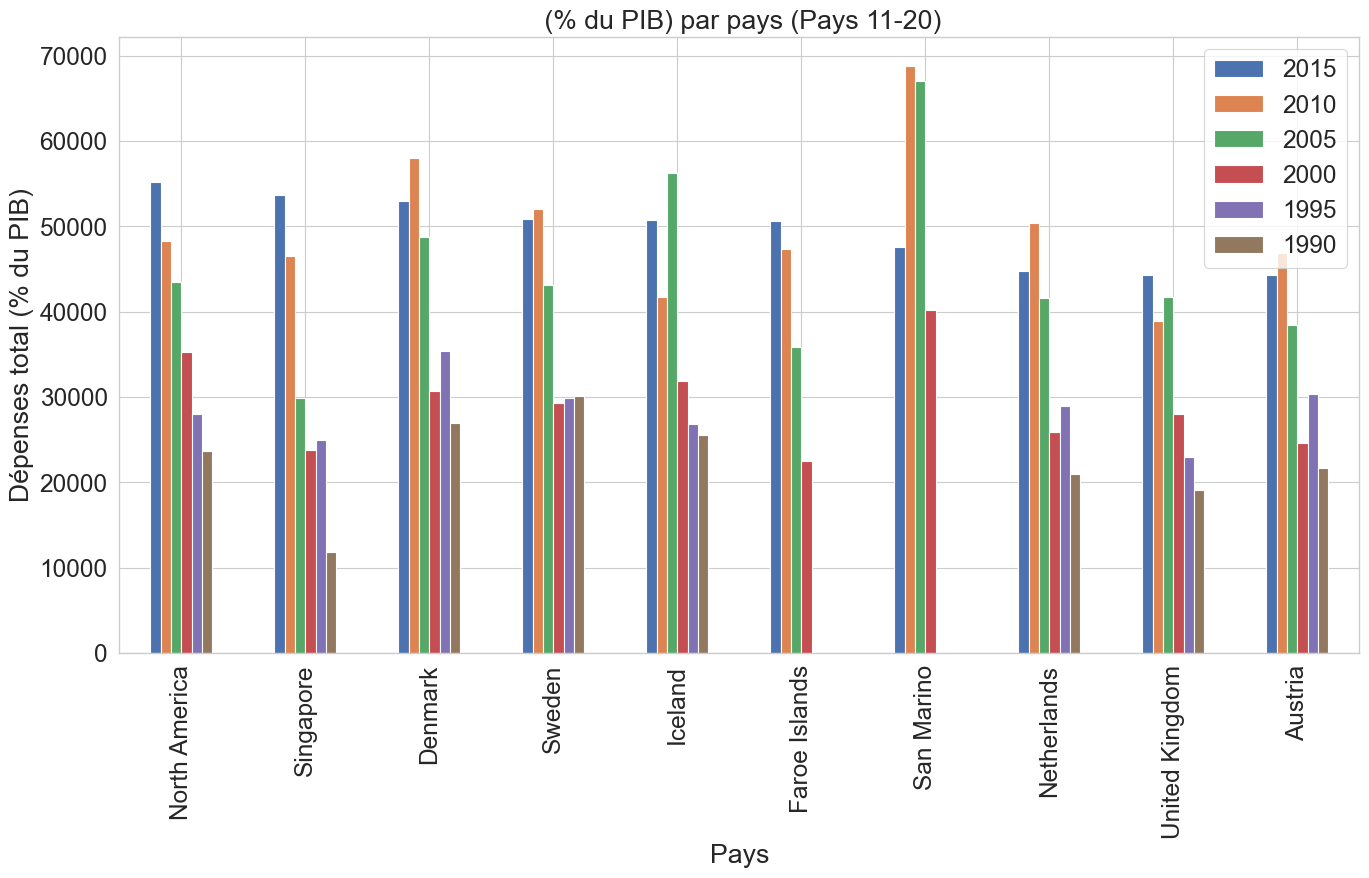

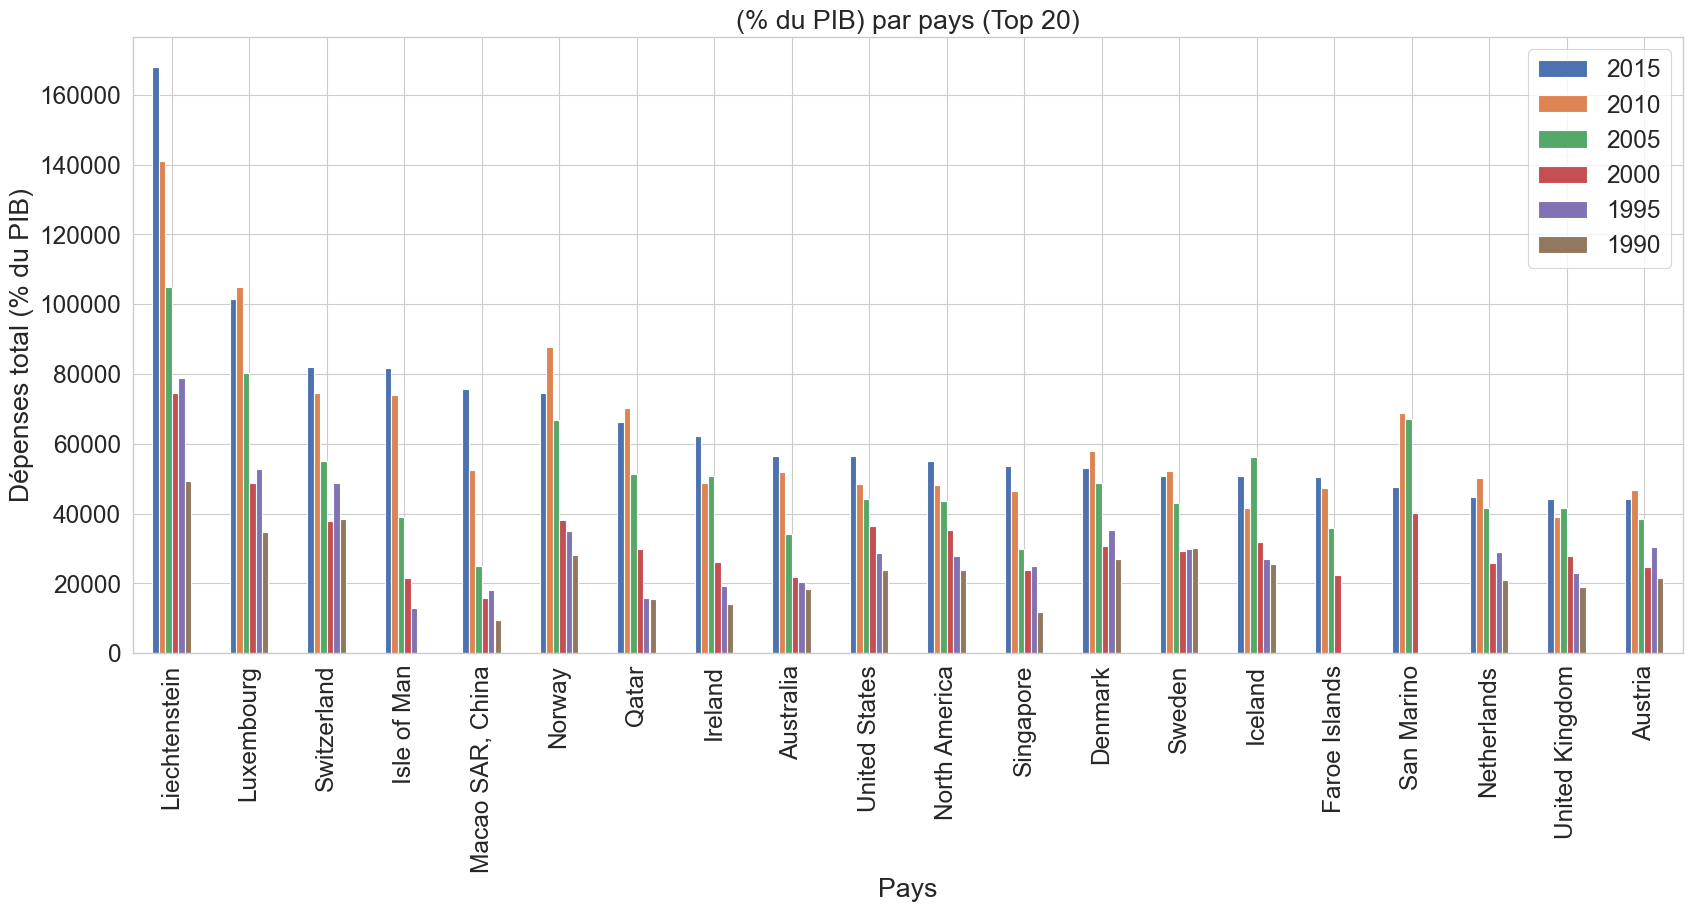

In [340]:
import pandas as pd
import matplotlib.pyplot as plt

# Importer les données de la Banque mondiale
df = pd.read_csv("EdStatsData.csv")

# Sélectionner les données pertinentes pour l'analyse "NY.GDP.PCAP.CD" = PIB par habitant
# niveau de richesse d'un pays (NY.GDP.PCAP.CD)
df_edu = df.loc[df["Indicator Code"] == "NY.GDP.PCAP.CD", ["Country Name", "Country Code", "1990", "1995", "2000", "2005", "2010", "2015"]]

# Pivoter les données pour les mettre en forme pour le graphique par pays
df_pivot_pays = pd.pivot_table(df_edu, values=["1990", "1995", "2000", "2005", "2010", "2015"], index=["Country Code", "Country Name"])
df_pivot_pays = df_pivot_pays.reset_index()

# Trier les pays par ordre décroissant de dépenses d'éducation par rapport au PIB et sélectionner les 10 premiers
df_top_10 = df_pivot_pays.sort_values(by="2015", ascending=False).head(10)

# Créer un graphique à barres pour les dépenses d'éducation par rapport au PIB pour les 10 premiers pays
df_top_10.plot(kind="bar", x="Country Name", y=["2015", "2010", "2005", "2000", "1995", "1990"], figsize=(16,8))
plt.title("(% du PIB) par pays (Top 10)")
plt.xlabel("Pays")
plt.ylabel("Dépenses total (% du PIB)")
plt.show()

# Sélectionner les 10 pays suivants
df_next_10 = df_pivot_pays.sort_values(by="2015", ascending=False).iloc[10:20]

# Créer un graphique à barres pour les dépenses d'éducation par rapport au PIB pour les 10 pays suivants
df_next_10.plot(kind="bar", x="Country Name", y=["2015", "2010", "2005", "2000", "1995", "1990"], figsize=(16,8))
plt.title(" (% du PIB) par pays (Pays 11-20)")
plt.xlabel("Pays")
plt.ylabel("Dépenses total (% du PIB)")
plt.show()

# Trier les pays par ordre décroissant de dépenses d'éducation par rapport au PIB et sélectionner les 20 premiers
df_top_20 = df_pivot_pays.sort_values(by="2015", ascending=False).head(20)

# Créer un graphique à barres pour les dépenses d'éducation par rapport au PIB pour les 10 premiers pays
df_top_20.plot(kind="bar", x="Country Name", y=["2015", "2010", "2005", "2000", "1995", "1990"], figsize=(20,8))
plt.title("(% du PIB) par pays (Top 20)")
plt.xlabel("Pays")
plt.ylabel("Dépenses total (% du PIB)")
plt.show()

#### La part du PIB que ce pays consacre aux dépenses d'éducation 

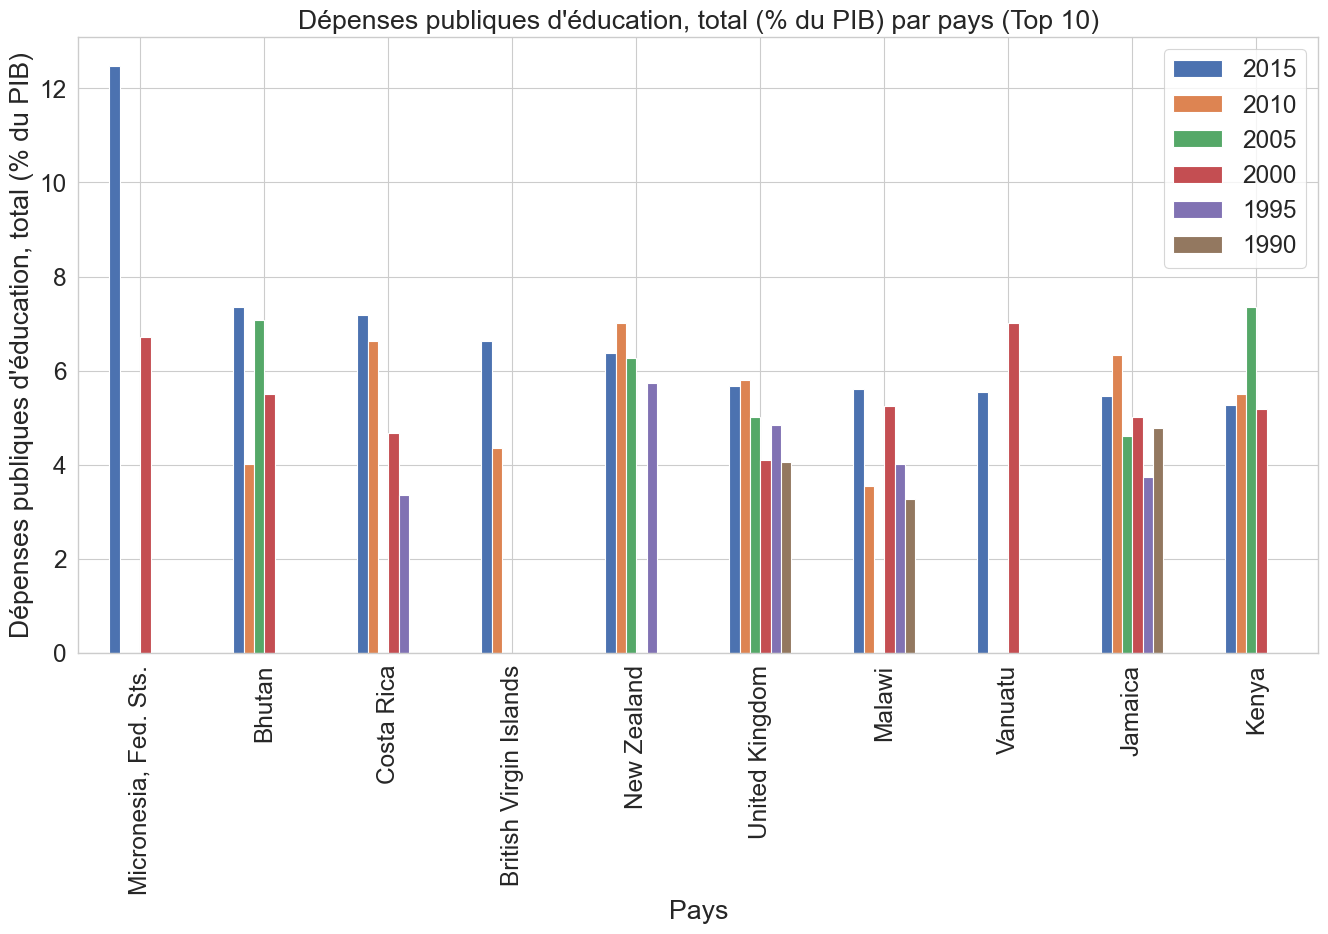

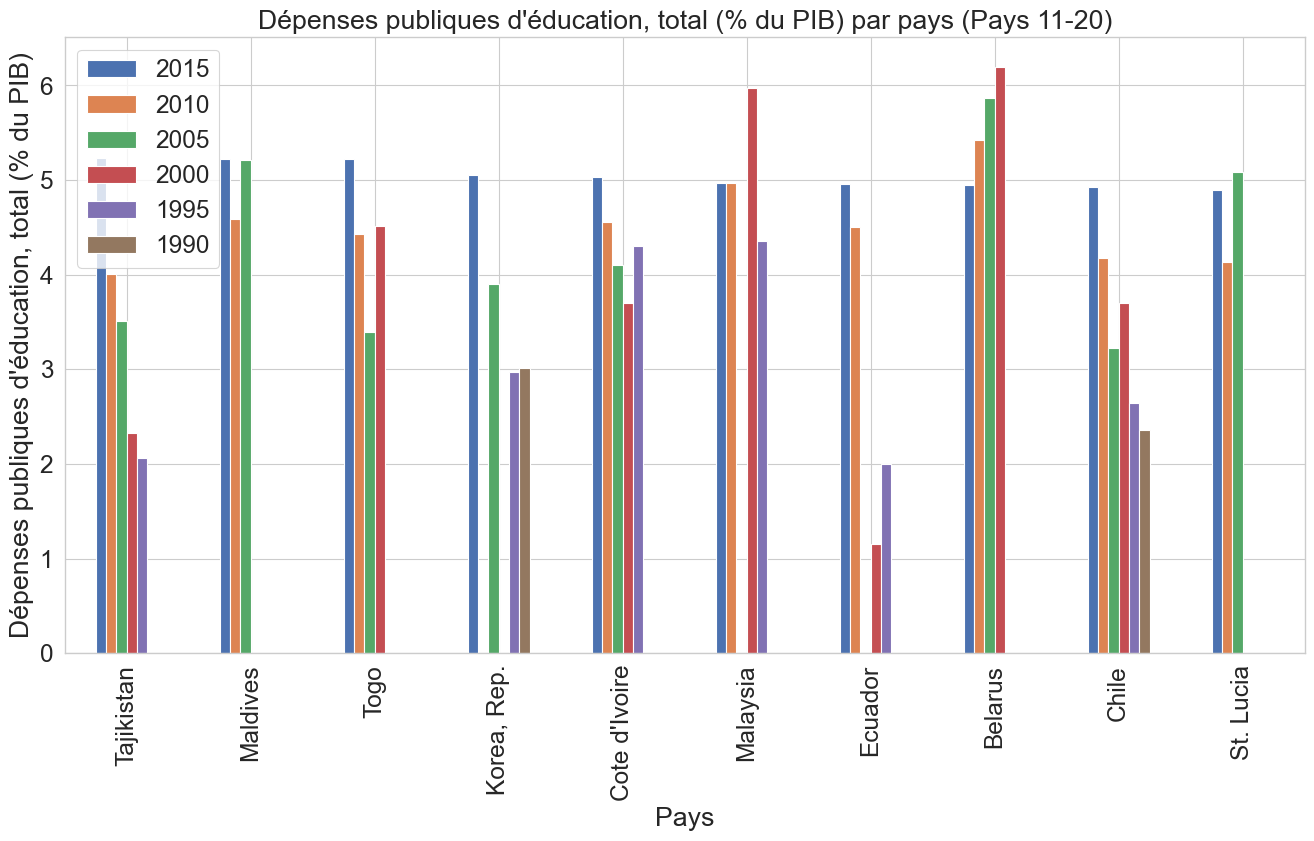

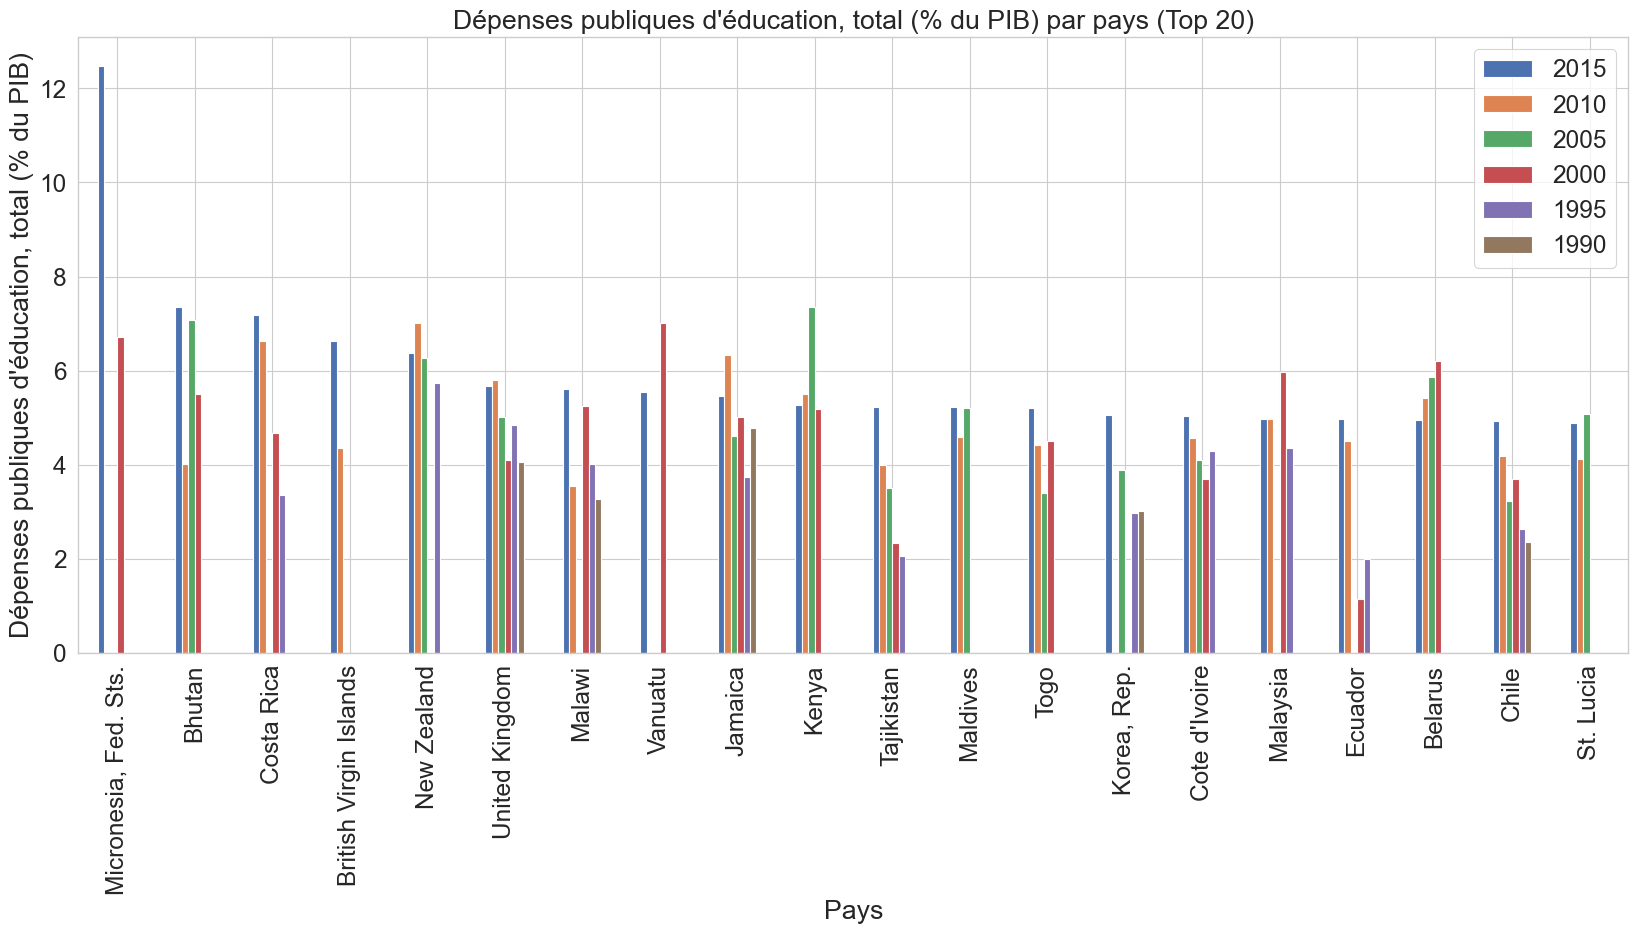

In [342]:

import pandas as pd
import matplotlib.pyplot as plt

# Importer les données de la Banque mondiale
df = pd.read_csv("EdStatsData.csv")

# Sélectionner les données pertinentes pour l'analyse
# la part du PIB que ce pays consacre aux dépenses d'éducation (SE.XPD.TOTL.GD.ZS
df_edu = df.loc[df["Indicator Code"] == "SE.XPD.TOTL.GD.ZS", ["Country Name", "Country Code", "1990", "1995", "2000", "2005", "2010", "2015"]]

# Pivoter les données pour les mettre en forme pour le graphique par pays
df_pivot_pays = pd.pivot_table(df_edu, values=["1990", "1995", "2000", "2005", "2010", "2015"], index=["Country Code", "Country Name"])
df_pivot_pays = df_pivot_pays.reset_index()

# Trier les pays par ordre décroissant de dépenses d'éducation par rapport au PIB et sélectionner les 10 premiers
df_top_10 = df_pivot_pays.sort_values(by="2015", ascending=False).head(10)

# Créer un graphique à barres pour les dépenses d'éducation par rapport au PIB pour les 10 premiers pays
df_top_10.plot(kind="bar", x="Country Name", y=["2015", "2010", "2005", "2000", "1995", "1990"], figsize=(16,8))
plt.title("Dépenses publiques d'éducation, total (% du PIB) par pays (Top 10)")
plt.xlabel("Pays")
plt.ylabel("Dépenses publiques d'éducation, total (% du PIB)")
plt.show()

# Sélectionner les 10 pays suivants
df_next_10 = df_pivot_pays.sort_values(by="2015", ascending=False).iloc[10:20]

# Créer un graphique à barres pour les dépenses d'éducation par rapport au PIB pour les 10 pays suivants
df_next_10.plot(kind="bar", x="Country Name", y=["2015", "2010", "2005", "2000", "1995", "1990"], figsize=(16,8))
plt.title("Dépenses publiques d'éducation, total (% du PIB) par pays (Pays 11-20)")
plt.xlabel("Pays")
plt.ylabel("Dépenses publiques d'éducation, total (% du PIB)")
plt.show()

# Trier les pays par ordre décroissant de dépenses d'éducation par rapport au PIB et sélectionner les 20 premiers
df_top_20 = df_pivot_pays.sort_values(by="2015", ascending=False).head(20)

# Créer un graphique à barres pour les dépenses d'éducation par rapport au PIB pour les 10 premiers pays
df_top_20.plot(kind="bar", x="Country Name", y=["2015", "2010", "2005", "2000", "1995", "1990"], figsize=(20,8))
plt.title("Dépenses publiques d'éducation, total (% du PIB) par pays (Top 20)")
plt.xlabel("Pays")
plt.ylabel("Dépenses publiques d'éducation, total (% du PIB)")
plt.show()

In [136]:
data_countries.head()

Country Name Country Code  \
92796  Afghanistan          AFG   
92829  Afghanistan          AFG   
92839  Afghanistan          AFG   
93000  Afghanistan          AFG   
93709  Afghanistan          AFG   

                                          Indicator Name  Indicator Code  \
92796  Enrolment in post-secondary non-tertiary educa...         UIS.E.4   
92829  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
92839  Enrolment in upper secondary education, both s...         UIS.E.3   
93000                    Internet users (per 100 people)  IT.NET.USER.P2   
93709                Personal computers (per 100 people)  IT.CMP.PCMP.P2   

           1990a2015      Region  
92796   70135.125000  South Asia  
92829   88959.166667  South Asia  
92839  471524.923077  South Asia  
93000       3.354972  South Asia  
93709       0.366026  South Asia

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


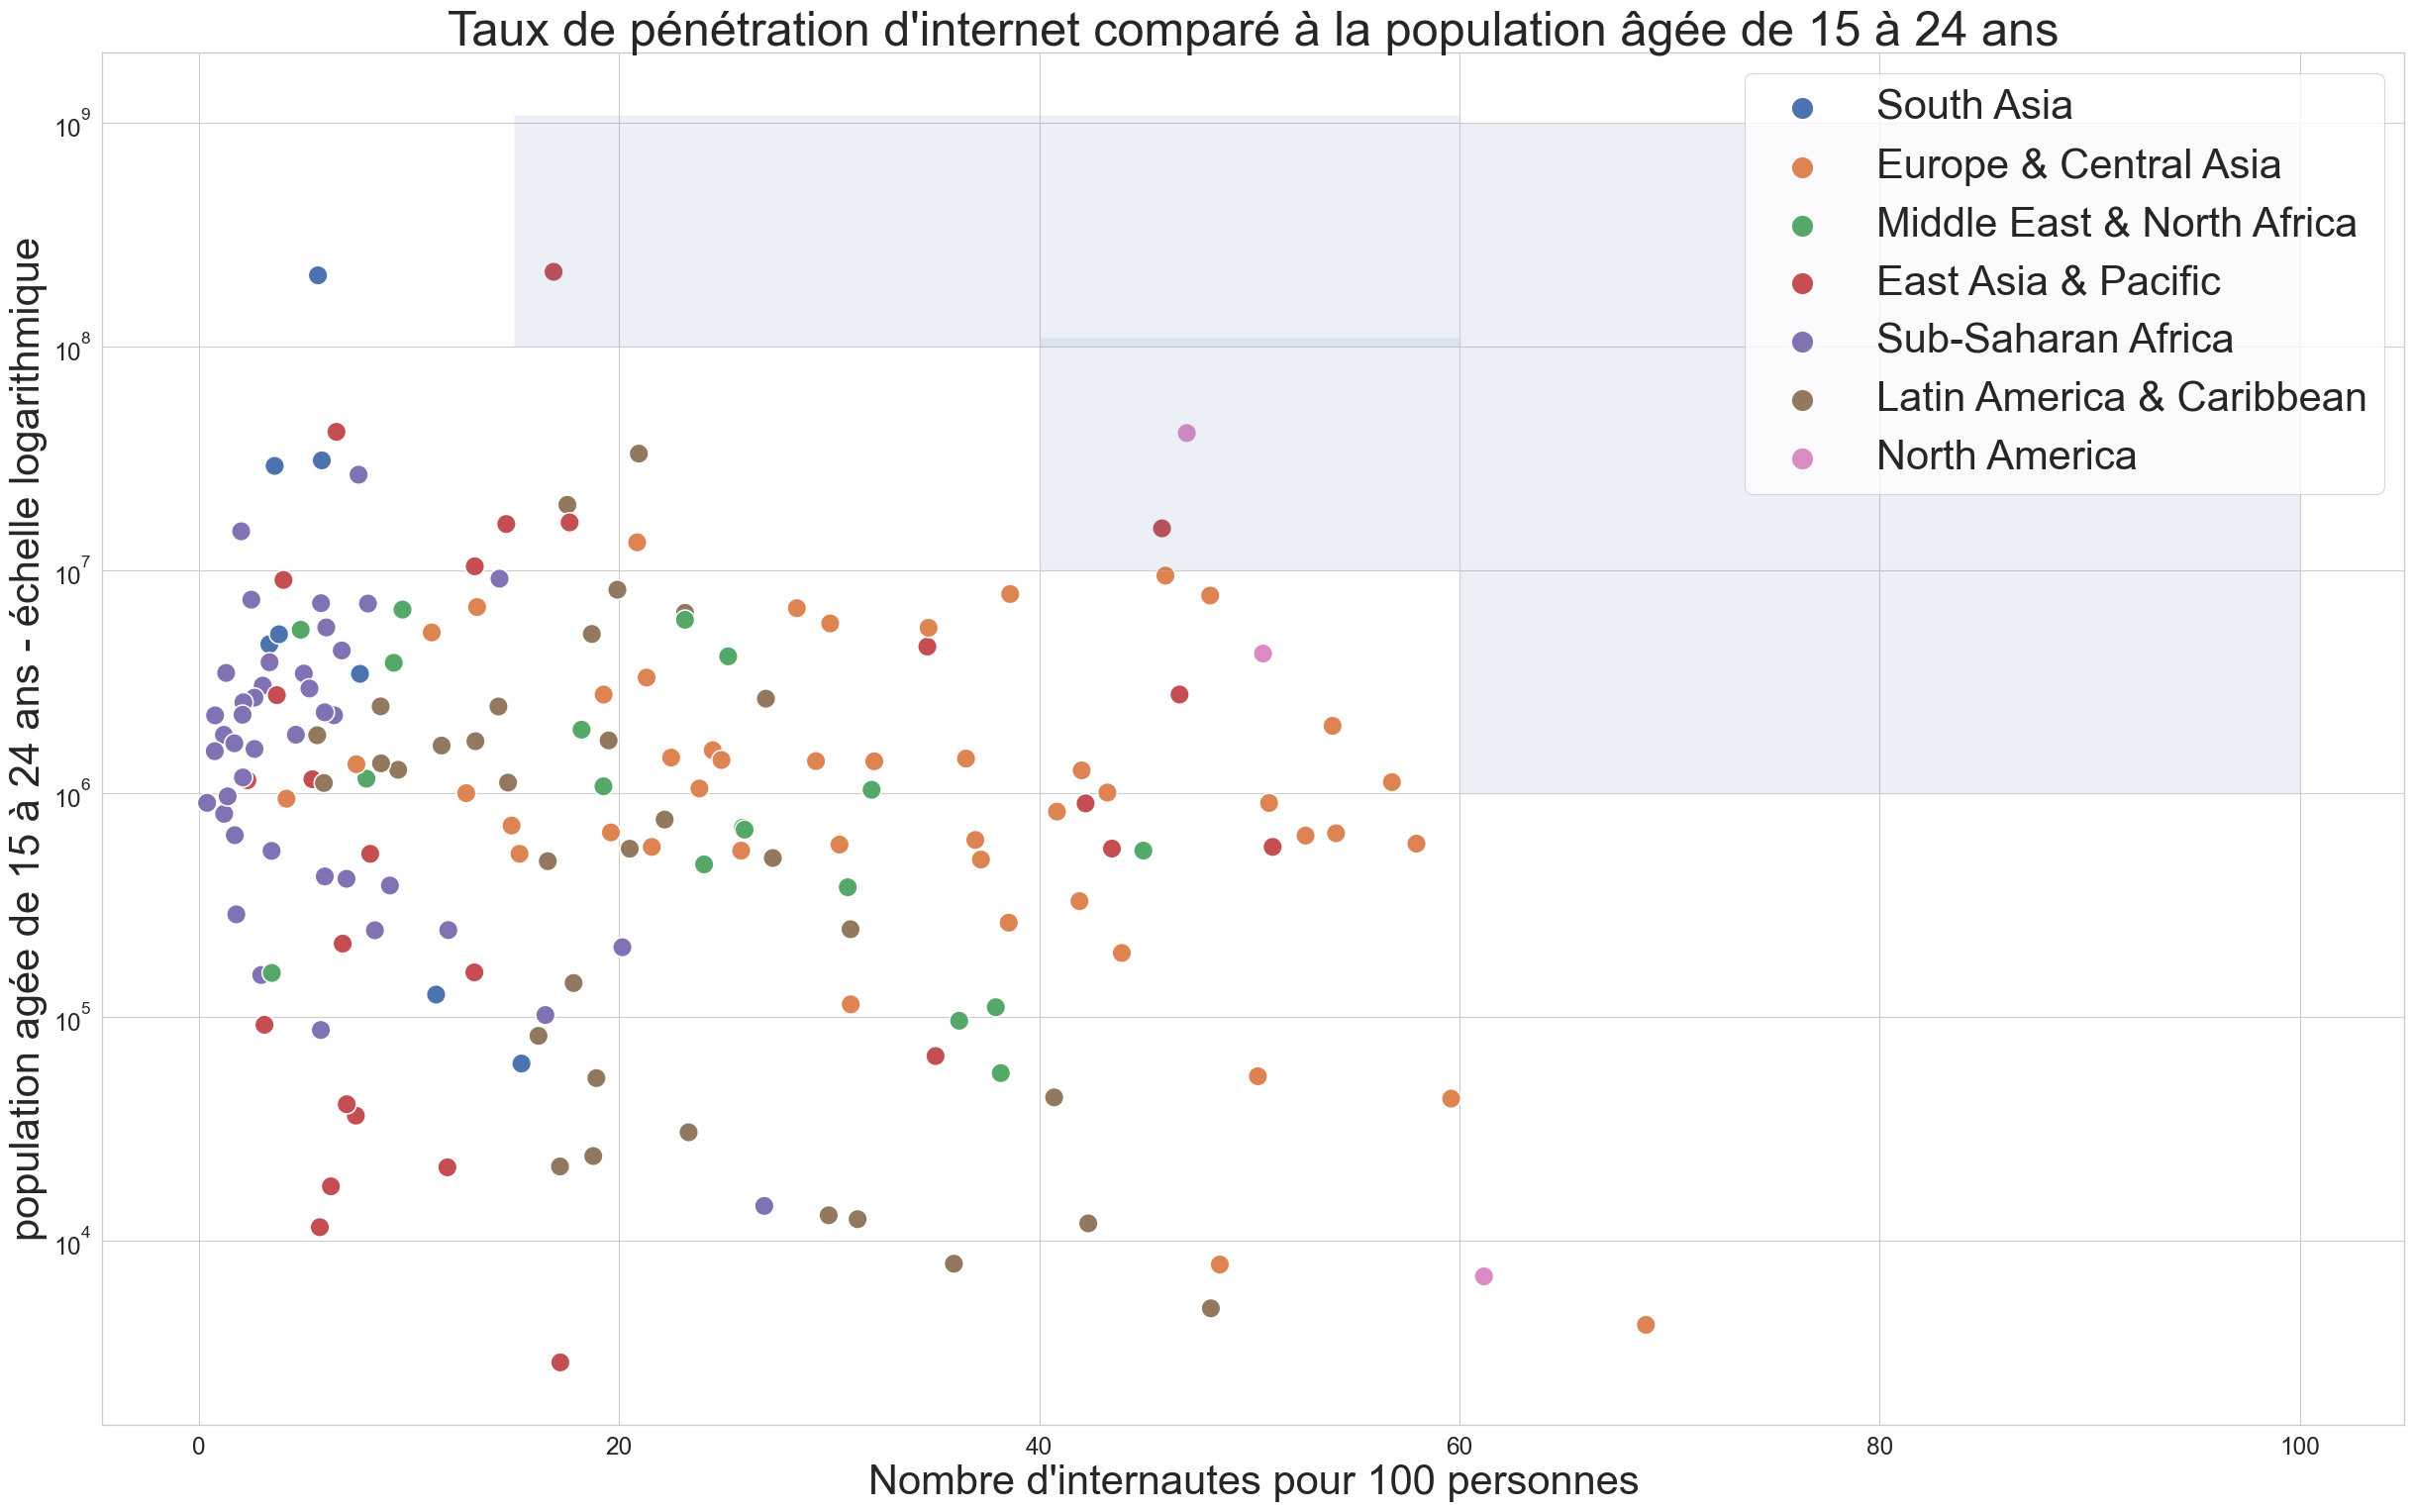

In [172]:
# Importer la bibliothèque matplotlib.patches pour dessiner des formes géométriques sur le graphique
import matplotlib.patches as patches
  
# Définir la taille de la figure en pouces
plt.figure(figsize = (30,18))

# Obtenir les axes du graphique courant
ax = plt.gca()

# Modifier le contexte pour la taille du papier et l'échelle de la police pour améliorer la lisibilité
sns.set_context("paper", font_scale=2)

# Dessiner un graphique de dispersion avec la variable IT.NET.USER.P2 en abscisse et SP.POP.1524.TO.UN en ordonnée
# en utilisant la colonne Region pour colorer les points et en définissant la taille des points à 200
sns.scatterplot(df_countries['IT.NET.USER.P2'], df_countries['SP.POP.1524.TO.UN'], hue=df_countries['Region'], s=200)

# Définir le label de l'axe x
plt.xlabel('Nombre d\'internautes pour 100 personnes',  fontsize=30)

# Ajouter un rectangle semi-transparent sur le graphique avec des dimensions et une position spécifiques
# alpha = 0.1 pour la transparence
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

# Ajouter une légende sur le graphique, en utilisant le paramètre loc pour spécifier la position et markerscale pour régler la taille des marqueurs
#plt.legend(loc='lower left',markerscale=3)

# Modifier l'échelle de l'axe y pour l'afficher en échelle logarithmique
ax.set_yscale('log')

# Définir le label de l'axe y en spécifiant qu'il est en échelle logarithmique
plt.ylabel('population agée de 15 à 24 ans - échelle logarithmique', fontsize=30)

# Définir le titre du graphique
plt.title('Taux de pénétration d\'internet comparé à la population âgée de 15 à 24 ans', size=35)
# Ajouter une légende sur le graphique, en utilisant le paramètre loc pour spécifier la position et markerscale pour régler la taille des marqueurs
plt.legend(loc='upper right', markerscale=3,  fontsize=30)
# Afficher le graphique
plt.show()


On imagine que les pays en bleu pourraient former un bon vivier de clients potentiels : 
* population jeune importante à très importante avec internet moyennement développé
* population jeune relativement importe conjuguée à un nombre d'internautes élevé

Il faut maintenant en avoir la confirmation en déterminant le nombre de clients potentiels

In [173]:
#print (df_countries)
#df_countries.loc[df_countries['Country Name'] == 'India']

df_countries[((df_countries['IT.NET.USER.P2'] > 5) & (df_countries['SP.POP.1524.TO.UN'] > 10000000))|((df_countries['IT.NET.USER.P2'] > 60) & (df_countries['SP.POP.1524.TO.UN'] > 1000000))].sort_values(by='SP.POP.1524.TO.UN',ascending = False)[['Country Name']]

Country Name
38           China
78           India
79       Indonesia
189  United States
25          Brazil
133       Pakistan
129        Nigeria
113         Mexico
193        Vietnam
139    Philippines
86           Japan
181         Turkey
175       Thailand

**Première analyse graphique avec les barplots**

* très important nombre de lycéens et d'étudiants dans le supérieur en East Asia & Pacific 
* taux de pénétration d'internet le plus élevé en amérique du nord, europe et asie centrale, moyen en east asia & pacific

Pour la suite, analysons pour connaître :
* le nombre de lycéens et étudiants par pays:
* une estimation du nombre de lycéens avec internet par pays
* l\'évolution du taux de pénétration d'internet par pays

#### Quels sont les pays avec un fort potentiel de clients pour nos services ?

In [420]:
#on va créer un indicateur lycée + supérieur:

df_countries['customers'] = df_countries['UIS.E.3'] + df_countries['UIS.E.4'] + df_countries['SE.TER.ENRL'] 
print('liste des pays avec le plus de lycéens et étudiants')
df_countries.sort_values(by='customers', ascending=False)[['Country Name', 'customers']].head(20)

liste des pays avec le plus de lycéens et étudiants


Country Name     customers
78            India  5.615726e+07
38            China  5.472227e+07
189   United States  2.859900e+07
25           Brazil  1.453701e+07
86            Japan  7.804875e+06
14       Bangladesh  5.764710e+06
62          Germany  5.673126e+06
188  United Kingdom  5.249102e+06
133        Pakistan  4.747093e+06
58           France  4.745639e+06
84            Italy  4.616080e+06
139     Philippines  4.287758e+06
175        Thailand  3.939597e+06
32           Canada  3.632269e+06
140          Poland  3.568841e+06
159    South Africa  3.532727e+06
186         Ukraine  3.487612e+06
161           Spain  3.067799e+06
39         Colombia  2.393639e+06
10        Australia  2.312654e+06

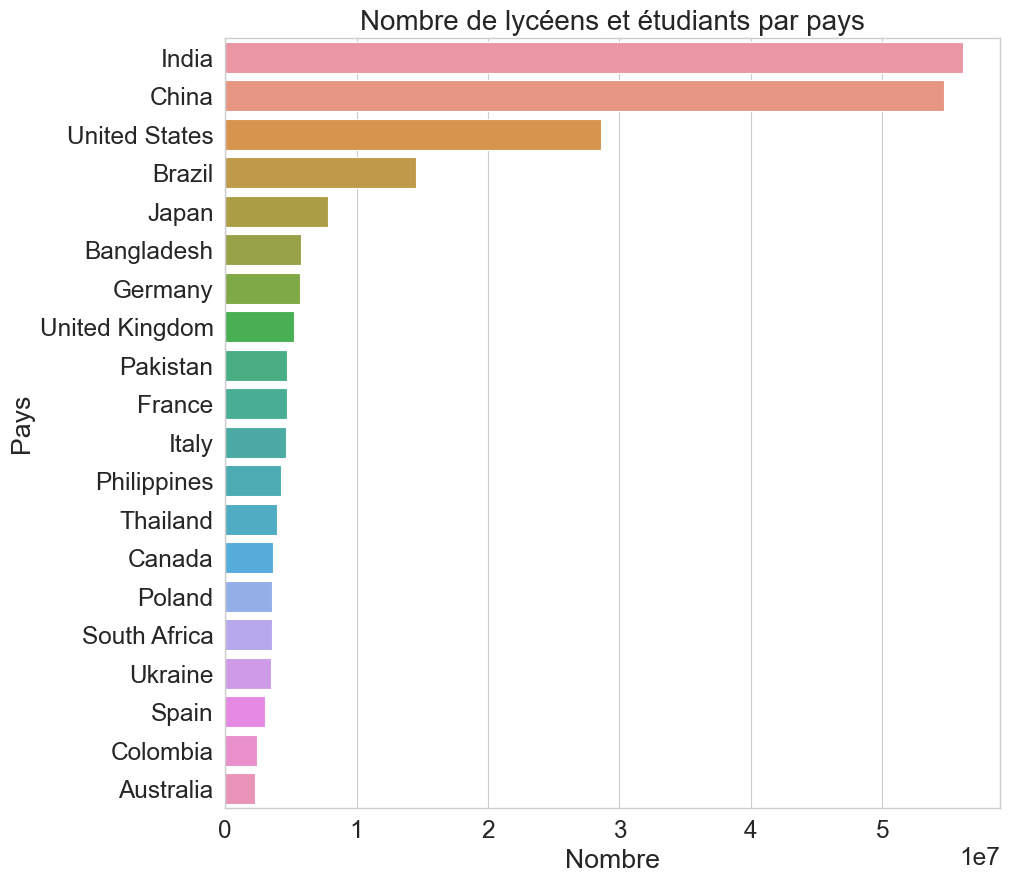

In [421]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = df_countries.sort_values(by='customers', ascending=False)['customers'].head(20), y=df_countries.sort_values(by='customers', ascending=False)['Country Name'].head(20))
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Nombre')
plt.ylabel('Pays')
plt.show()

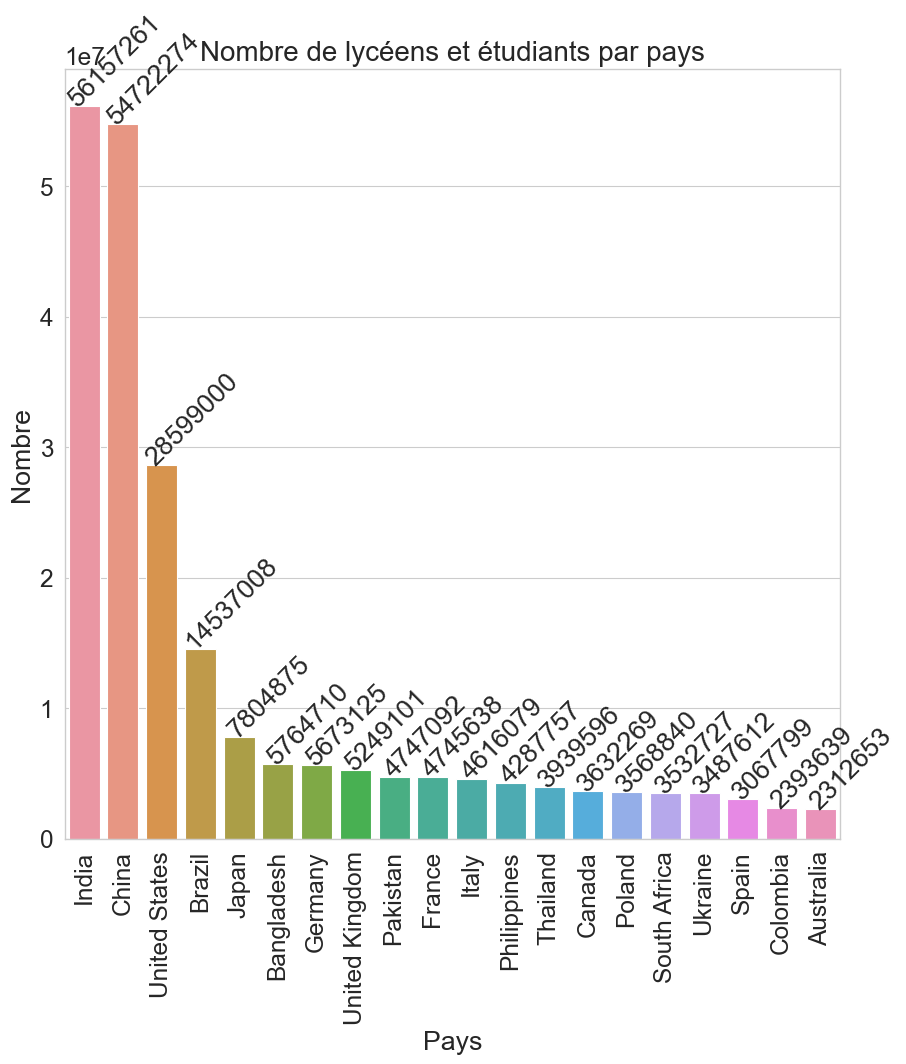

In [422]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(y = df_countries.sort_values(by='customers', ascending=False)['customers'].head(20), x=df_countries.sort_values(by='customers', ascending=False)['Country Name'].head(20))
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Pays')
plt.ylabel('Nombre')

# Ajouter les totaux au-dessus de chaque colonne
totals = df_countries.sort_values(by='customers', ascending=False)['customers'].head(20)
for i, total in enumerate(totals):
    plt.text(i + .8, total + 100, int(total), ha='center', rotation=45)

# Rotation des noms de pays
plt.xticks(rotation=90)

plt.show()


In [423]:
#on va multiplier ce nombre avec le taux de pénétration d'internet pour avoir une estimation du nombre de clients potentiels:
df_countries['potential_customers'] = df_countries['customers'] * df_countries['IT.NET.USER.P2']/100

On peut avoir une estimation du nombre de clients potentiels en multipliant le nombre d'étudiants et lycéens par la part d'utilisation d'internet

In [424]:
df_countries.sort_values(by='potential_customers', ascending=False)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].head(20)

Country Name  IT.NET.USER.P2     customers  potential_customers
189   United States       47.021176  2.859900e+07         1.344759e+07
38            China       16.883452  5.472227e+07         9.239009e+06
86            Japan       45.840425  7.804875e+06         3.577788e+06
78            India        5.668691  5.615726e+07         3.183381e+06
25           Brazil       20.940767  1.453701e+07         3.044161e+06
62          Germany       46.003307  5.673126e+06         2.609825e+06
188  United Kingdom       48.133684  5.249102e+06         2.526586e+06
32           Canada       50.649253  3.632269e+06         1.839717e+06
58           France       38.614994  4.745639e+06         1.832528e+06
84            Italy       28.461316  4.616080e+06         1.313797e+06
10        Australia       46.675617  2.312654e+06         1.079445e+06
140          Poland       30.048316  3.568841e+06         1.072377e+06
161           Spain       34.730581  3.067799e+06         1.065465e+06
124     Netherlands       53.957905  1.242629e+06         6.704966e+05
106        Malaysia       34.672053  1.826618e+06         6.333258e+05
139     Philippines       14.631854  4.287758e+06         6.273784e+05
175        Thailand       13.132280  3.939597e+06         5.173589e+05
159    South Africa       14.311277  3.532727e+06         5.055784e+05
39         Colombia       19.919183  2.393639e+06         4.767934e+05
170          Sweden       56.783539  8.174539e+05         4.641793e+05

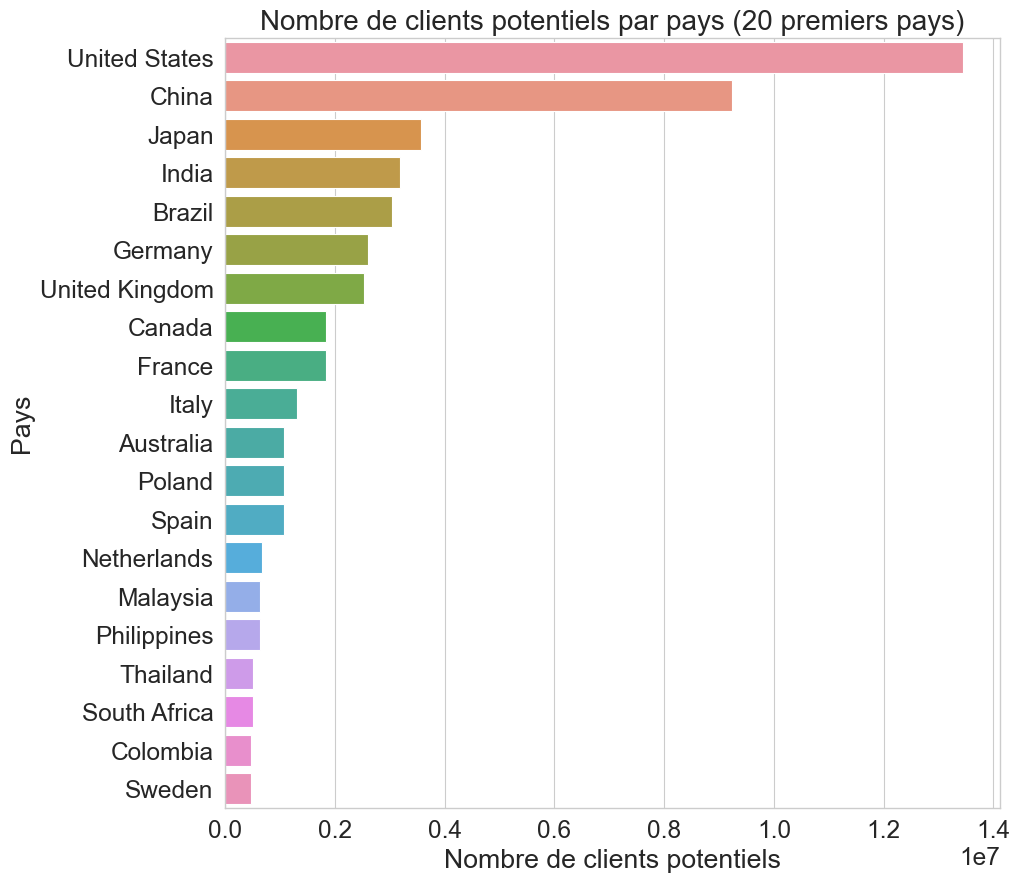

In [425]:
clients_potentiels = df_countries.sort_values(by='potential_customers', na_position='first', ascending=True)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].tail(20).sort_values(by='potential_customers',ascending=False)
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
plt.title('Nombre de clients potentiels par pays (20 premiers pays)', fontsize=20)
ax = plt.gca()
sns.barplot(x = clients_potentiels['potential_customers'], y=clients_potentiels['Country Name'])
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

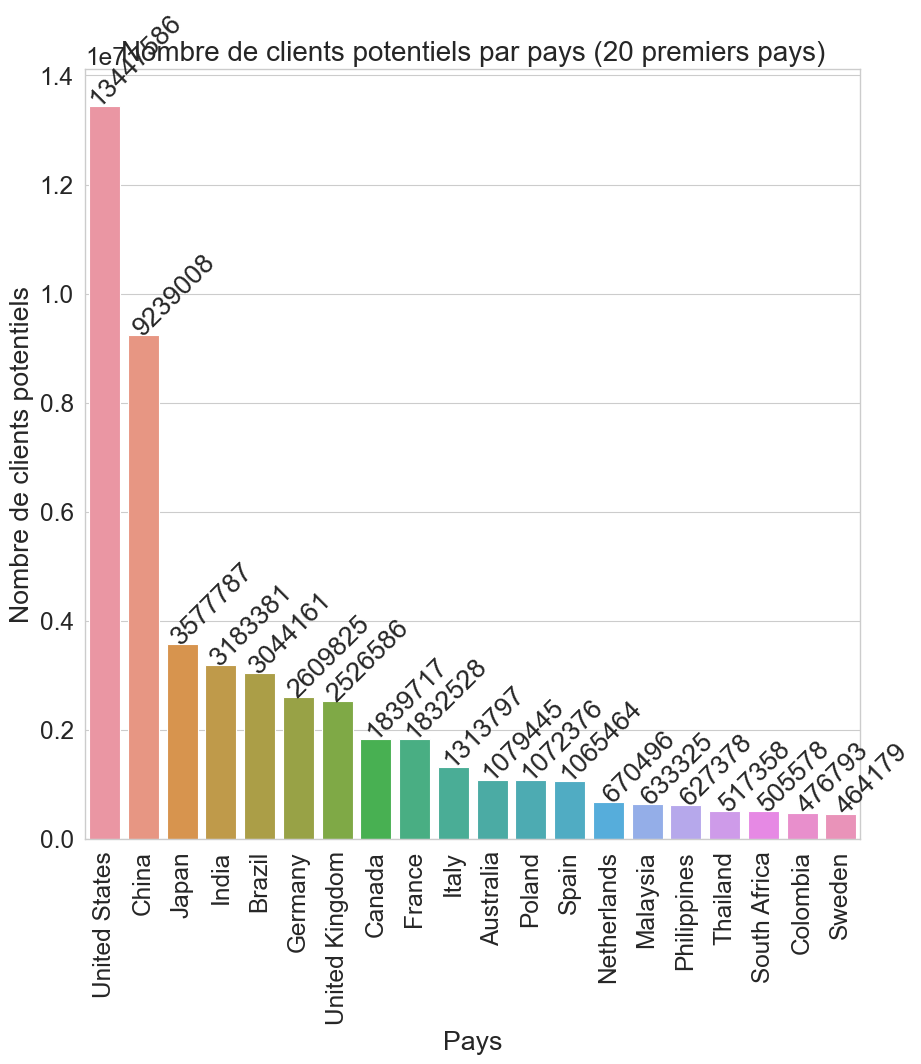

In [426]:
# Sélectionner les 20 pays avec le plus grand nombre de clients potentiels
clients_potentiels = df_countries.sort_values(by='potential_customers', na_position='first', ascending=True)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].tail(20).sort_values(by='potential_customers',ascending=False)

# Créer une nouvelle figure de taille 10x10 pouces et définir l'échelle de police
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

# Définir le titre du graphique
plt.title('Nombre de clients potentiels par pays (20 premiers pays)', fontsize=20)

# Créer un graphique à barres en utilisant les données de clients_potentiels
ax = plt.gca()
sns.barplot(y = clients_potentiels['potential_customers'], x = clients_potentiels['Country Name'])

# Définir les étiquettes des axes horizontal et vertical
plt.ylabel('Nombre de clients potentiels')
plt.xlabel('Pays')

# Ajouter les totaux au-dessus de chaque colonne
totals = df_countries.sort_values(by='potential_customers', ascending=False)['potential_customers'].head(20)
for i, total in enumerate(totals):
    plt.text(i + .8, total + 100, int(total), ha='center', rotation=45)
# Rotation des noms de pays
plt.xticks(rotation=90)
# Afficher le graphique
plt.show()


In [427]:
#on garde les pays potentiels avec plus de 1 million de clients potentiels
selected_countries = clients_potentiels[clients_potentiels['potential_customers'] > 1000000]['Country Name'].tolist()
print(selected_countries)

['United States', 'China', 'Japan', 'India', 'Brazil', 'Germany', 'United Kingdom', 'Canada', 'France', 'Italy', 'Australia', 'Poland', 'Spain']


**Maintenant qu'on a la liste des pays avec le plus de clients potentiels, il faut regarder:** 
* la tendance d'évolution du nombre d'étudiants
* l'évolution de l'implantation d'internet dans le pays

In [445]:
# Importer les données de la Banque mondiale
data_origine = pd.read_csv("EdStatsData.csv")
print(data_origine)

       Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth lite

In [446]:
data_final = data_origine[data_origine['Country Name'].isin(selected_countries) & data_origine['Indicator Code'].isin(['UIS.E.3', 'UIS.E.4', 'SE.TER.ENRL', 'IT.NET.USER.P2'])]

In [447]:
print (data_final)

          Country Name Country Code  \
129446       Australia          AUS   
129479       Australia          AUS   
129489       Australia          AUS   
129650       Australia          AUS   
188086          Brazil          BRA   
188119          Brazil          BRA   
188129          Brazil          BRA   
188290          Brazil          BRA   
221071          Canada          CAN   
221104          Canada          CAN   
221114          Canada          CAN   
221275          Canada          CAN   
243061           China          CHN   
243094           China          CHN   
243104           China          CHN   
243265           China          CHN   
338351          France          FRA   
338384          France          FRA   
338394          France          FRA   
338555          France          FRA   
356676         Germany          DEU   
356709         Germany          DEU   
356719         Germany          DEU   
356880         Germany          DEU   
415316           India   

In [448]:
data_final_melt = data_final.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], var_name = 'Year', value_name = 'Value')

In [449]:
print (data_final_melt)

        Country Name Country Code  \
0          Australia          AUS   
1          Australia          AUS   
2          Australia          AUS   
3          Australia          AUS   
4             Brazil          BRA   
...              ...          ...   
3375  United Kingdom          GBR   
3376   United States          USA   
3377   United States          USA   
3378   United States          USA   
3379   United States          USA   

                                         Indicator Name  Indicator Code  Year  \
0     Enrolment in post-secondary non-tertiary educa...         UIS.E.4  1970   
1     Enrolment in tertiary education, all programme...     SE.TER.ENRL  1970   
2     Enrolment in upper secondary education, both s...         UIS.E.3  1970   
3                       Internet users (per 100 people)  IT.NET.USER.P2  1970   
4     Enrolment in post-secondary non-tertiary educa...         UIS.E.4  1970   
...                                                 ...             .

In [450]:
data_final_melt['Year'] = data_final_melt['Year'].astype('int32')

In [451]:
data_final_melt = data_final_melt[data_final_melt['Year'] > 1990]

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\731545405.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Year'],
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\731545405.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Value'])
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\731545405.py:3: UserWarning: Boolean Series key will be reindexed to match 

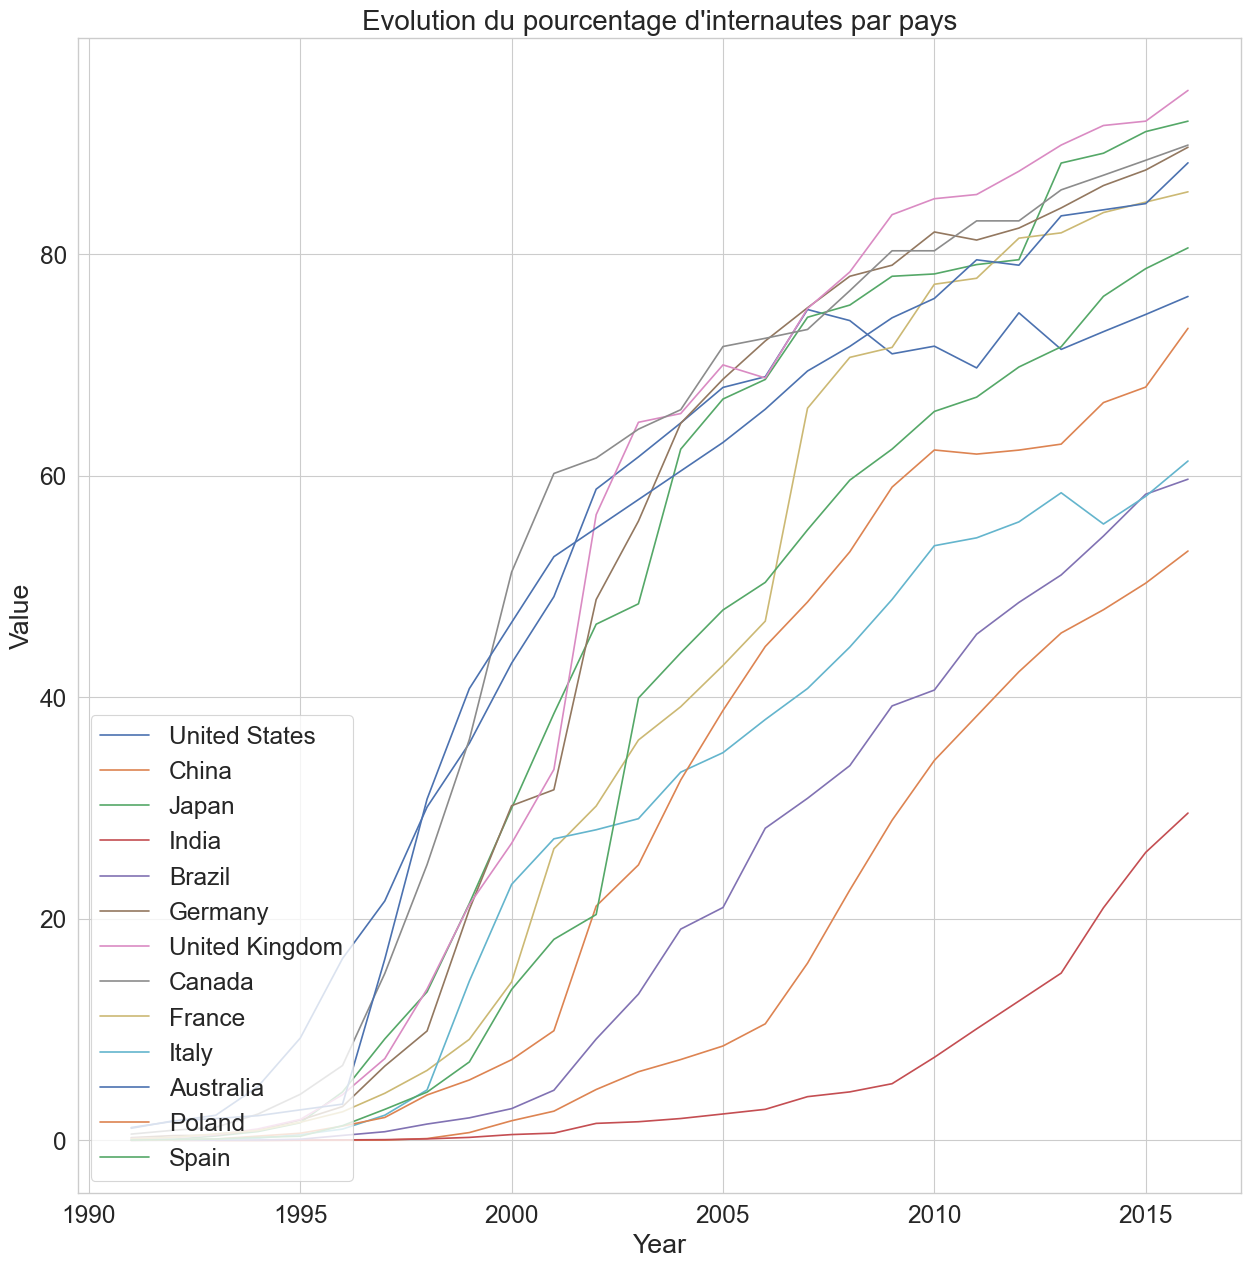

In [452]:
plt.figure(figsize = (15,15))
for country in selected_countries:
    sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries, loc = 'lower left', )
plt.title('Evolution du pourcentage d\'internautes par pays', size=20)
plt.show()

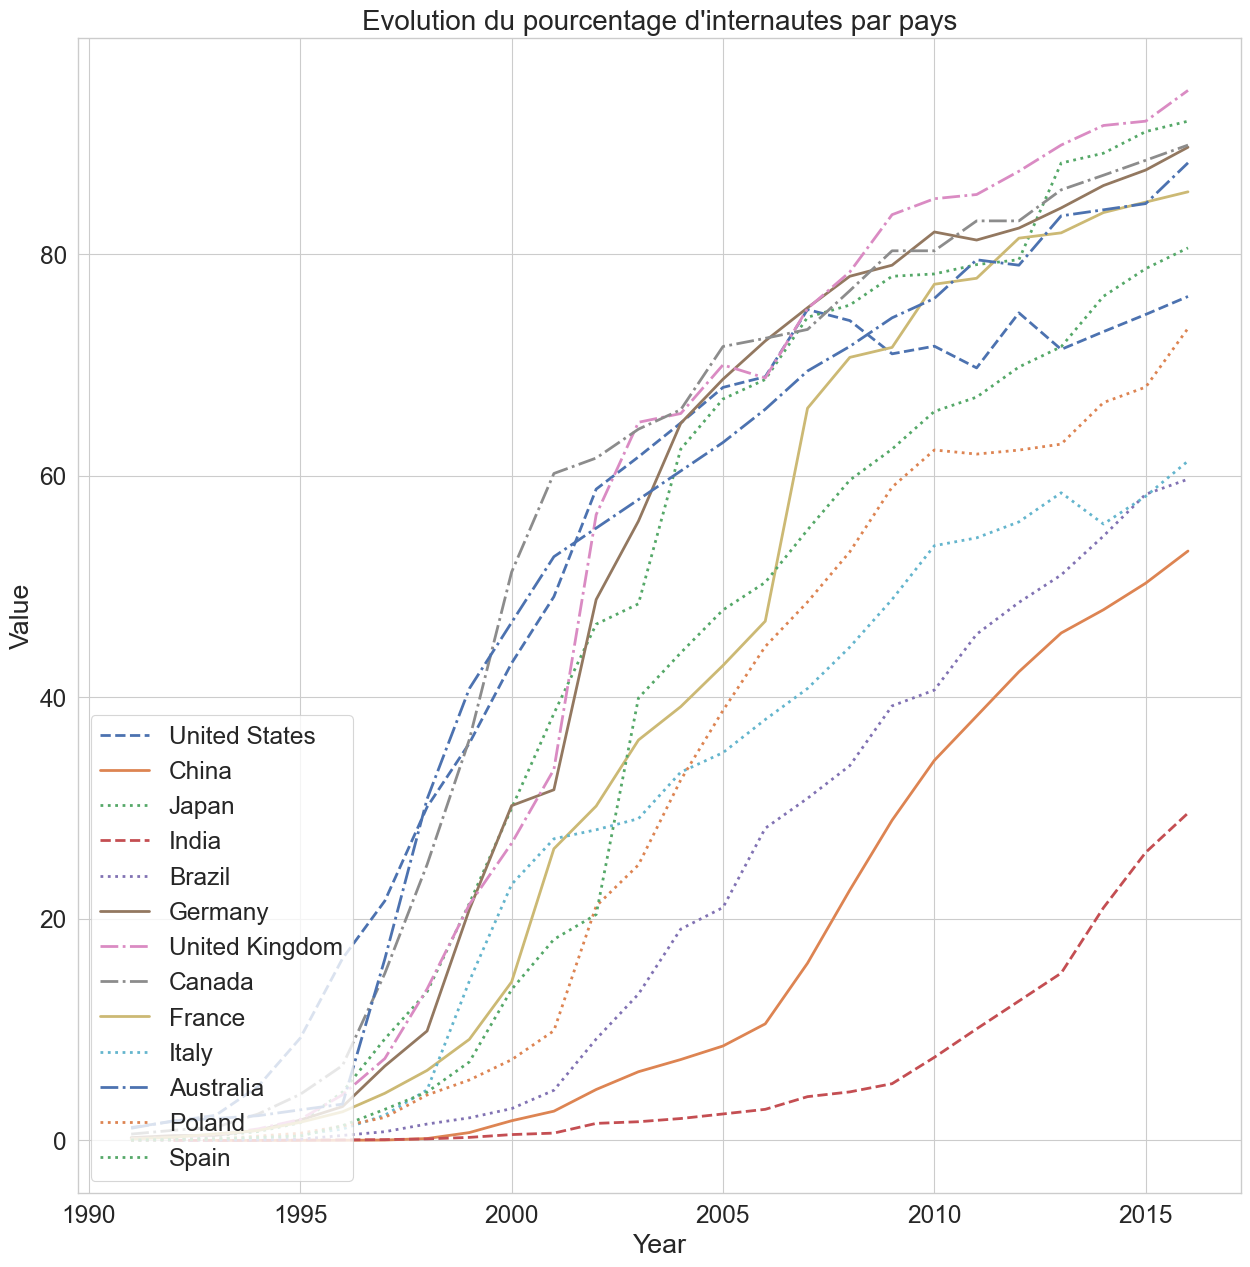

In [453]:
import random

plt.figure(figsize=(15,15))

# Définir un dictionnaire de styles de ligne aléatoires pour chaque pays
line_styles = {country: random.choice(['-', '--', '-.', ':']) for country in selected_countries}

# Tracer chaque ligne avec un style de ligne différent
for country in selected_countries:
    sns.lineplot(x='Year', y='Value',
                 data=data_final_melt[(data_final_melt['Indicator Code'] == 'IT.NET.USER.P2') & 
                                      (data_final_melt['Country Name'] == country)],
                 linewidth=2, linestyle=line_styles[country])

# Ajouter une légende avec les noms des pays
plt.legend(selected_countries, loc='lower left')

# Ajouter un titre
plt.title('Evolution du pourcentage d\'internautes par pays', size=20)

# Afficher le graphique
plt.show()


Le graphe ne donne pas de projections après 2016 par contre il montre clairement une tendance à la hausse. On peut donc estimer que les pays de notre liste ayant le moins accès à internet aujourd'hui verront leur part augmenter jusqu'au seuil de 80 %

In [461]:
# On boucle à travers chaque pays dans la liste selected_countries
for country in selected_countries:
    
    # On boucle à travers chaque année unique dans la colonne Year du DataFrame data_final_melt
    for year in data_final_melt['Year'].unique().tolist():
        
        # On crée un nouveau DataFrame avec les valeurs spécifiées pour chaque colonne
        # La colonne 'Country Name' prend la valeur de la variable country
        # La colonne 'Country Code' prend une chaîne vide
        # La colonne 'Indicator Name' prend une chaîne vide
        # La colonne 'Indicator Code' prend la valeur 'PRODUCT'
        # La colonne 'Region' prend une chaîne vide
        # La colonne 'Year' prend la valeur de la variable year convertie en entier
        # La colonne 'Value' prend le produit de la valeur de l'indicateur 'CUSTOM' et de la valeur de l'indicateur 'IT.NET.USER.P2' pour le pays et l'année spécifiés
        new_row = pd.DataFrame({'Country Name' : [country],
                                'Country Code' : [''],
                                'Indicator Name' : [''],
                                'Indicator Code' : ['PRODUCT'],
                                'Region' : [''],
                                'Year' : [int(year)],
                                'Value' : [data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0] * 
                                           data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0]/100]
                               })
        
        # On concatène le DataFrame data_final_melt et le nouveau DataFrame créé en utilisant la fonction concat
        # On ignore l'index d'origine pour obtenir un index unique dans le nouveau DataFrame
        data_final_melt = pd.concat([data_final_melt, new_row], ignore_index=True)


C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2013353541.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Value' : [data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0] *
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2013353541.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0]/100]


C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2877819015.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ]['Year'],
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\2877819015.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ]['Value'])


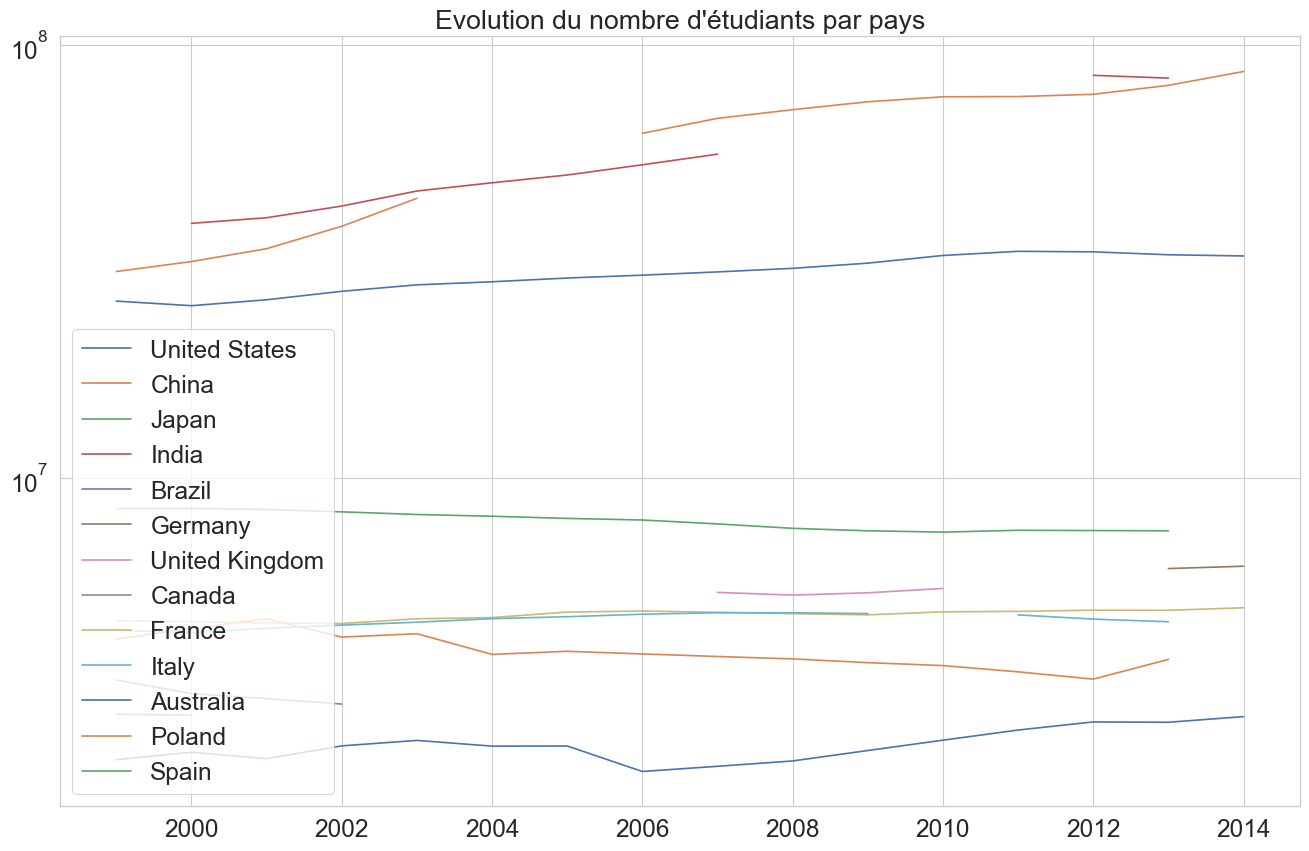

In [462]:
#évolution du nombre d'étudiants
plt.figure(figsize = (16,10))
ax = plt.gca()
ax.set_yscale('log')
for country in selected_countries:
    plt.plot(data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries, loc = 'lower left')
plt.title('Evolution du nombre d\'étudiants par pays')
plt.show()

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1038657526.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data_final_melt[data_final_melt['Indicator Code'] == 'PRODUCT'][data_final_melt['Country Name'] == country ]['Year'],
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5260\1038657526.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_final_melt[data_final_melt['Indicator Code'] == 'PRODUCT'][data_final_melt['Country Name'] == country ]['Value'])


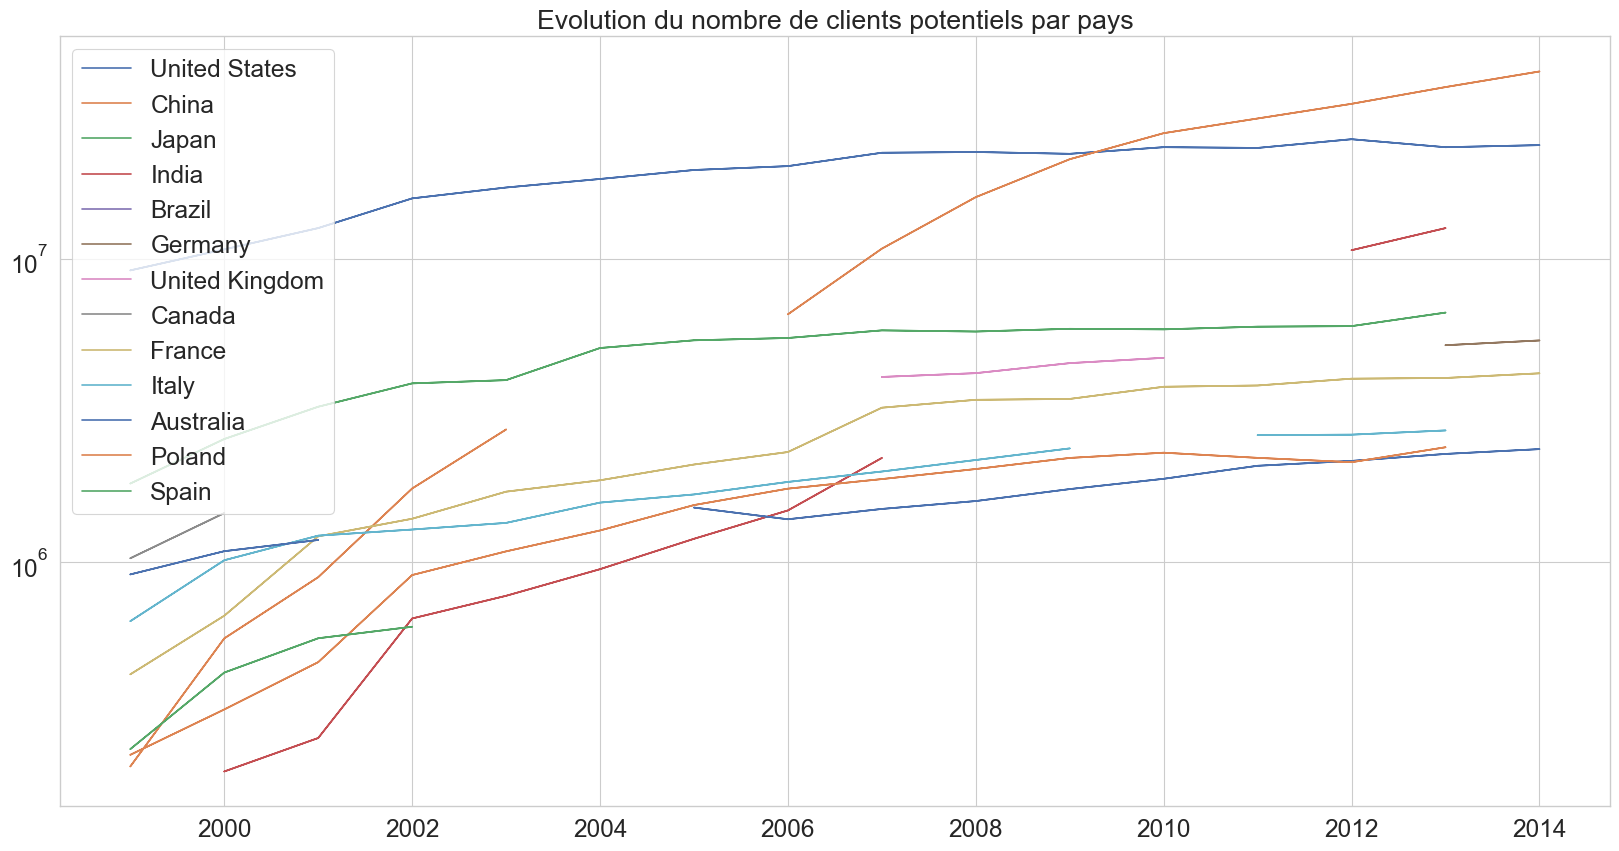

In [464]:
#évolution du nombre d'étudiants
plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_yscale('log')
for country in selected_countries:
    plt.plot(data_final_melt[data_final_melt['Indicator Code'] == 'PRODUCT'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'PRODUCT'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries)
plt.title('Evolution du nombre de clients potentiels par pays')

plt.show()

Les données ne nous renseignent pas directement car on a pas de de données pour le futur. 
Par contre, on peut supposer :
* que les pays qui ont une tendance haussière importante du nombre de clients vont continuer à voir cette part croitre dans les prochaines années
* que les pays où internet est moins implanté vont continuer à voir l'utilisation d'internet augmenter, et donc le nombre de clients
* que les pays où les projections d'augmentation de la population sont importantes verront le nombre d'étudiants augmenter et donc le nombre de clients potentiels

In [465]:
data_final_melt

Country Name Country Code  \
0       Australia          AUS   
1       Australia          AUS   
2       Australia          AUS   
3       Australia          AUS   
4          Brazil          BRA   
...           ...          ...   
3999        Spain                
4000        Spain                
4001        Spain                
4002        Spain                
4003        Spain                

                                         Indicator Name  Indicator Code  Year  \
0     Enrolment in post-secondary non-tertiary educa...         UIS.E.4  1991   
1     Enrolment in tertiary education, all programme...     SE.TER.ENRL  1991   
2     Enrolment in upper secondary education, both s...         UIS.E.3  1991   
3                       Internet users (per 100 people)  IT.NET.USER.P2  1991   
4     Enrolment in post-secondary non-tertiary educa...         UIS.E.4  1991   
...                                                 ...             ...   ...   
3999                                                            PRODUCT  2080   
4000                                                            PRODUCT  2085   
4001                                                            PRODUCT  2090   
4002                                                            PRODUCT  2095   
4003                                                            PRODUCT  2100   

              Value Region  
0               NaN    NaN  
1     534530.000000    NaN  
2               NaN    NaN  
3          1.097204    NaN  
4               NaN    NaN  
...             ...    ...  
3999            NaN         
4000            NaN         
4001            NaN         
4002            NaN         
4003            NaN         

[4004 rows x 7 columns]

In [475]:
potentiel = pd.DataFrame(columns = ['Country', 'Ecart à saturation internet', 'Potentiel clients'])
for country in data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'].sort_values(by='Value')['Country Name'].unique():
    implantation_internet = round(data_final_melt[(data_final_melt['Indicator Code'] == 'IT.NET.USER.P2') & (data_final_melt['Country Name'] == country) & (data_final_melt['Year'] == 2013)]['Value'].unique()[0],2)
    if implantation_internet > 80 :
        implantation_internet = 80
    potentiel = pd.concat([potentiel, 
                          pd.DataFrame(
                              {'Country' : [country] ,
                               'Ecart à saturation internet' : [80 - implantation_internet],
                               'Potentiel clients' : [round((80 - implantation_internet) * data_final_melt[(data_final_melt['Indicator Code'] == 'CUSTOM') & (data_final_melt['Country Name'] == country ) & (data_final_melt['Year'] == 2013)]['Value'].unique()[0]/100,0)]
                                      }
                          )]
             )

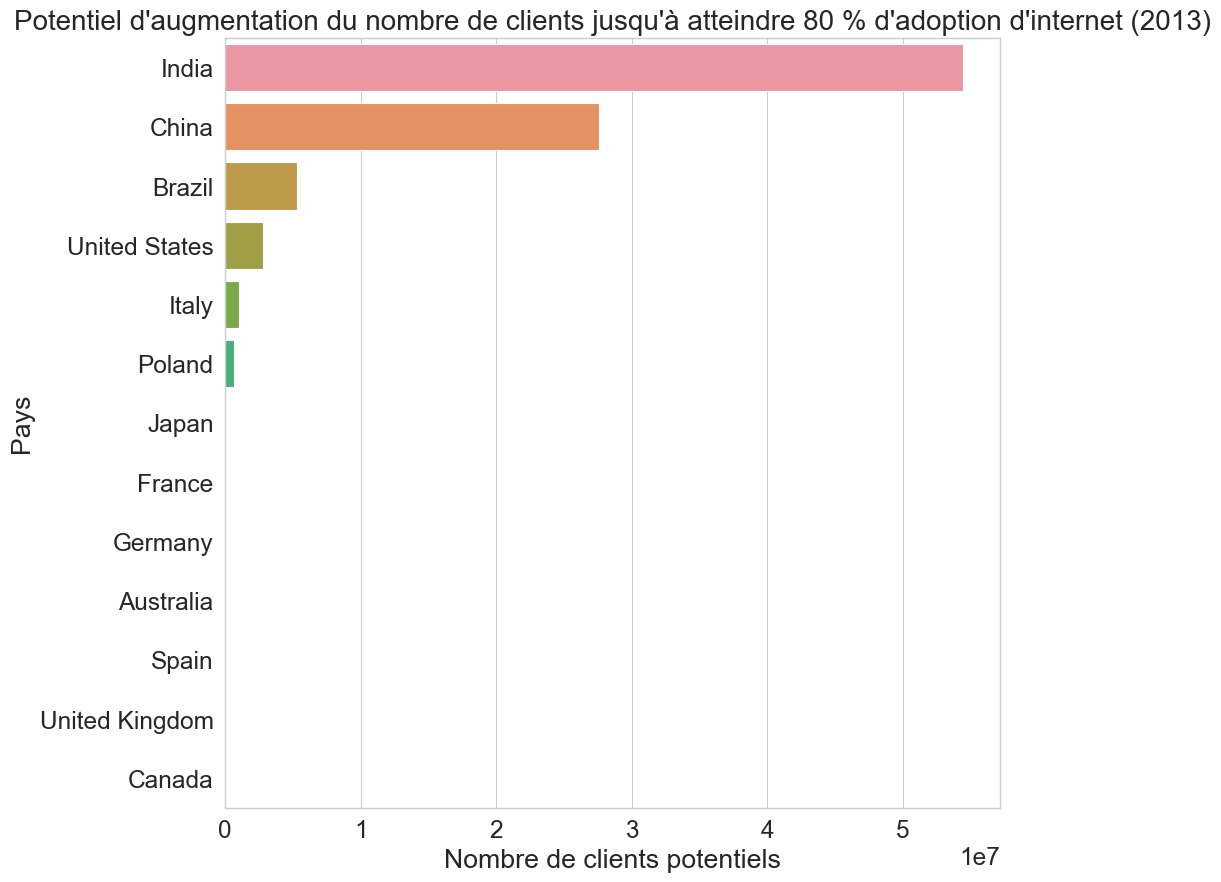

In [476]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = potentiel.sort_values(by='Potentiel clients', ascending=False)['Potentiel clients'], y = potentiel.sort_values(by='Potentiel clients', ascending=False)['Country'])
plt.title('Potentiel d\'augmentation du nombre de clients jusqu\'à atteindre 80 % d\'adoption d\'internet (2013)', size=20)
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


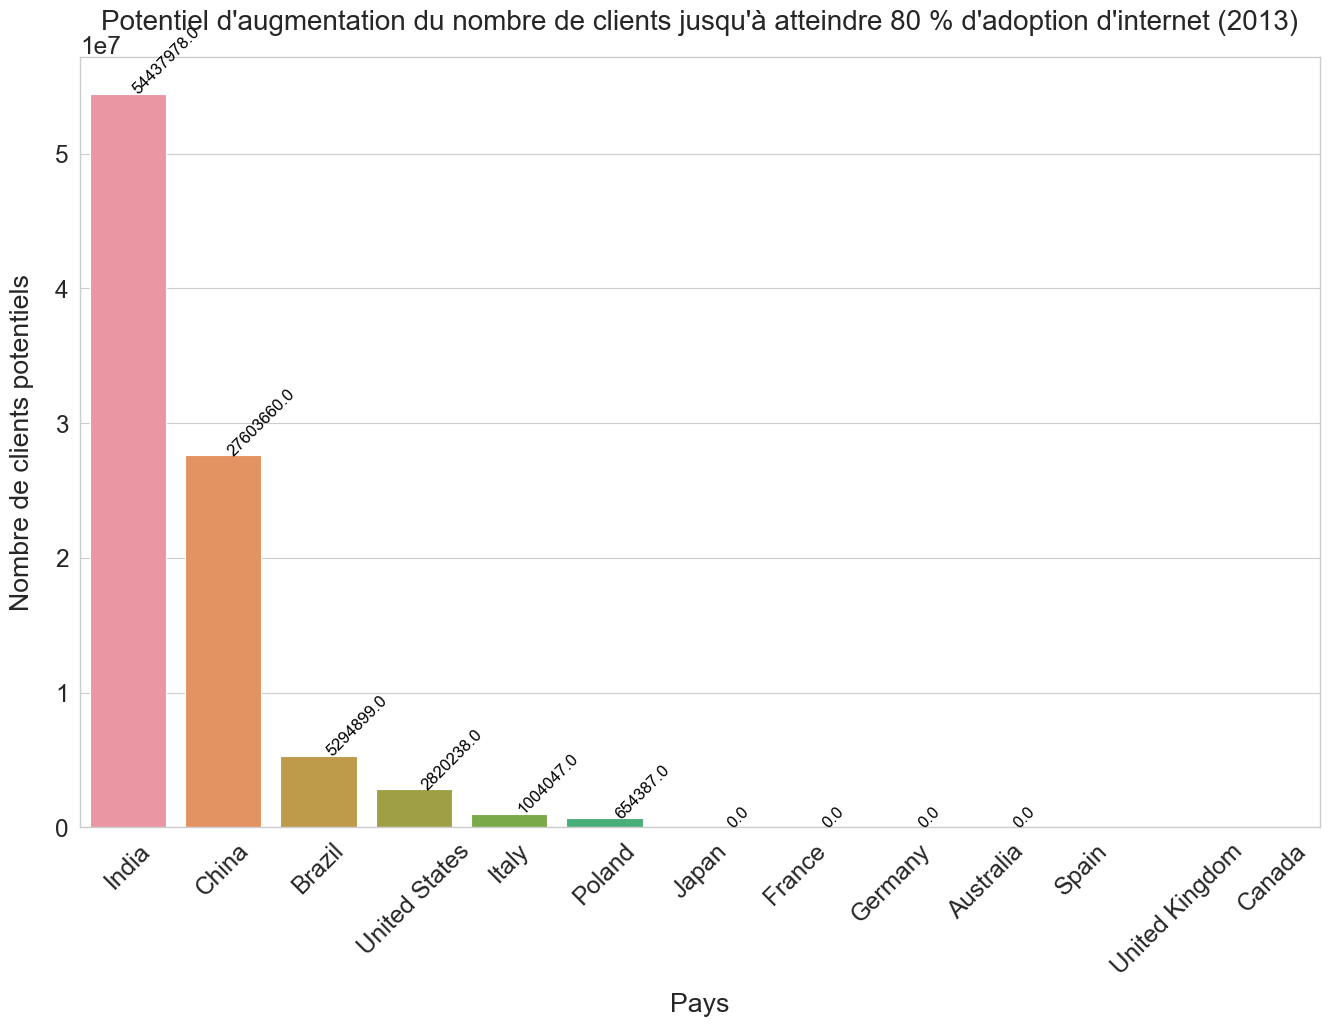

In [642]:
plt.figure(figsize=(16, 10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x=potentiel.sort_values(by='Potentiel clients', ascending=False)['Country'], y=potentiel.sort_values(by='Potentiel clients', ascending=False)['Potentiel clients'])

# rotation de 45 degrés pour les noms de pays
plt.xticks(rotation=45)

# affichage du total au sommet de chaque colonne
for i, v in enumerate(potentiel.sort_values(by='Potentiel clients', ascending=False)['Potentiel clients']):
    ax.text(i + 0.4, v + 2, str(v), color='black', ha='center', fontsize=12, rotation=45)

# ajout de commentaires pour le code
plt.title('Potentiel d\'augmentation du nombre de clients jusqu\'à atteindre 80 % d\'adoption d\'internet (2013)', size=20, pad=20)
plt.ylabel('Nombre de clients potentiels', labelpad=15)
plt.xlabel('Pays', labelpad=10)
plt.show()


Nous pouvons etendre notre choix à tous les pays de la liste suivante, ces pays seraient de bons candidats pour installer la société:

In [646]:
selected_countries

['United States',
 'China',
 'Japan',
 'India',
 'Brazil',
 'Germany',
 'United Kingdom',
 'Canada',
 'France',
 'Italy',
 'Australia',
 'Poland',
 'Spain']

Néanmoins, quitte à cibler un nombre plus réduit de pays, l'analyse conduit à indiquer que les pays à cibler en priorité sont : 
* Chine
* Inde
* Etats Unis
* Brésil

Dans l'idée et les indicateurs : le dataset est pertinent pour répondre à la problématique car il possède des données solides pour comparer les pays :
* tous les pays du monde sont abordés
* les indicateurs sont sourcés, les données peuvent être tracées
* le dataset comporte également des données démographiques
* le dataset comporte également des données de réussites à des tests
* le dataset comporte également des données d'investissement dans l'éducation

Mais à nuancer par le fait que :
* les indicateurs ont des répartitions de NaN assez distinctes. Il est assez compliqué de construire de nouveaux indicateurs à partir de ceux qu'on a déjà
* le jeu de données manque d'aspects qui pourraient être utiles à la problématique business : l'utilisation des elearnings / moocs dans les pays, l'argent dépensé sur internet, la proportion d'élèves se formant en dehors de leur établissement de référence, etc.
* on peut imaginer aussi que Academy cherche à réutiliser ses ressources existantes pour s'implanter dans certains pays : on imagine donc qu'il sera plus simple de s'implanter dans les pays occidentaux ou des pays ou la langue est la même.